In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from copy import deepcopy

import imodels

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
def decision_boundary(X, y, model, model_name, cols, filename, save=False):
    fig = plt.figure(model_name)
    plt.clf()
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X, grid_resolution=200, response_method="predict", alpha=0.5, cmap="coolwarm"
    )
    ax = disp.ax_
    ax.scatter(X[y==0, 0], X[y==0, 1], s=3, c="dodgerblue", marker="s", alpha=0.3, label=0)
    ax.scatter(X[y==1, 0], X[y==1, 1], s=3, c="orangered", marker="^", alpha=0.3, label=1)
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])
    ax.set_title(f"{model_name} (AUC {sklearn.metrics.roc_auc_score(y, model.predict(X)):.3f})")
    ax.legend()
    if save:
        plt.savefig(filename, bbox_inches=None, facecolor="white", edgecolor="auto")

In [4]:
def feature_importance(X, y, cols, N=10):
    mean_feature_importance = np.zeros(X.shape[1])
    for _ in range(N):
        tree = DecisionTreeClassifier(criterion='gini')
        tree.fit(X, y)
        mean_feature_importance += tree.feature_importances_
    mean_feature_importance /= N
    most_important = np.flip(np.argsort(mean_feature_importance))
    print(f"     Feature importance\n{34*'='}")
    for i, _ in zip(most_important, range(10)):
        print(f"{cols[i]:>25s} | {mean_feature_importance[i]:.3f}")
    return cols[most_important[:2]]

In [5]:
def test_simpler_boundary(dataset_name, database_name, cols_name=None, save=False):
    X, y, cols = imodels.util.data_util.get_clean_dataset(dataset_name, database_name)
    cols = np.array(cols)
    
    # Select provided columns
    if cols_name:
        _save_name = ""
        new_X = X[:, np.array([np.where(cols == cols_name[0])[0][0], np.where(cols == cols_name[1])[0][0]])]
    else:
        # Test which feature is the most important
        _save_name = "_reproduced"
        cols_name = feature_importance(X, y, cols)
    new_X = X[:, np.array([np.where(cols == cols_name[0])[0][0], np.where(cols == cols_name[1])[0][0]])]
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.33)
    
    # Train the random forest
    RF = RandomForestClassifier(n_estimators=50)
    RF.fit(X_train, y_train)
    hsRF = imodels.HSTreeClassifierCV(deepcopy(RF))
    hsRF.fit(X_train, y_train)
    print(f"Optimal lambda: {hsRF.reg_param}")
    
    decision_boundary(X_test, y_test, RF, "RF", cols_name, "../figures/boundaries/"+dataset_name+"_RF"+_save_name, save)
    decision_boundary(X_test, y_test, hsRF, "hsRF", cols_name, "../figures/boundaries/"+dataset_name+"_hsRF"+_save_name, save)

Optimal lambda: 100.0
     Feature importance
              att_13_-1.0 | 0.270
                   att_12 | 0.152
                    att_1 | 0.085
                    att_3 | 0.085
                    att_5 | 0.081
                   att_10 | 0.069
                    att_4 | 0.066
                    att_8 | 0.055
                    att_2 | 0.053
                    att_9 | 0.046
Optimal lambda: 0.1


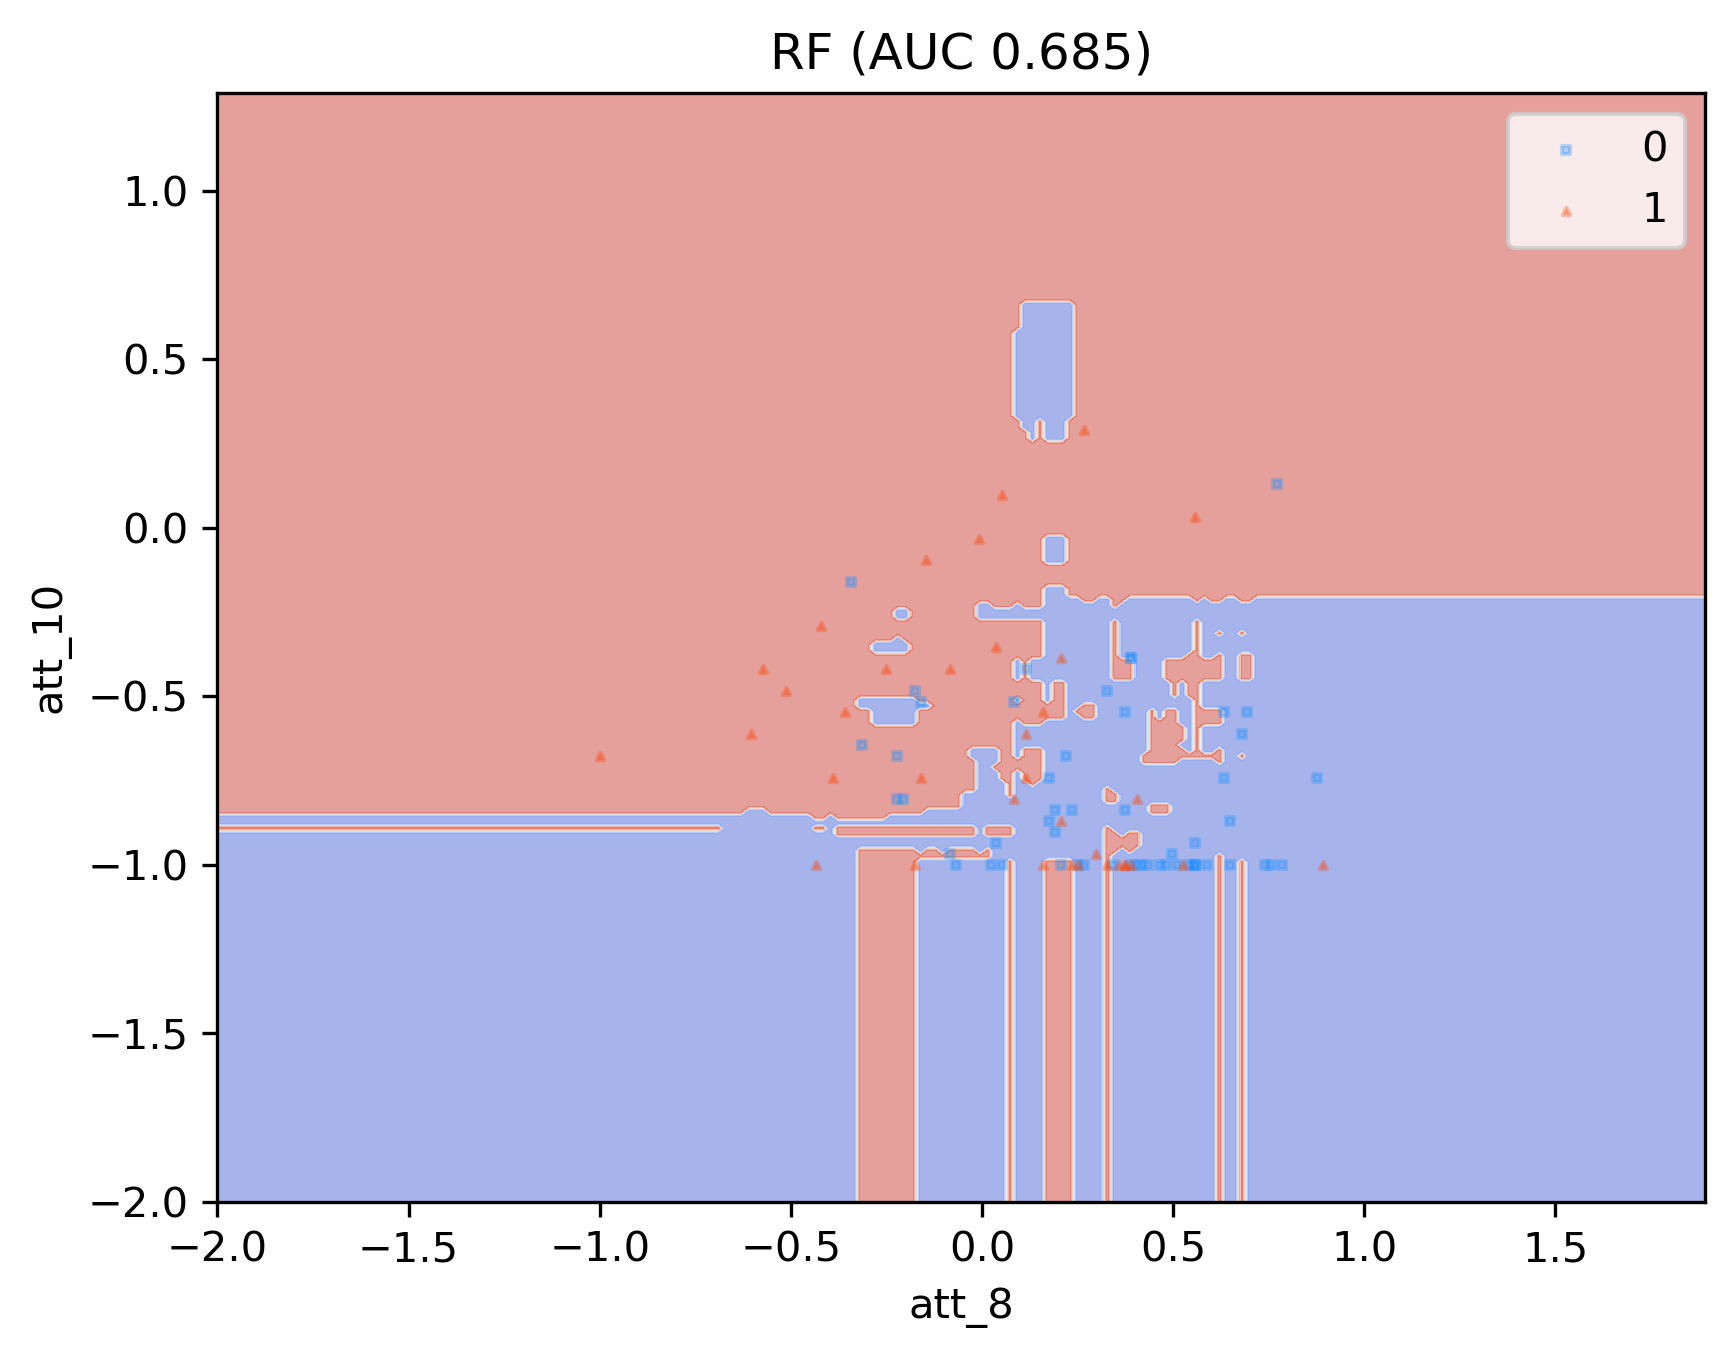

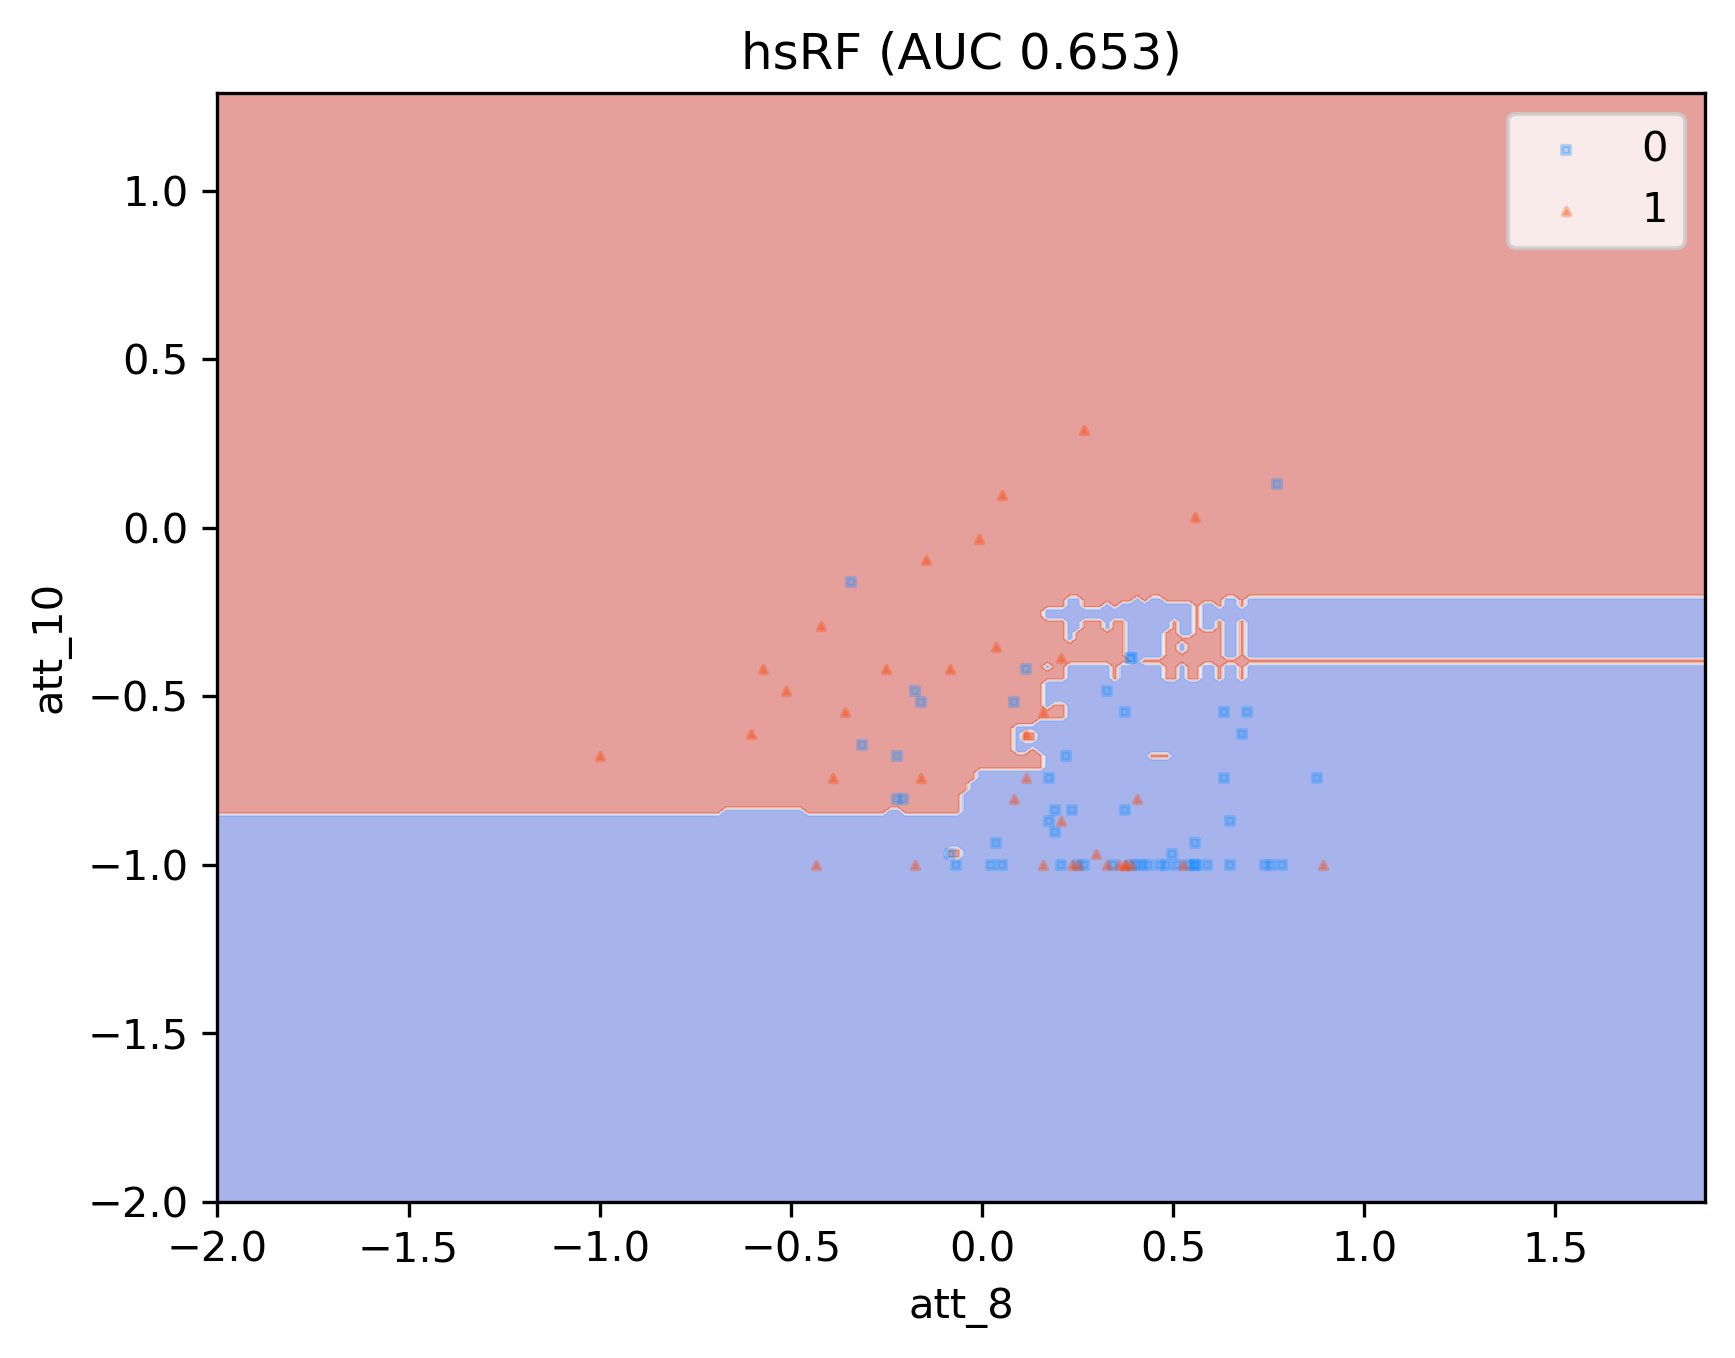

<Figure size 1920x1440 with 0 Axes>

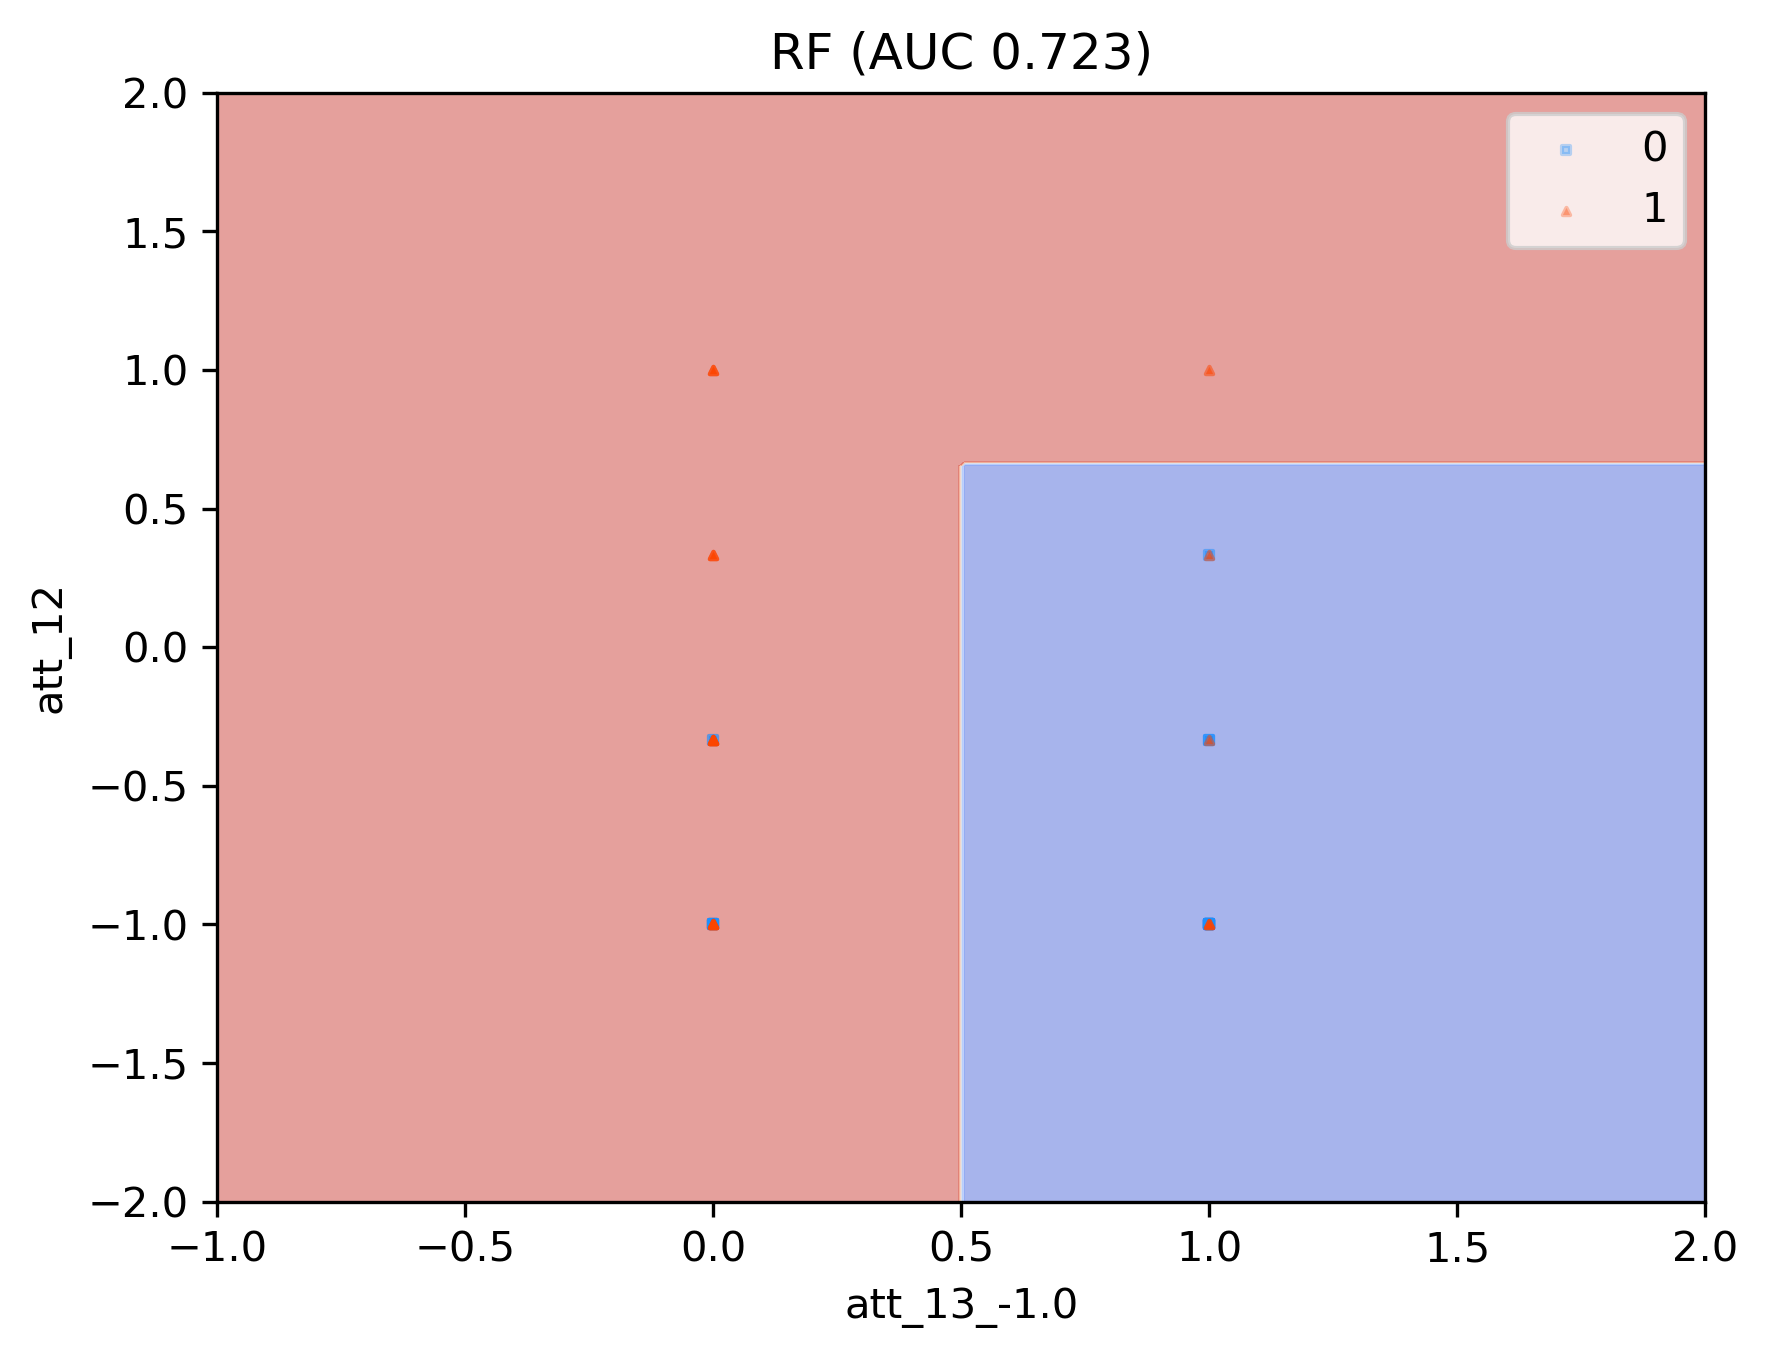

<Figure size 1920x1440 with 0 Axes>

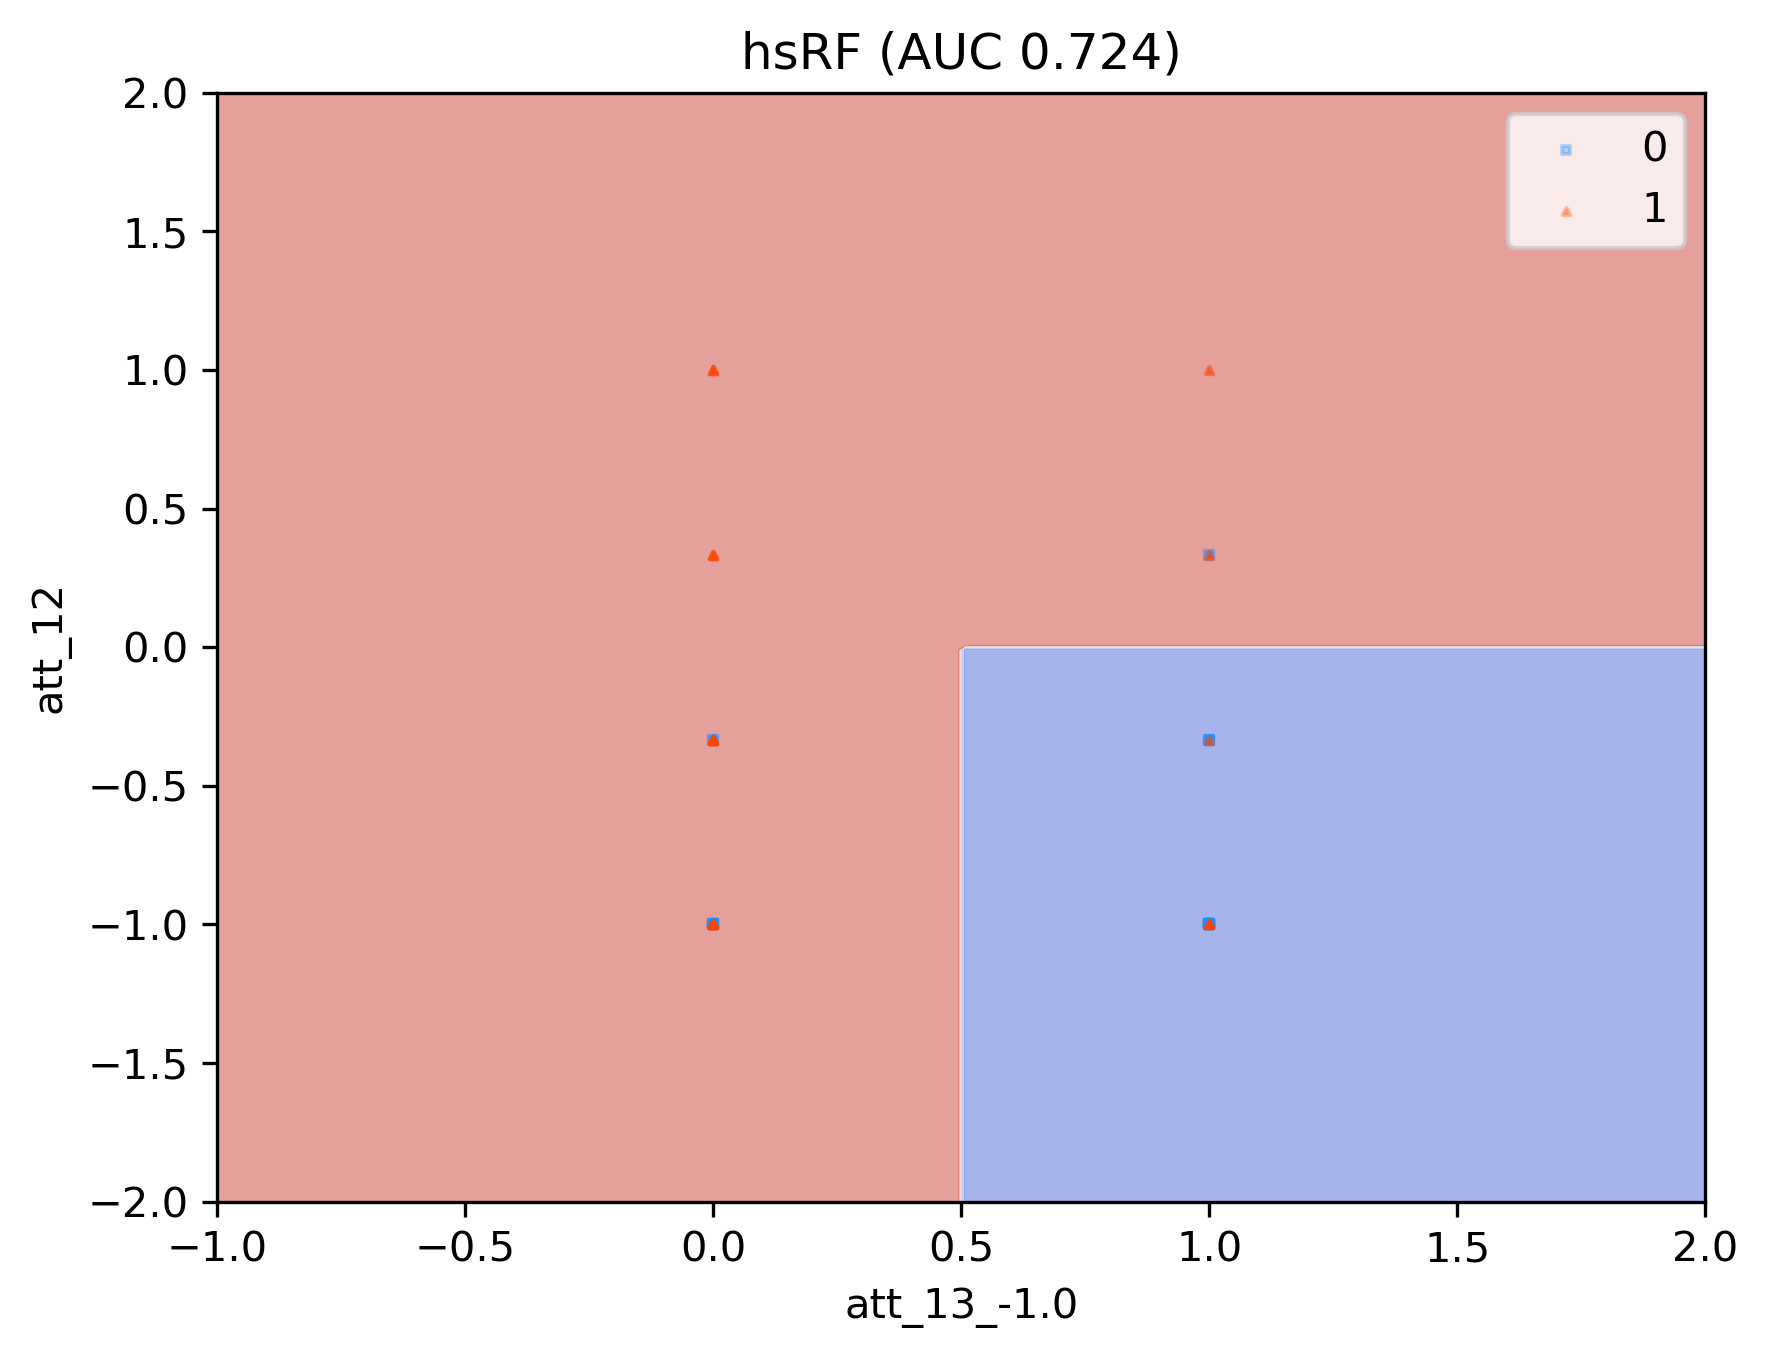

In [6]:
np.random.seed(42)
test_simpler_boundary("heart", "imodels", ["att_8", "att_10"])
test_simpler_boundary("heart", "imodels")

Optimal lambda: 50.0
     Feature importance
               tumor-size | 0.209
                      age | 0.142
            deg-malig_2.0 | 0.128
                inv-nodes | 0.115
          breast-quad_0.0 | 0.058
                   breast | 0.056
            menopause_2.0 | 0.049
                node-caps | 0.046
          breast-quad_1.0 | 0.038
          breast-quad_2.0 | 0.027
Optimal lambda: 100.0


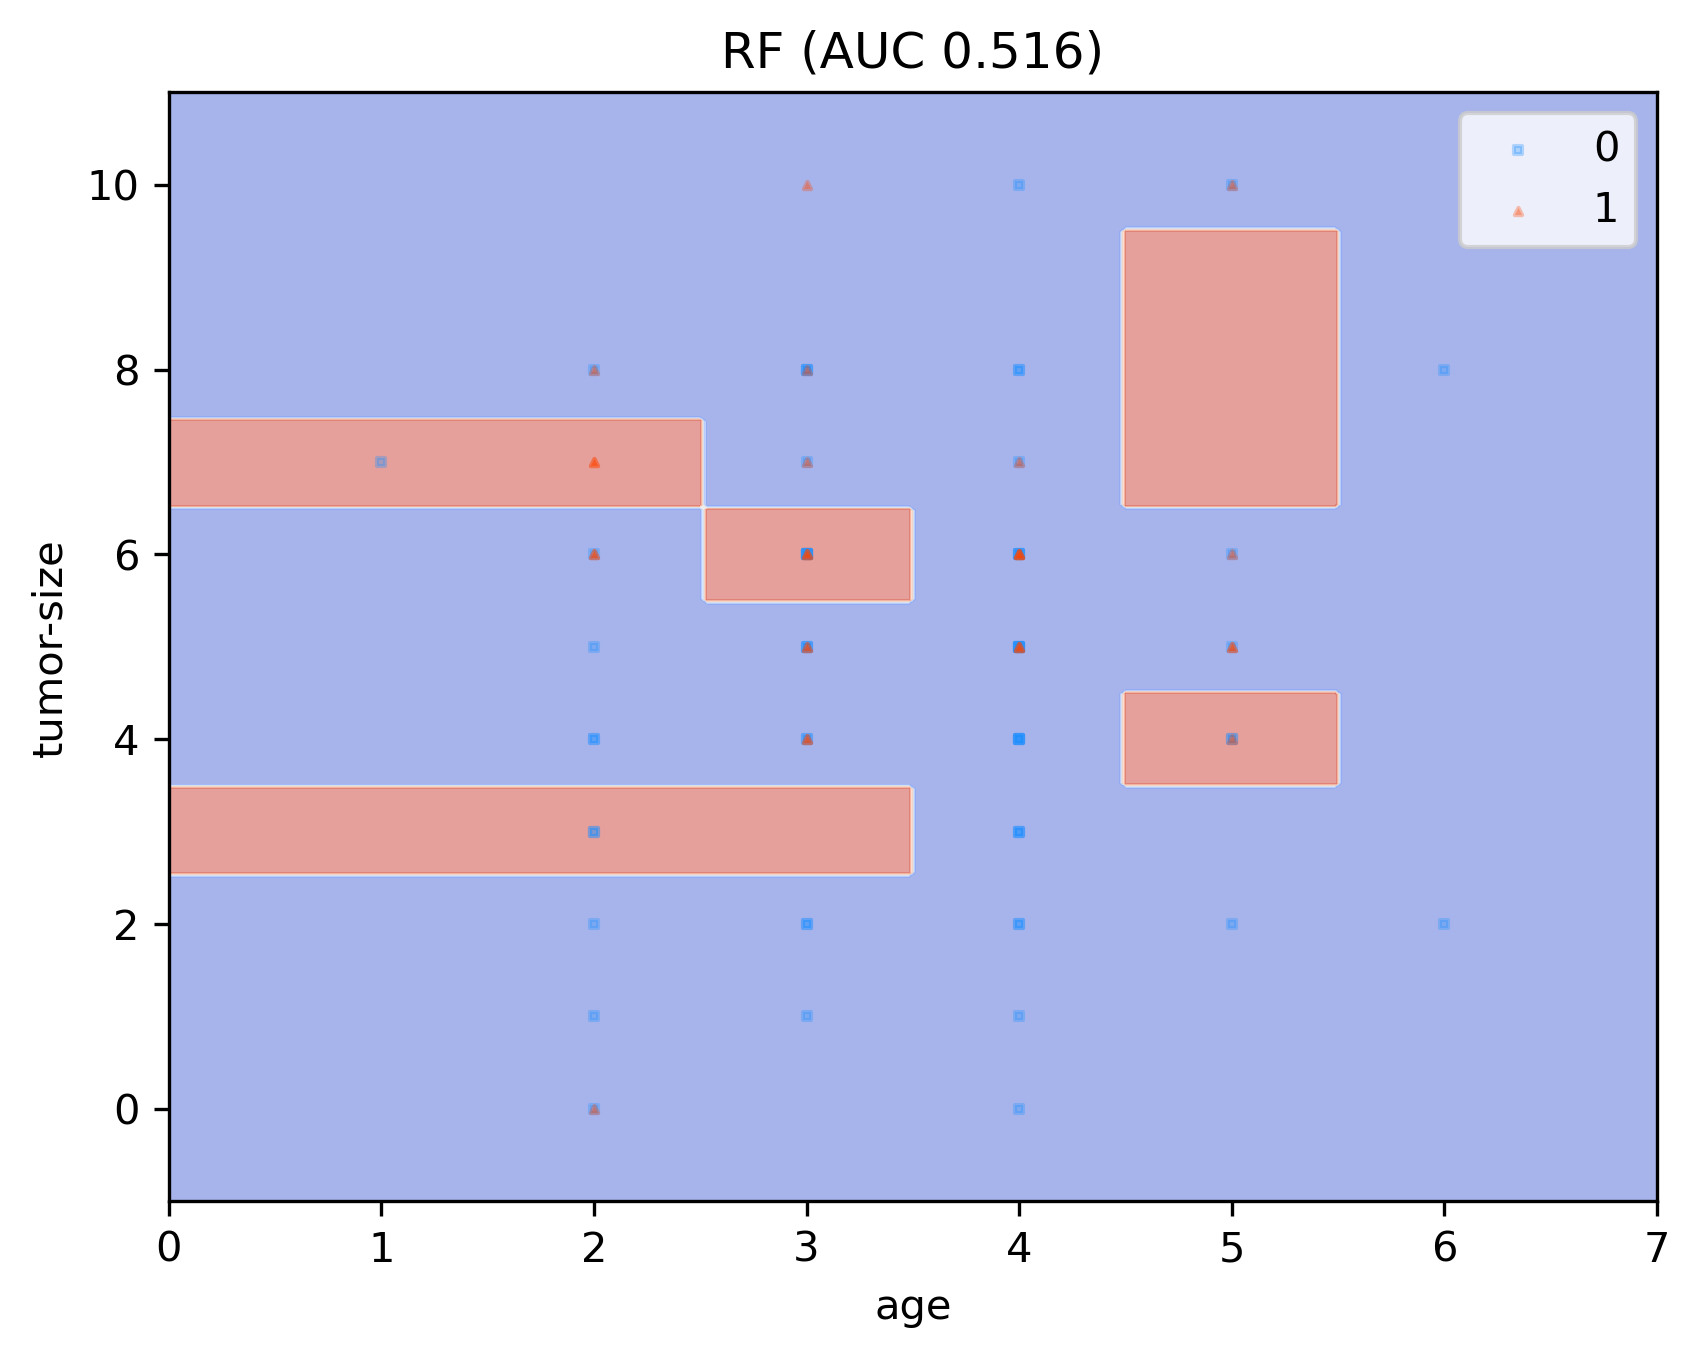

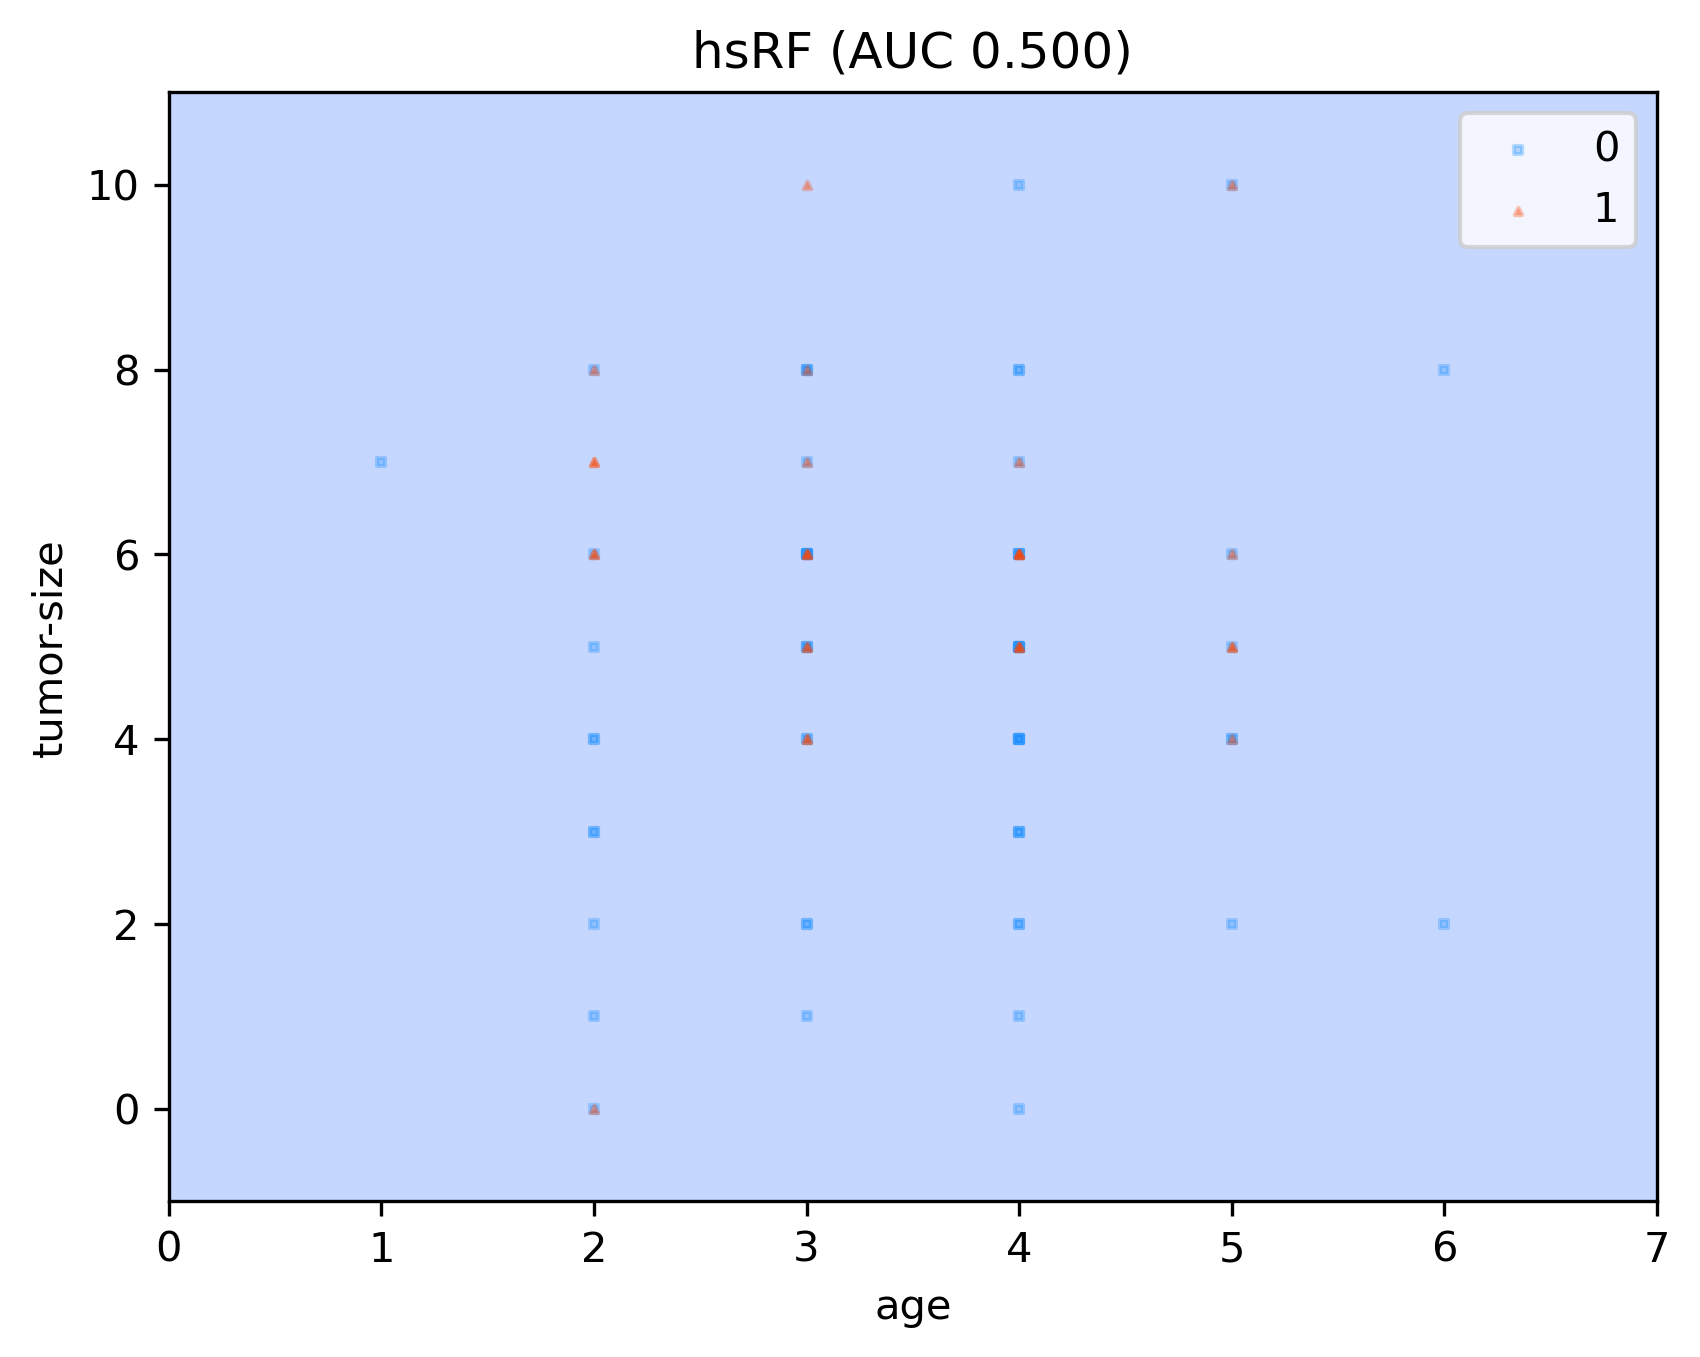

<Figure size 1920x1440 with 0 Axes>

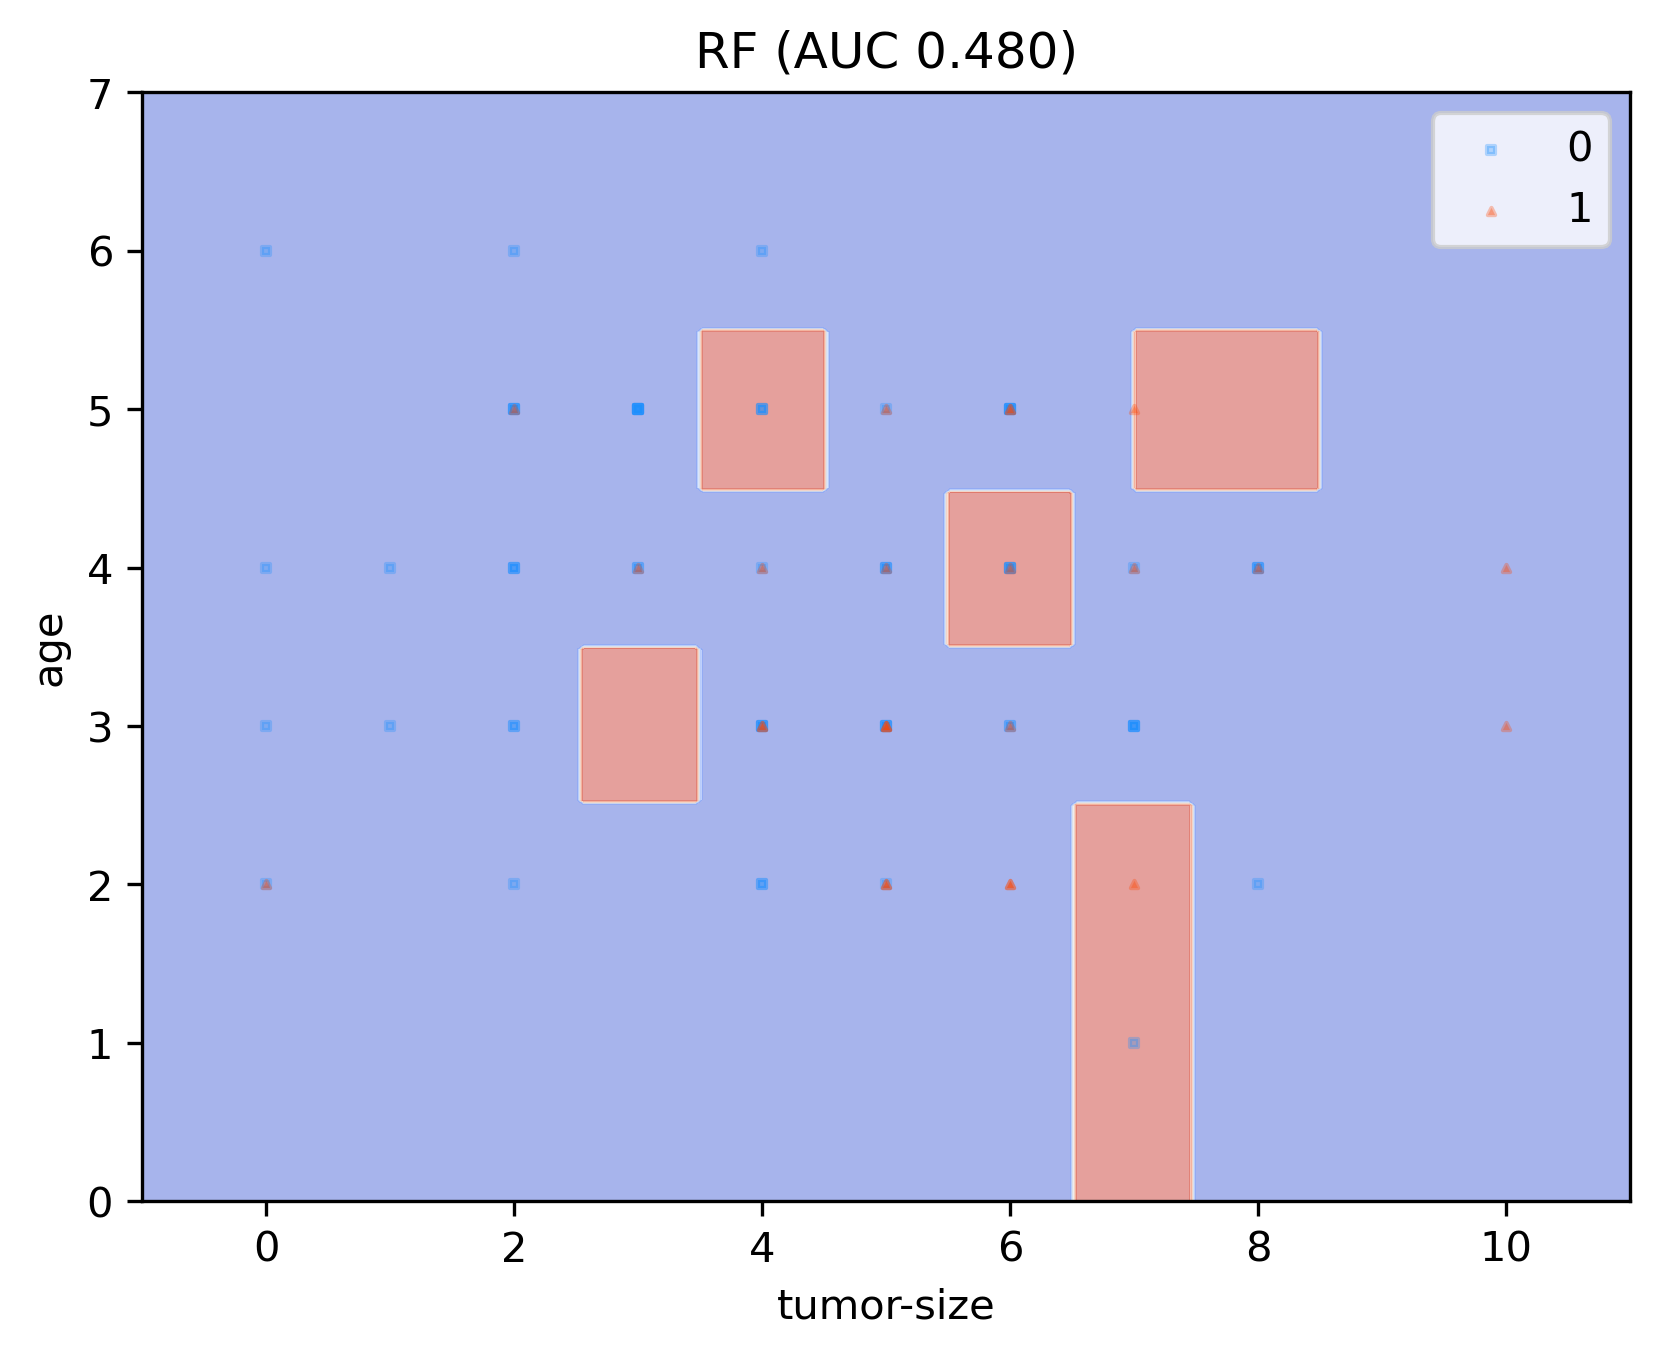

<Figure size 1920x1440 with 0 Axes>

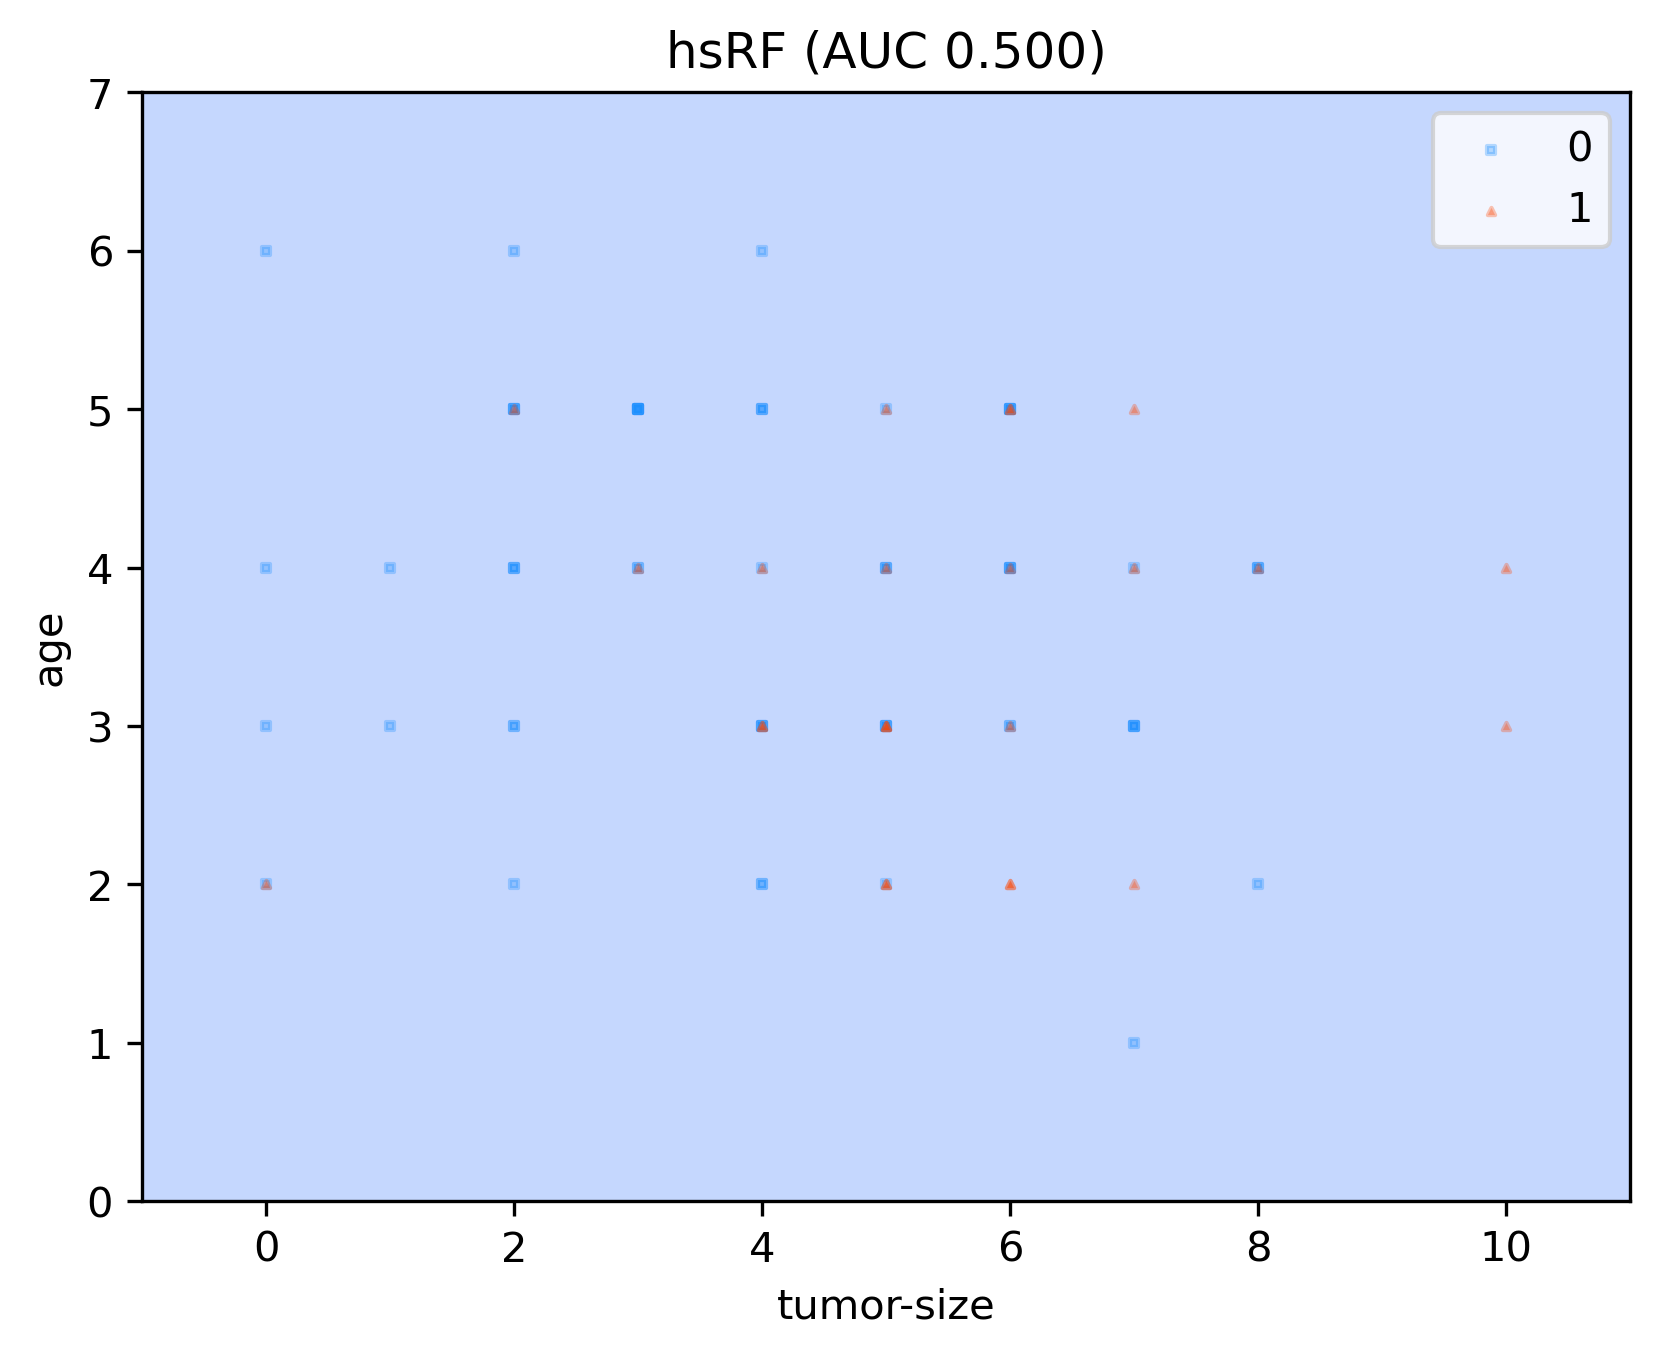

In [7]:
np.random.seed(42)
test_simpler_boundary("breast_cancer", "imodels", ["age", "tumor-size"])
test_simpler_boundary("breast_cancer", "imodels")

Optimal lambda: 100.0
     Feature importance
Age_of_patient_at_time_of_operation | 0.446
Patients_year_of_operation | 0.281
Number_of_positive_axillary_nodes_detected | 0.273
Optimal lambda: 100.0


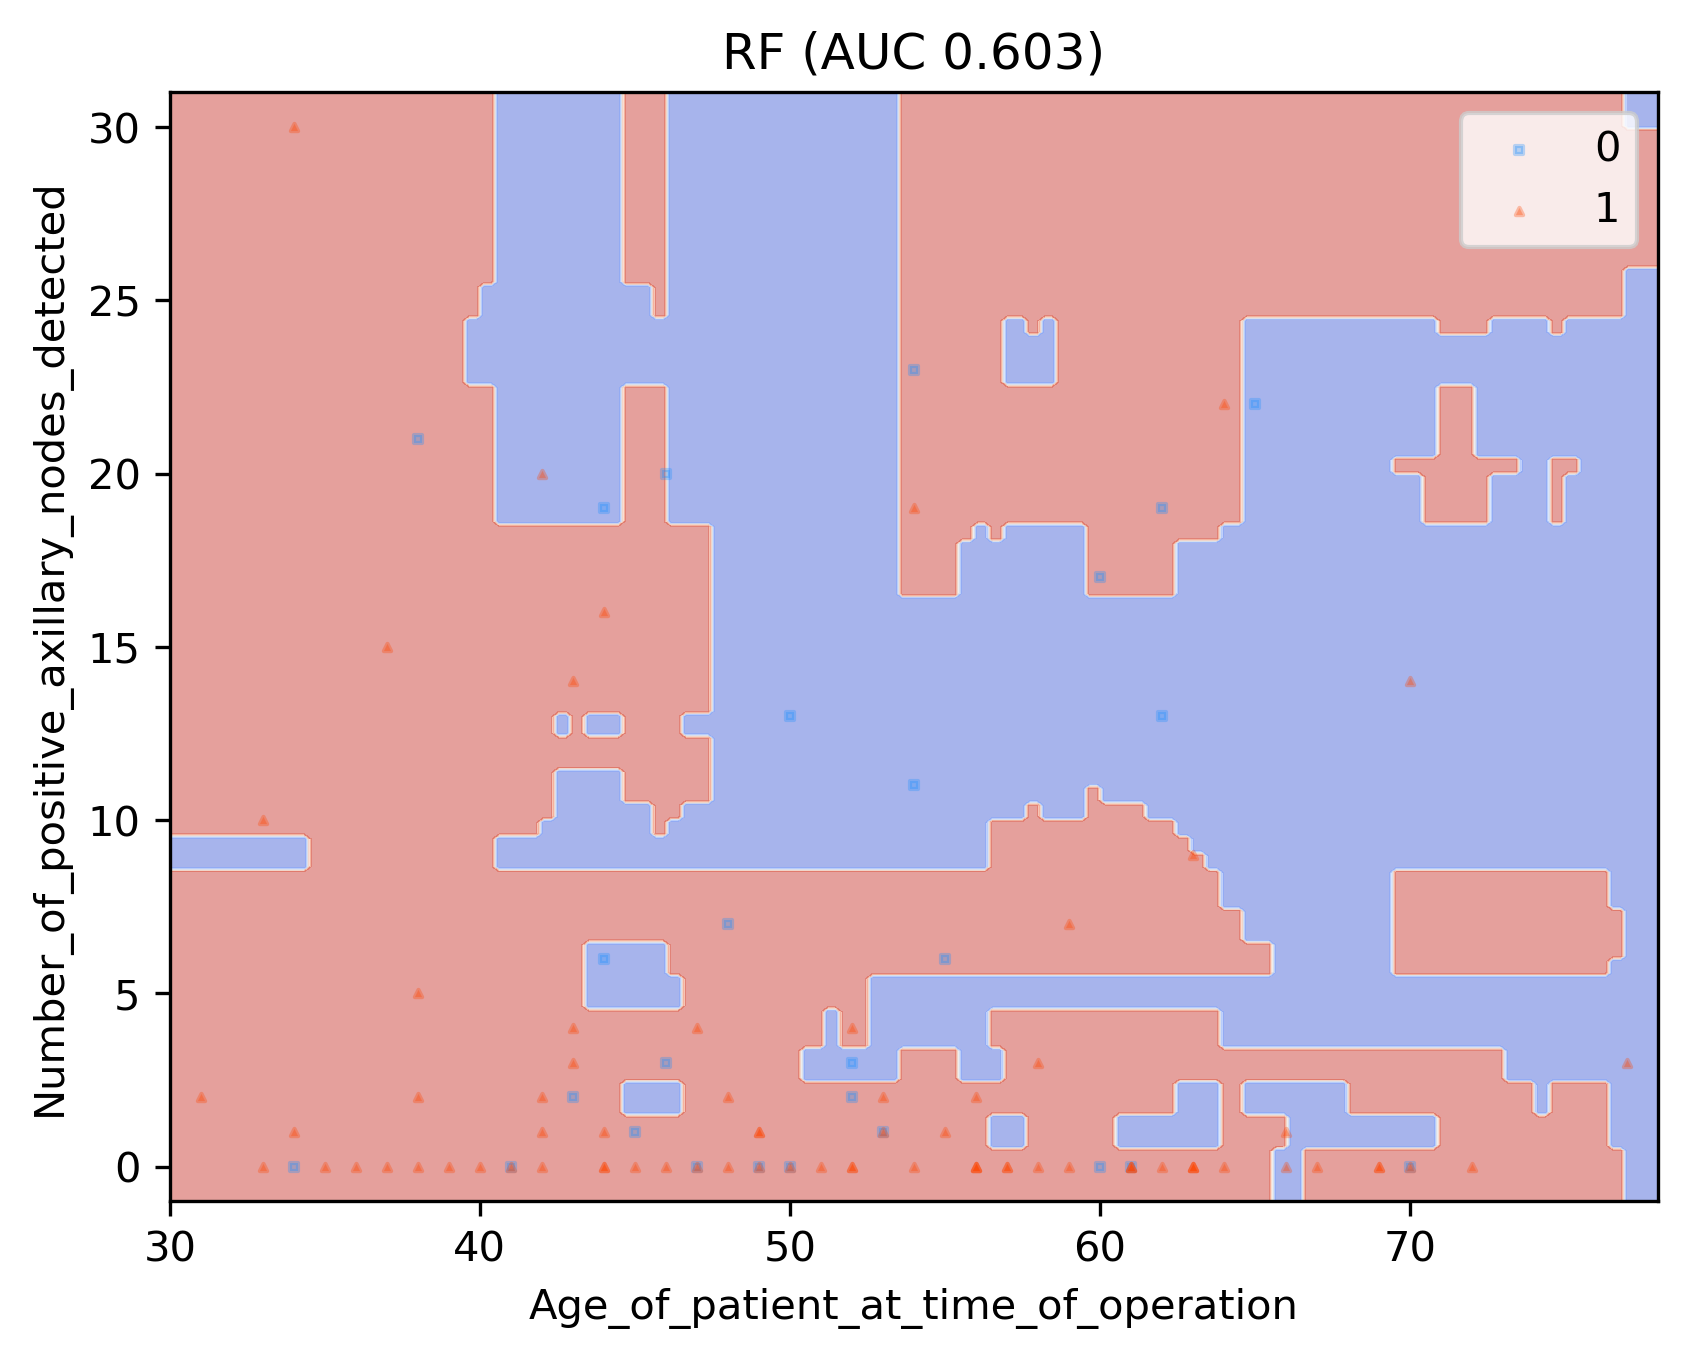

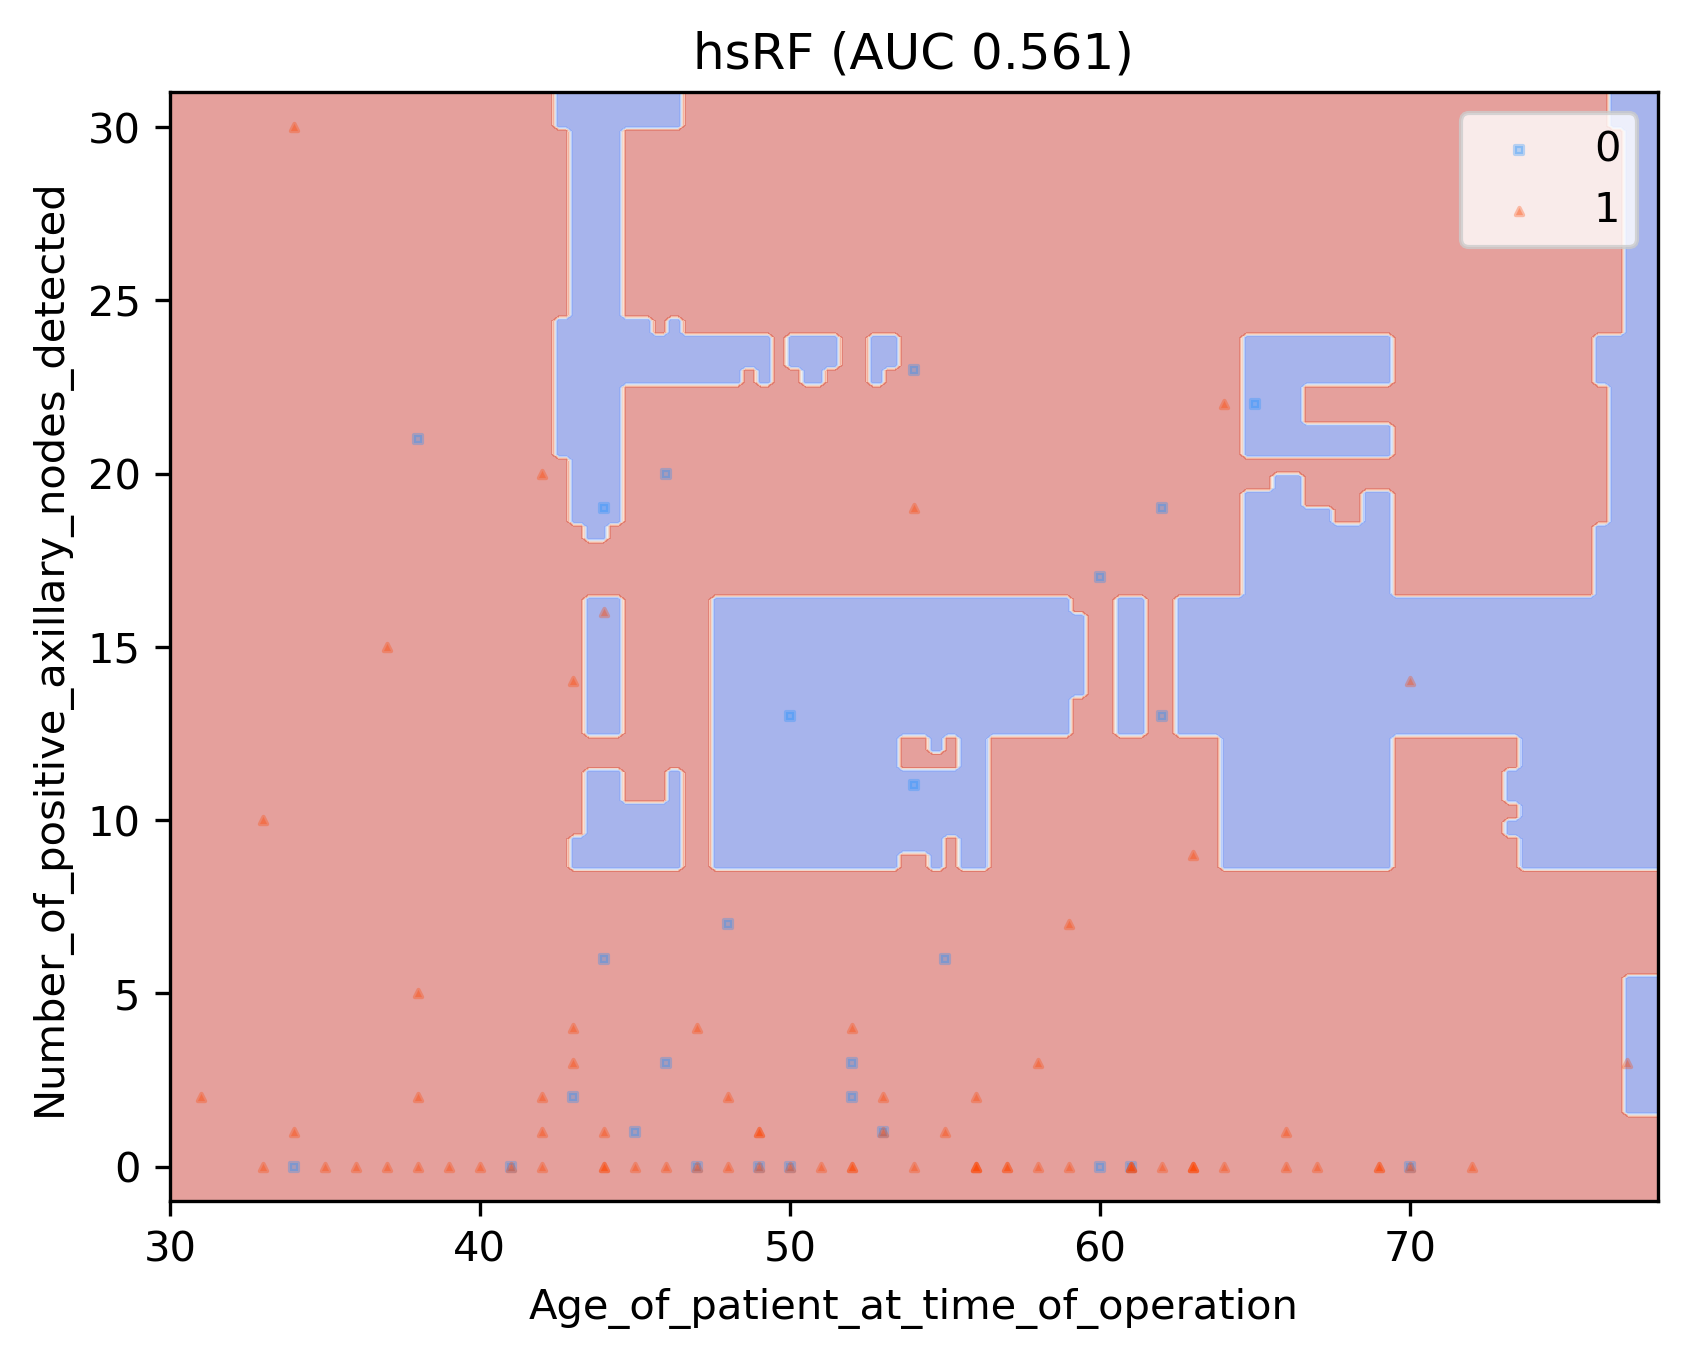

<Figure size 1920x1440 with 0 Axes>

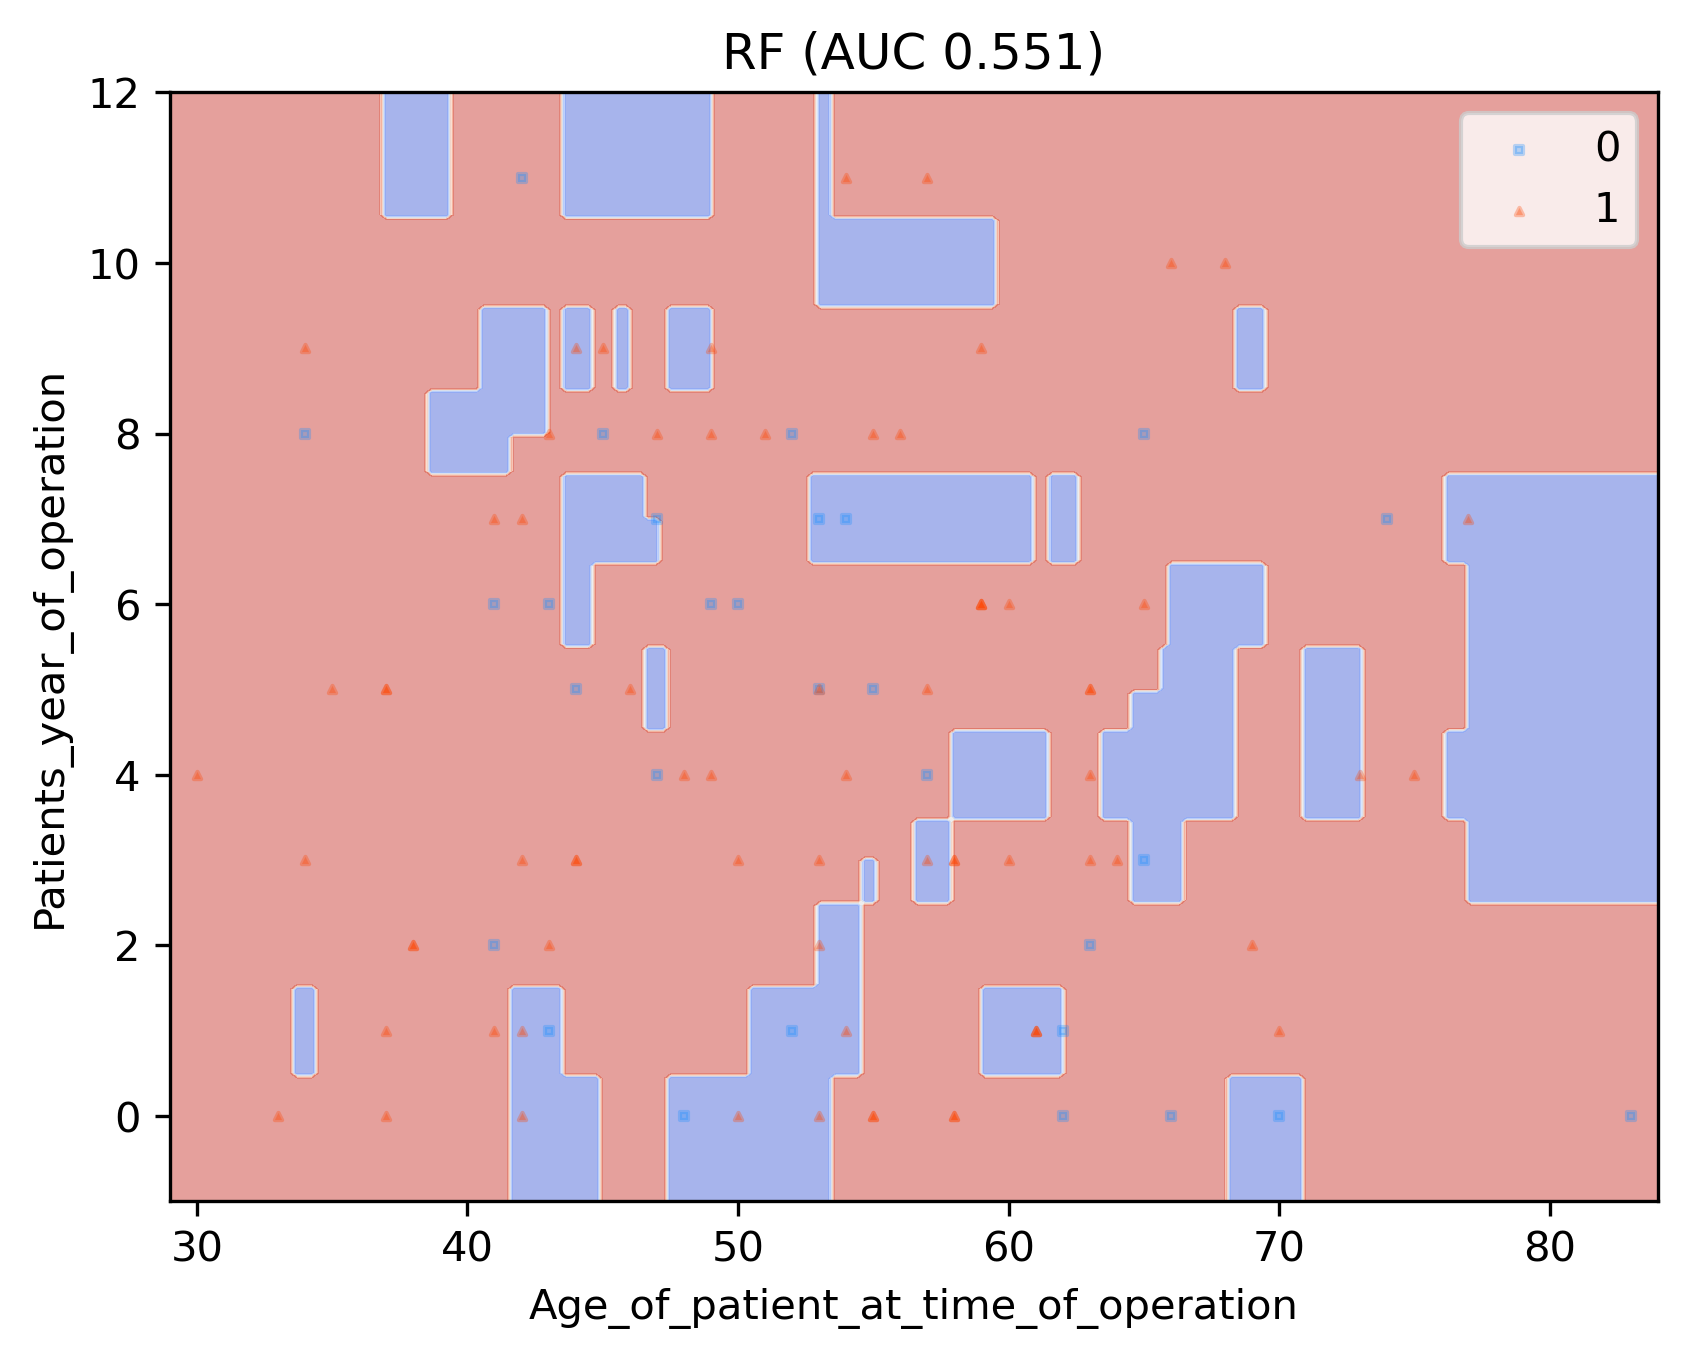

<Figure size 1920x1440 with 0 Axes>

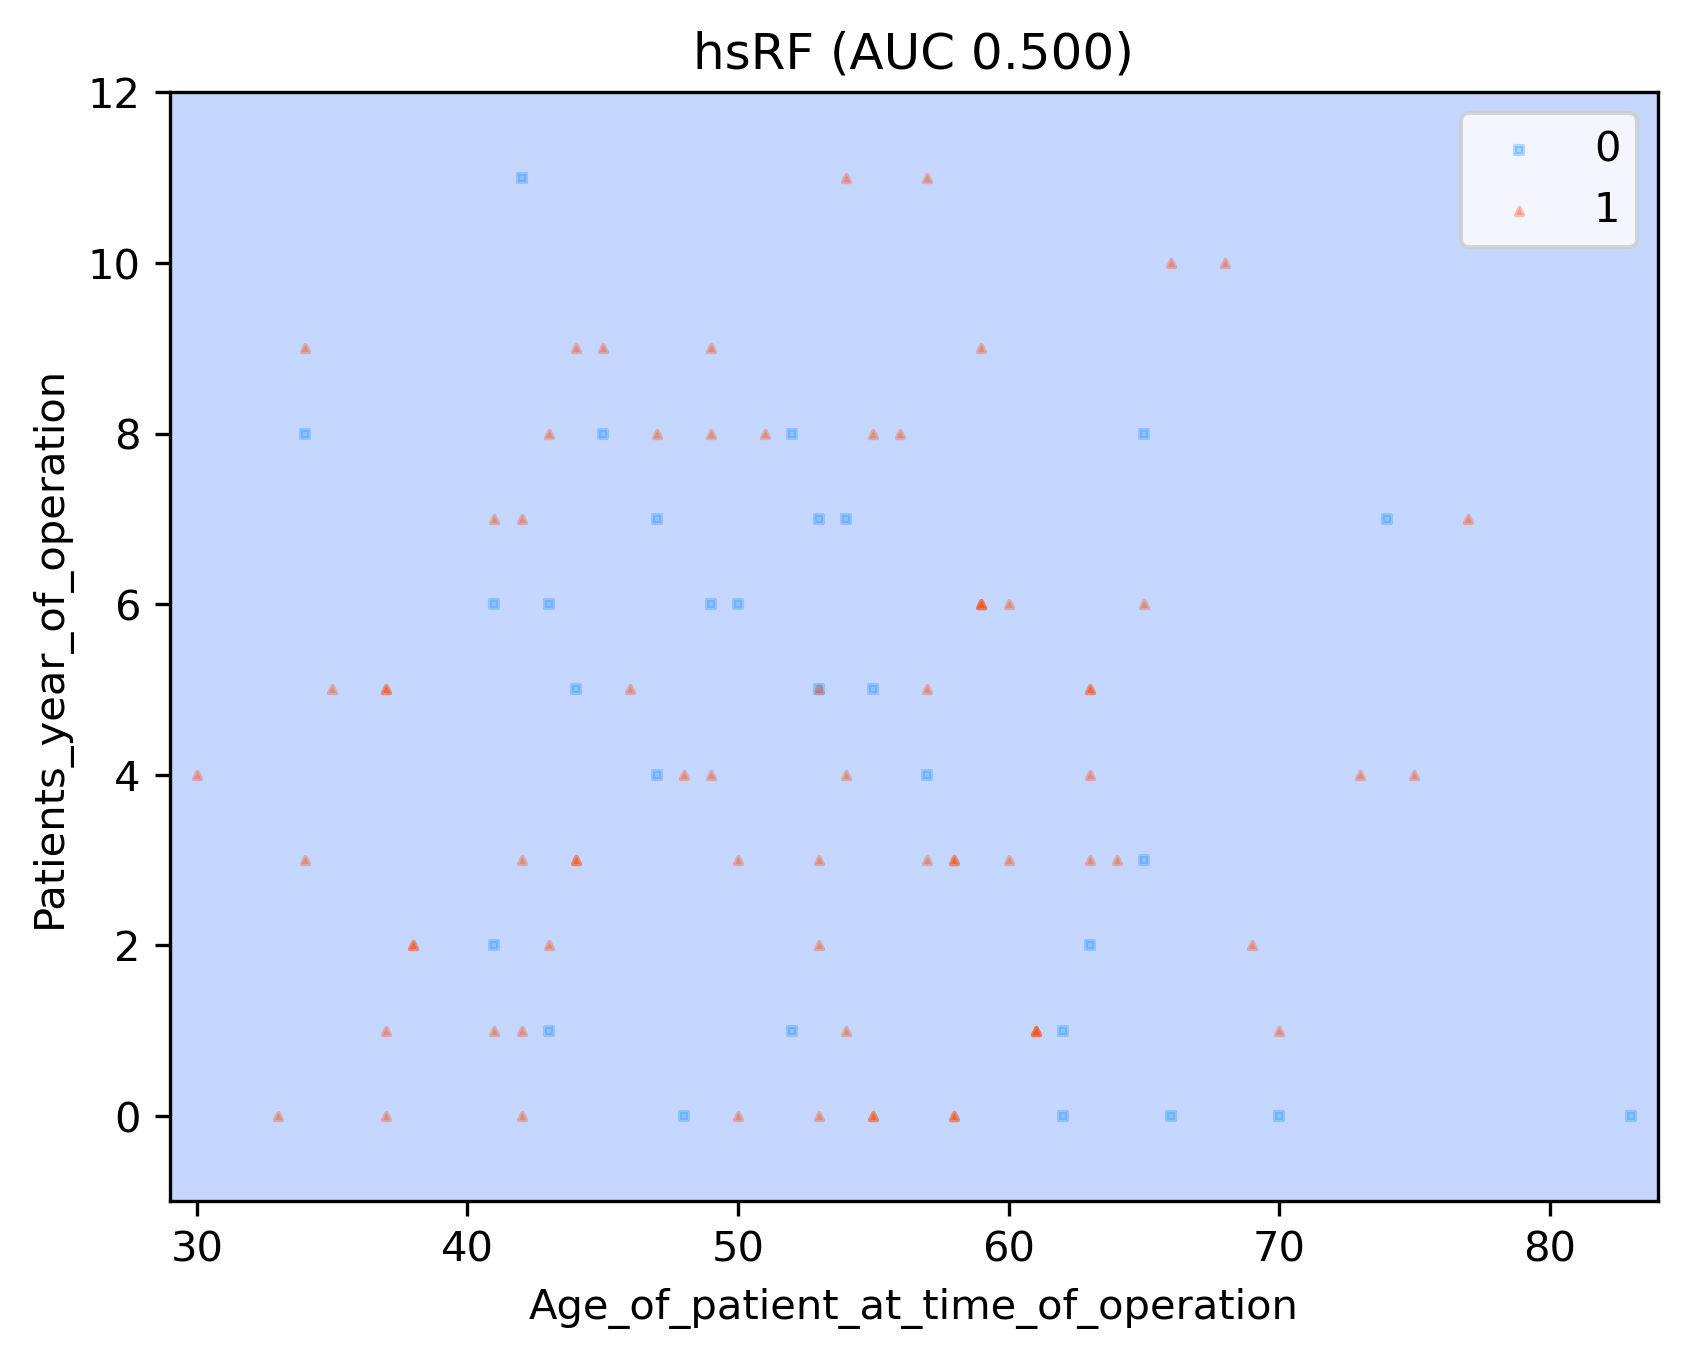

In [8]:
np.random.seed(42)
test_simpler_boundary("haberman", "imodels", ["Age_of_patient_at_time_of_operation", "Number_of_positive_axillary_nodes_detected"])
test_simpler_boundary("haberman", "imodels")

Optimal lambda: 50.0
     Feature importance
                      X_4 | 0.443
                     X_26 | 0.248
                      X_2 | 0.033
                     X_13 | 0.029
                      X_7 | 0.025
                      X_3 | 0.024
                      X_0 | 0.023
                      X_6 | 0.023
                     X_16 | 0.022
                     X_15 | 0.021
Optimal lambda: 1.0


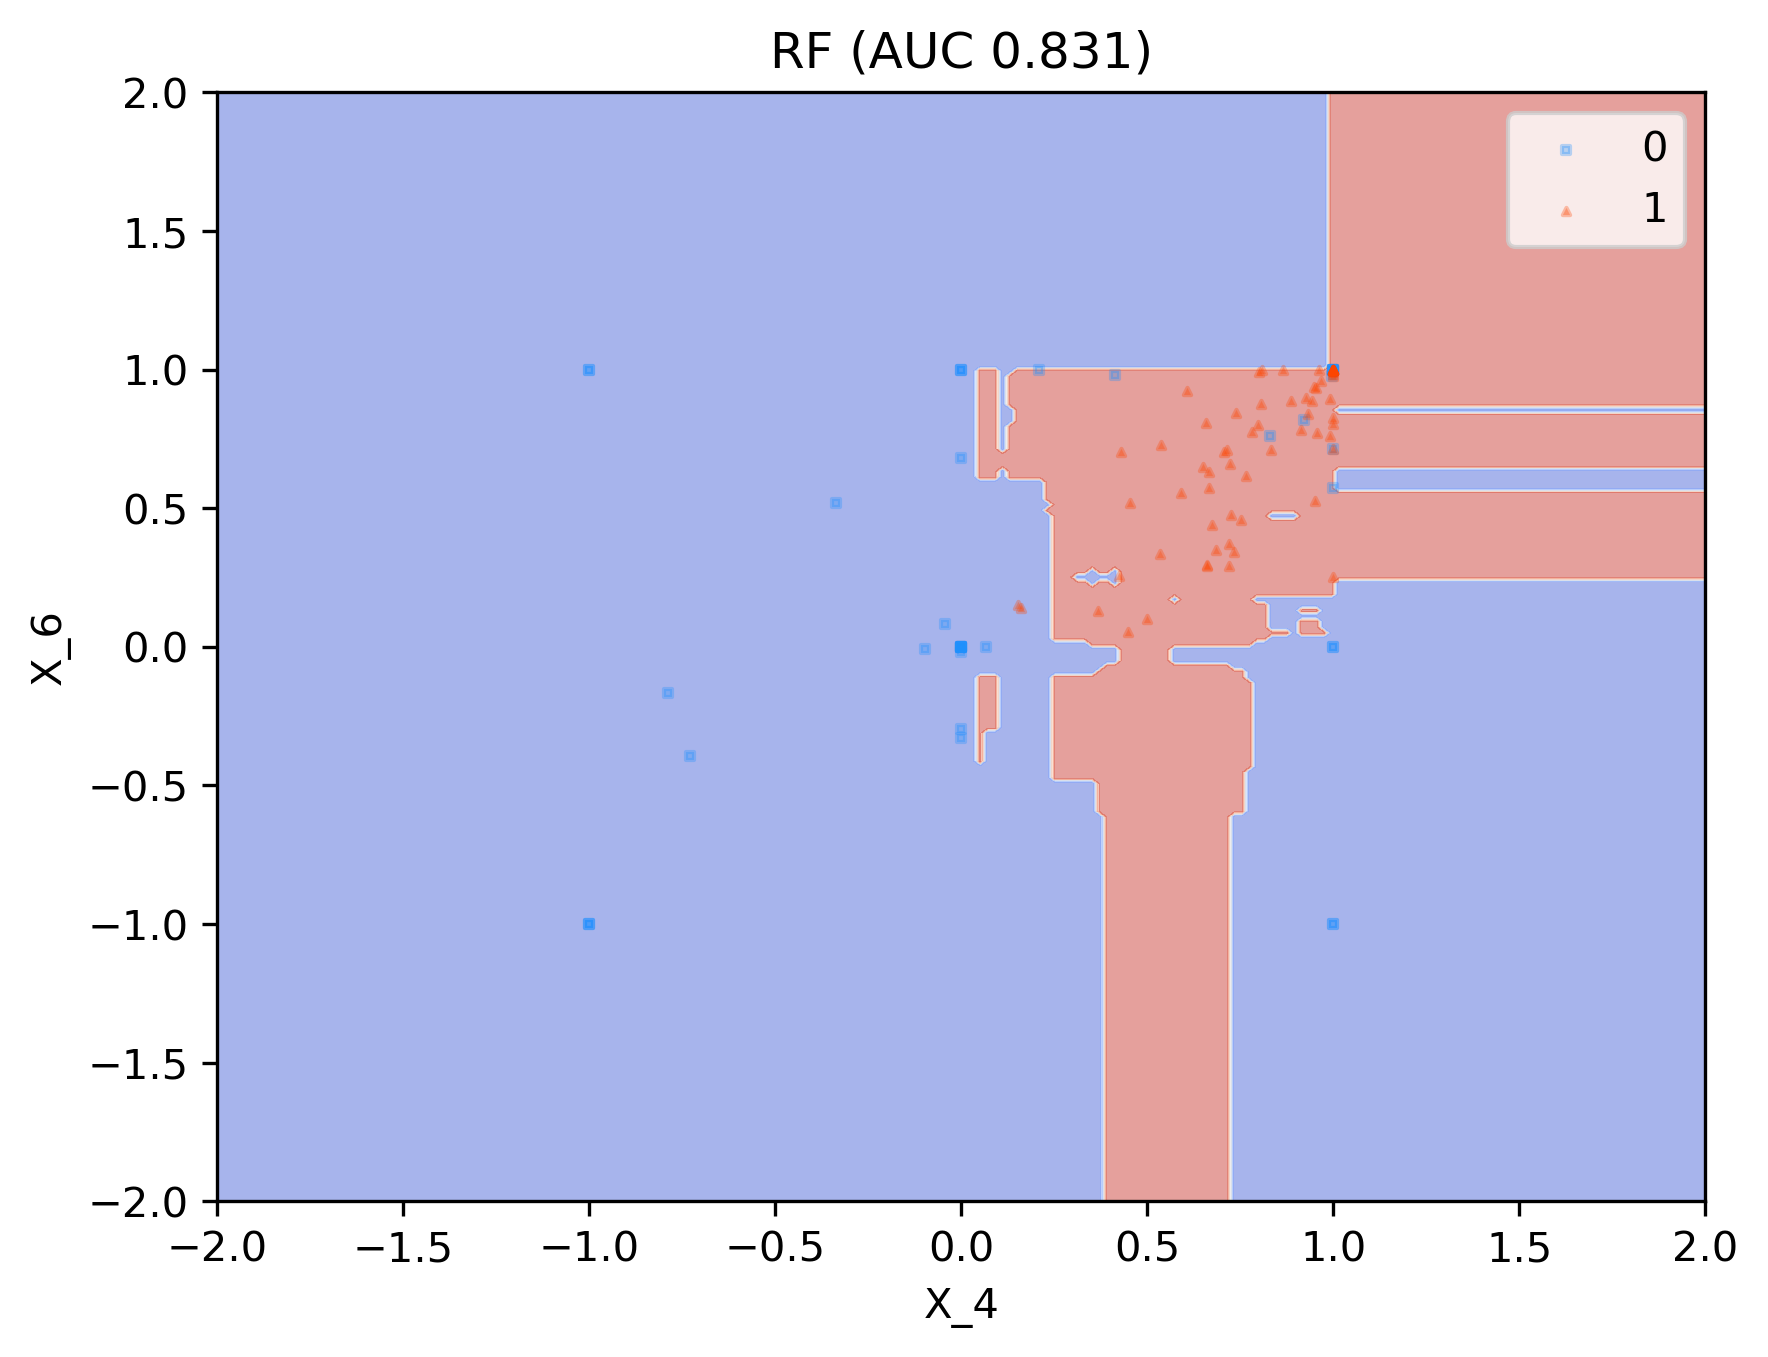

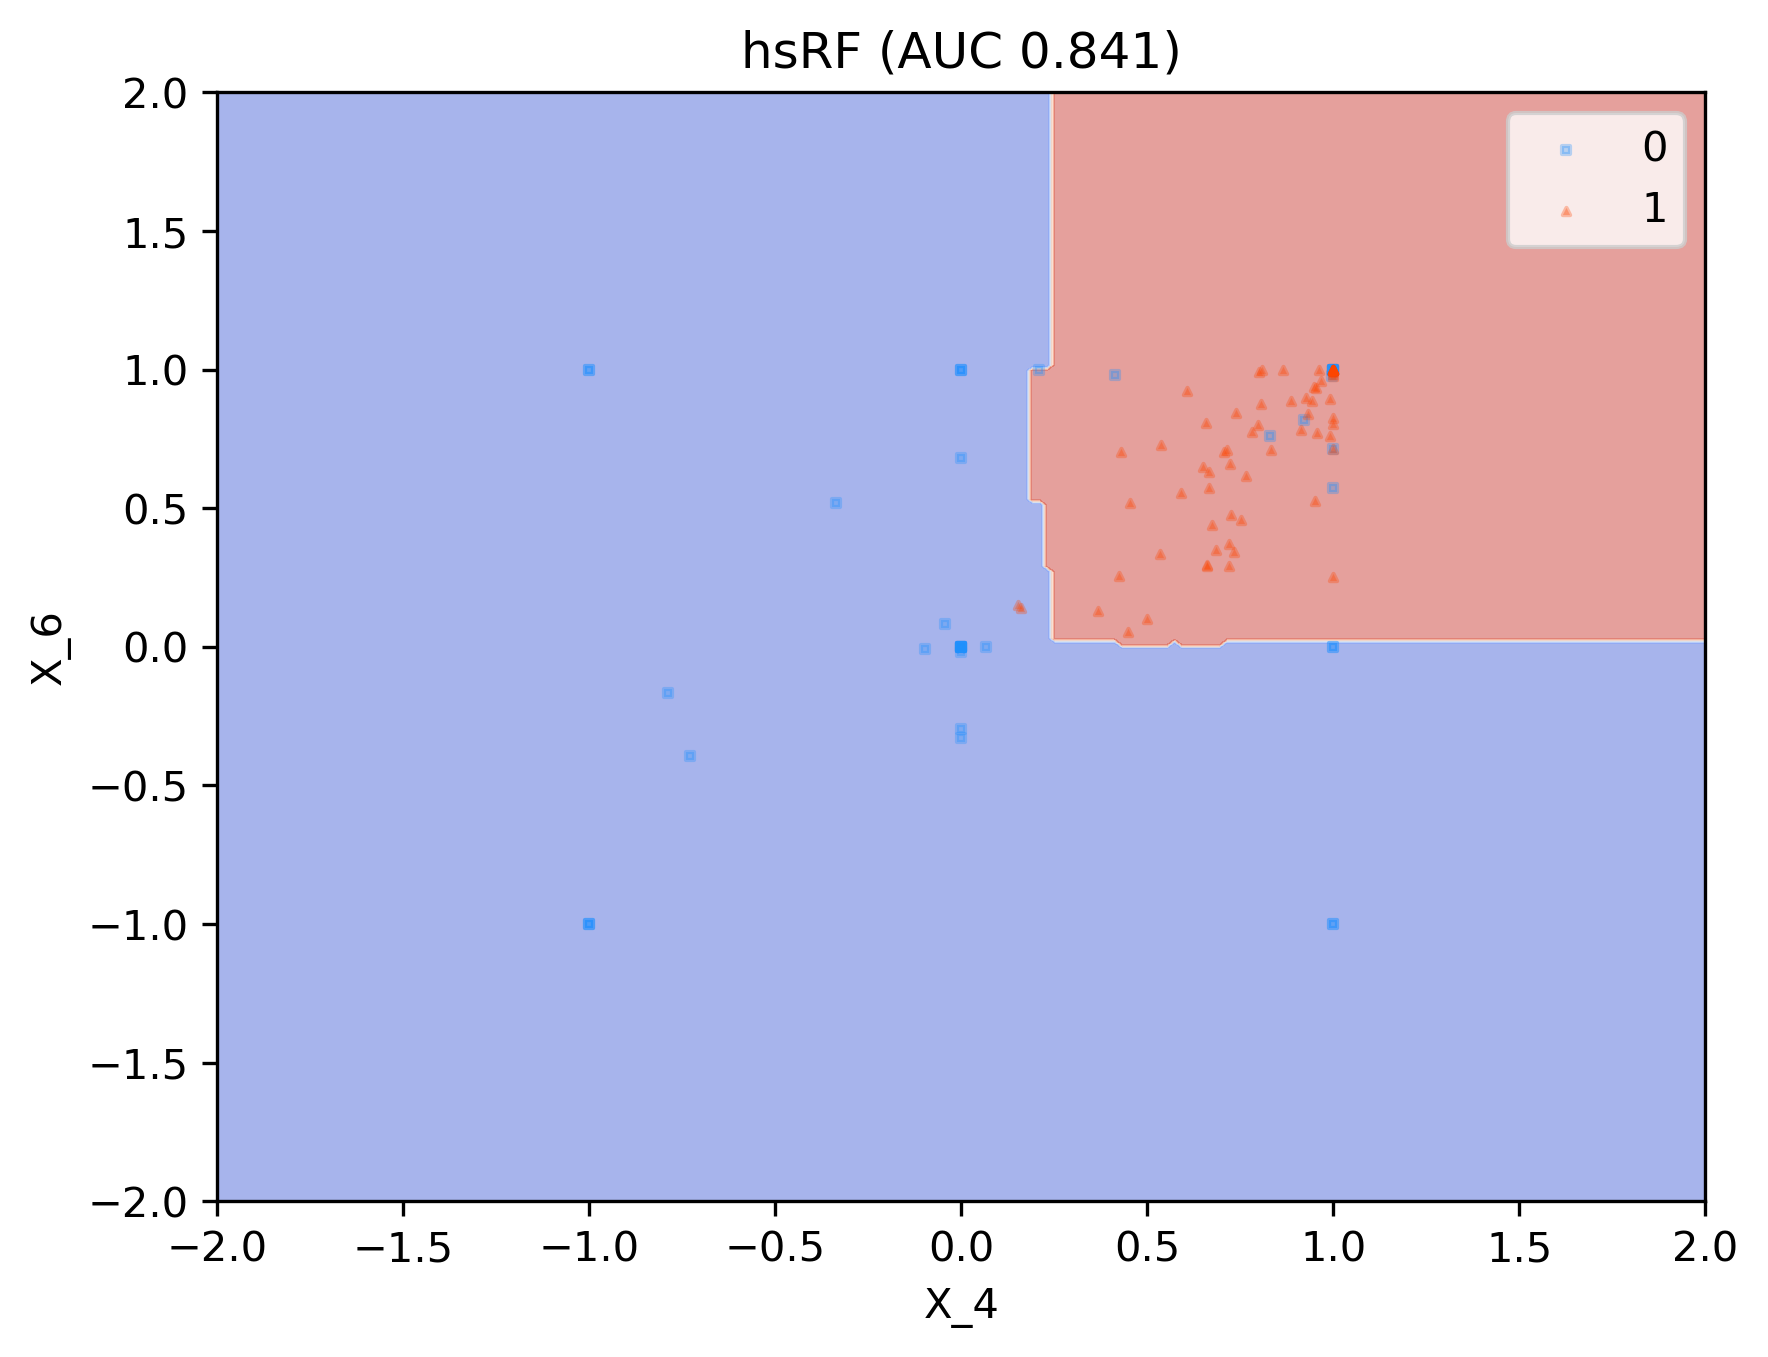

<Figure size 1920x1440 with 0 Axes>

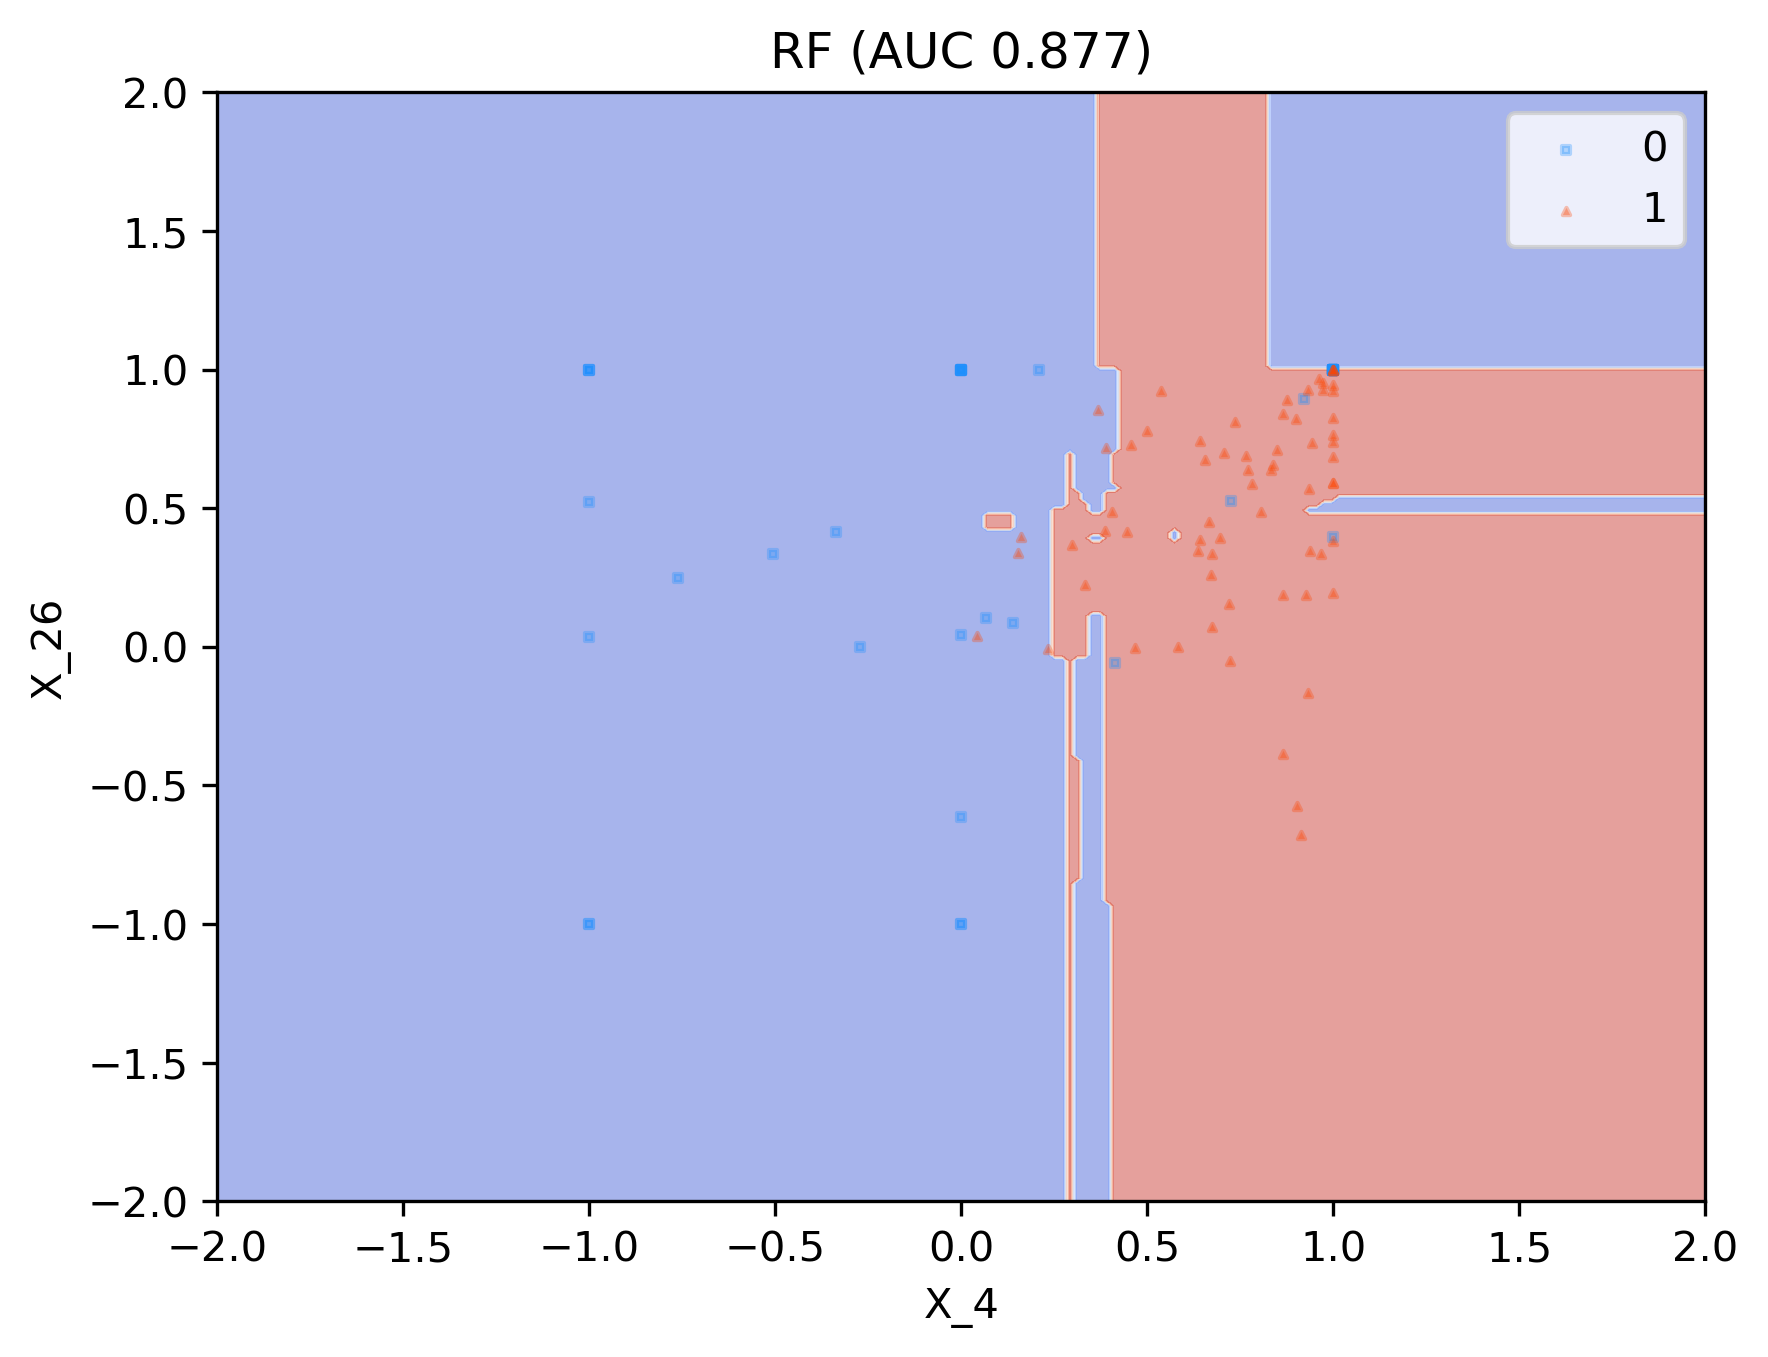

<Figure size 1920x1440 with 0 Axes>

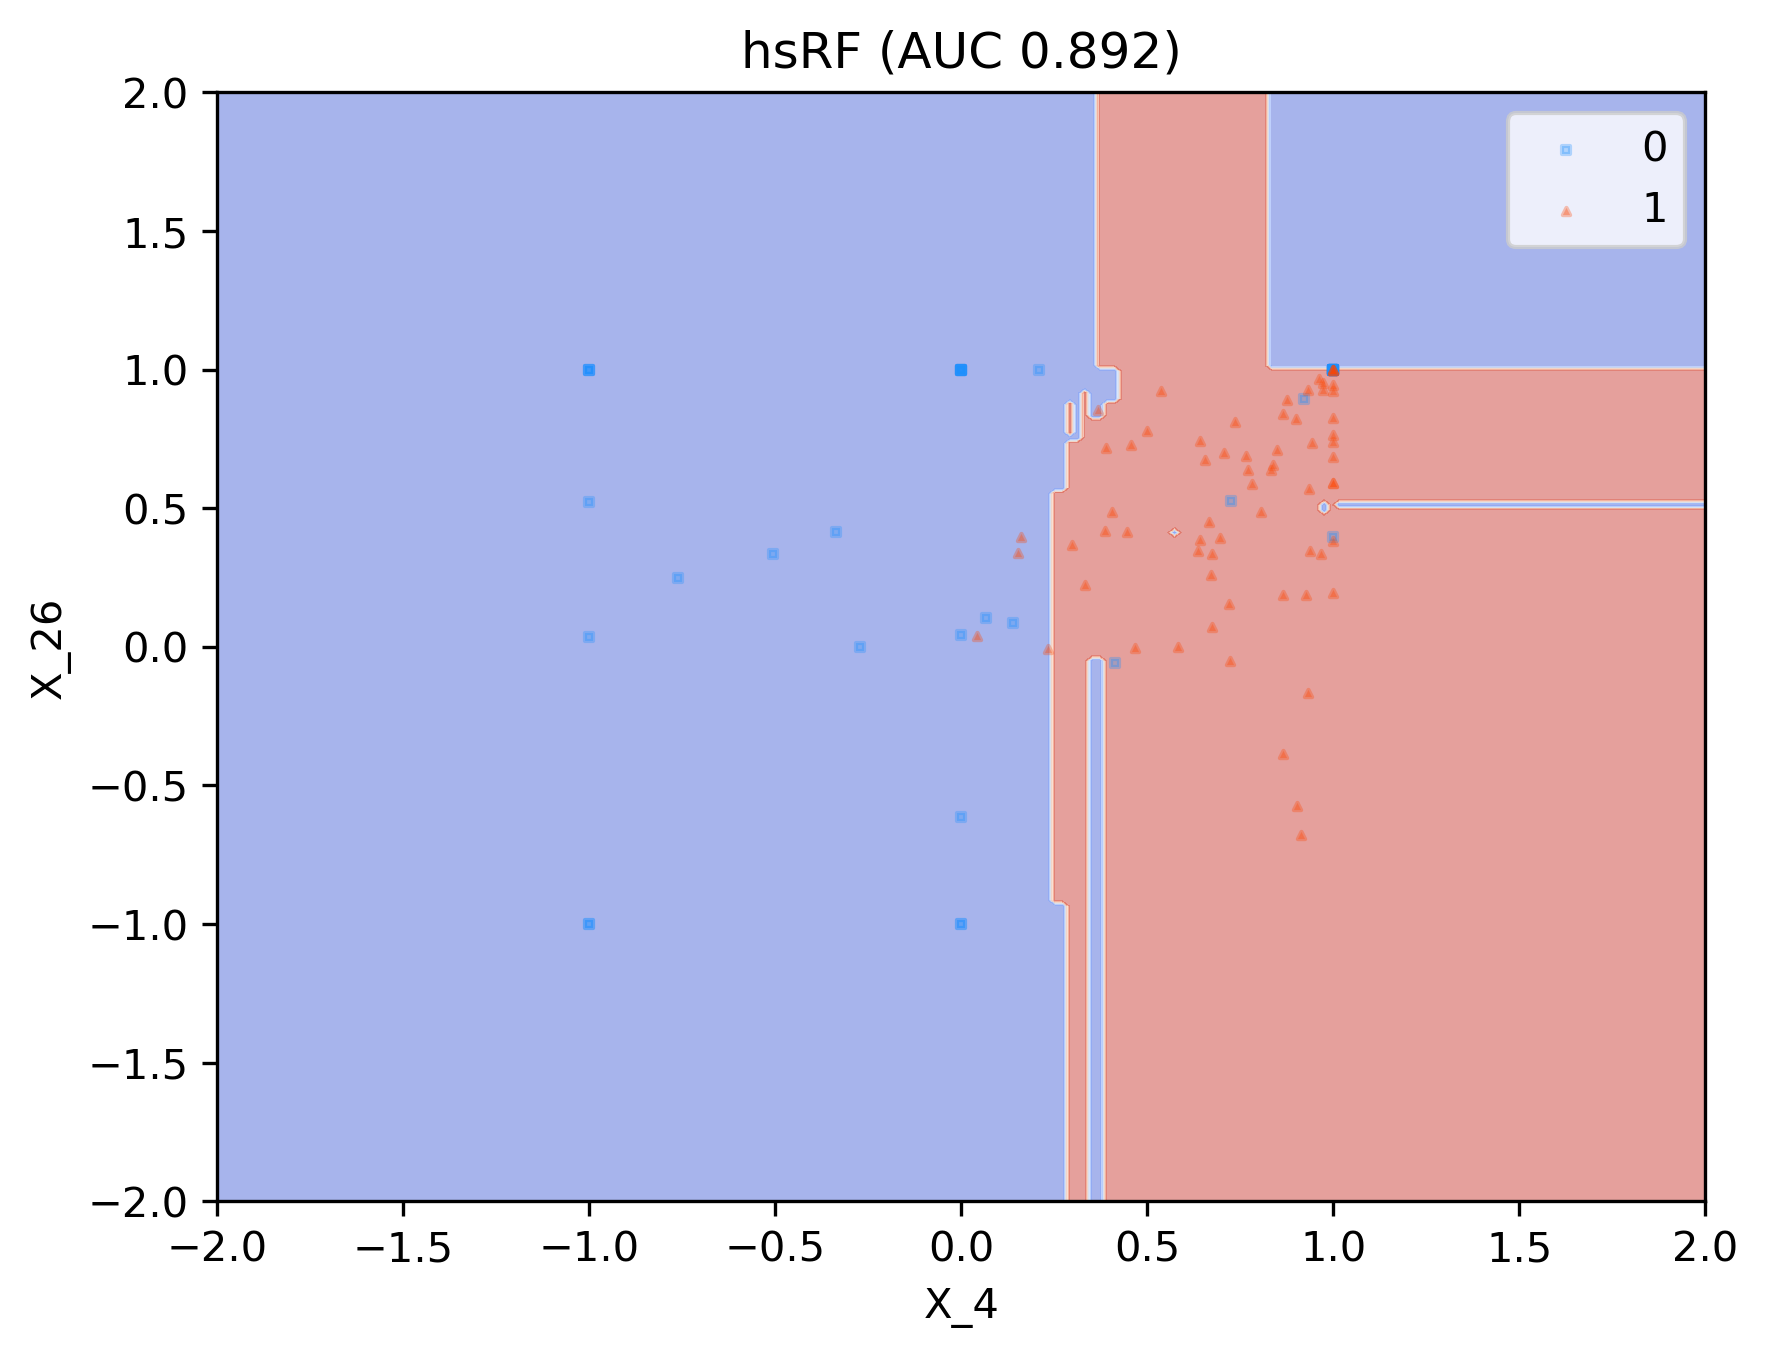

In [9]:
np.random.seed(42)
test_simpler_boundary("ionosphere", "pmlb", ["X_4", "X_6"])
test_simpler_boundary("ionosphere", "pmlb")

Optimal lambda: 50.0
     Feature importance
                       A2 | 0.317
                       A6 | 0.230
                       A7 | 0.134
                       A8 | 0.112
                       A3 | 0.088
                       A1 | 0.061
                       A5 | 0.036
                       A4 | 0.022
Optimal lambda: 100.0


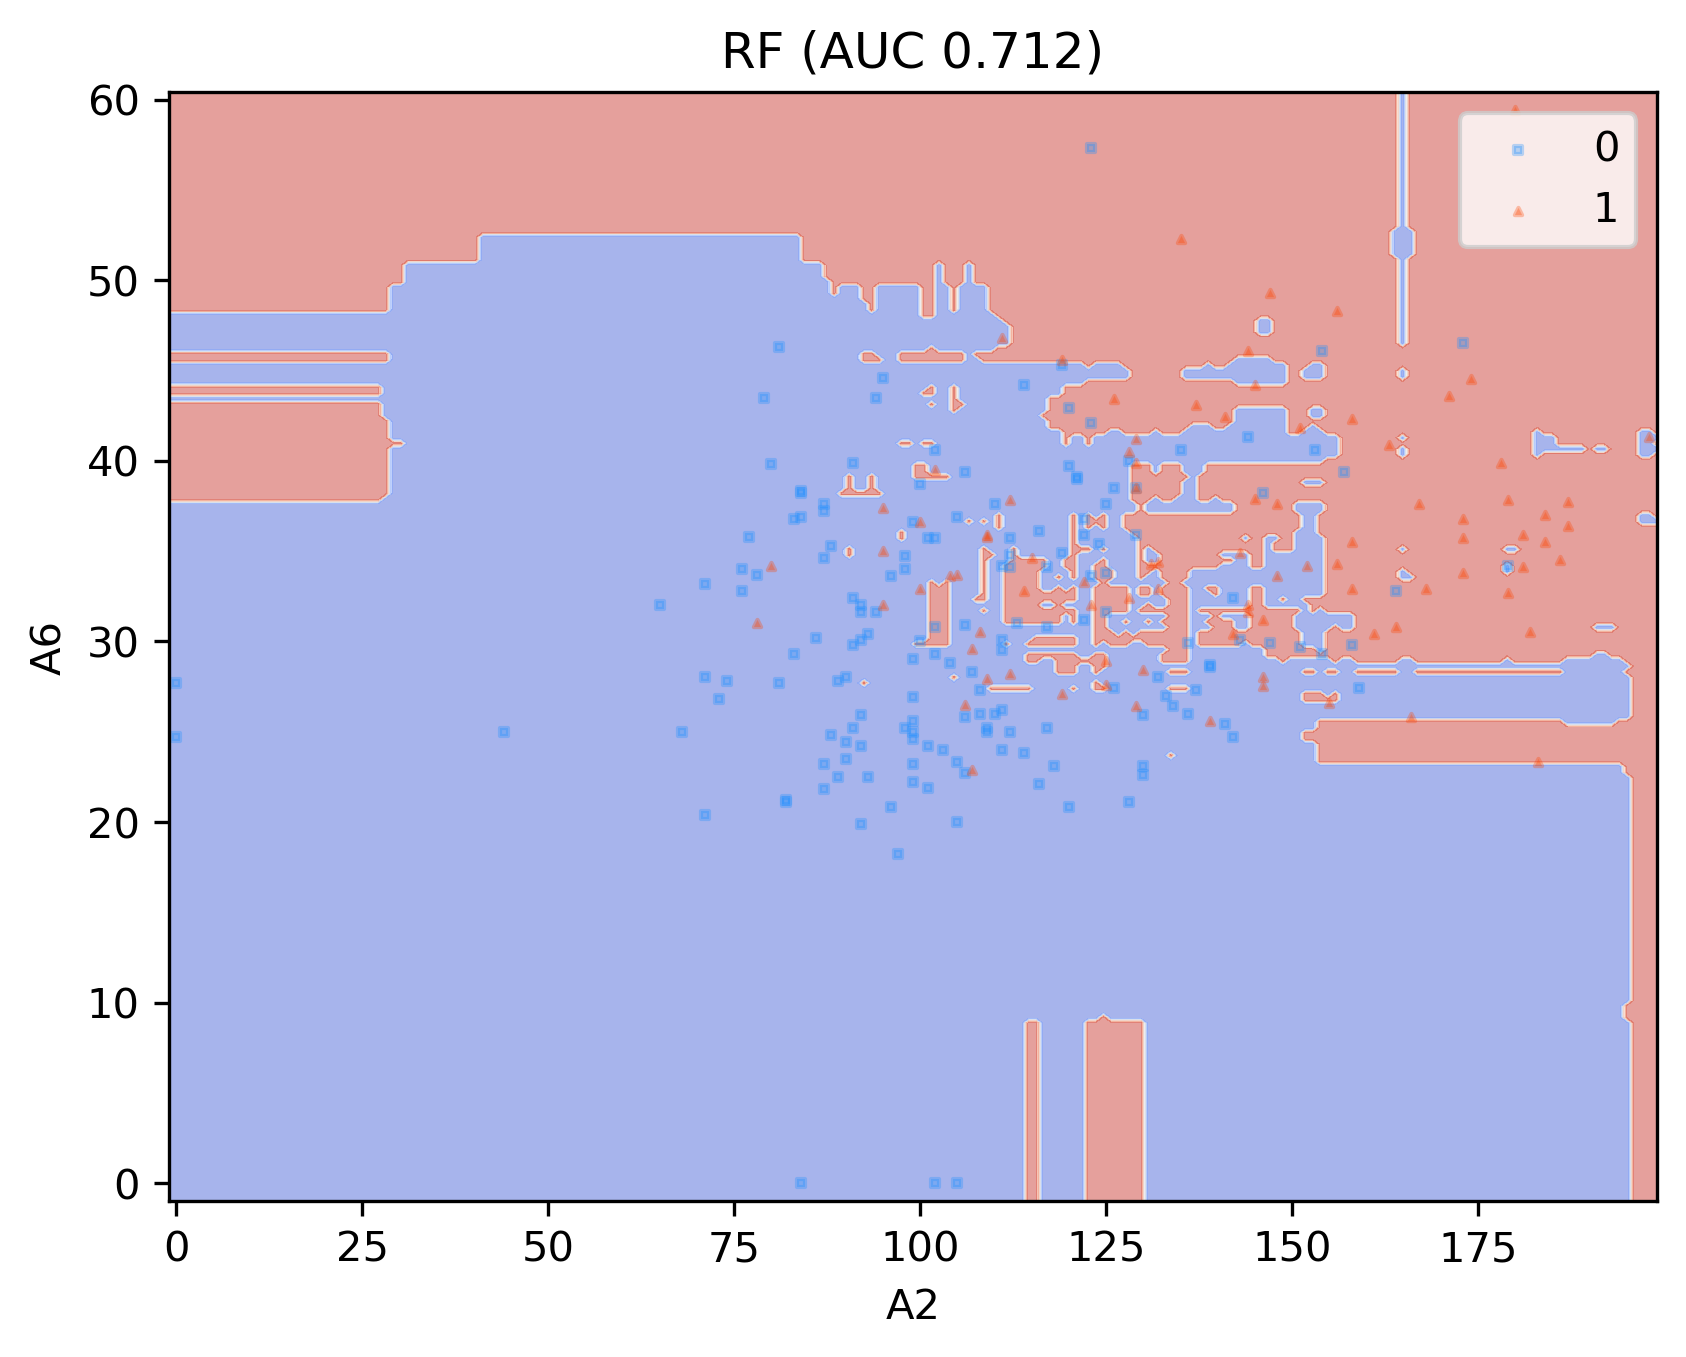

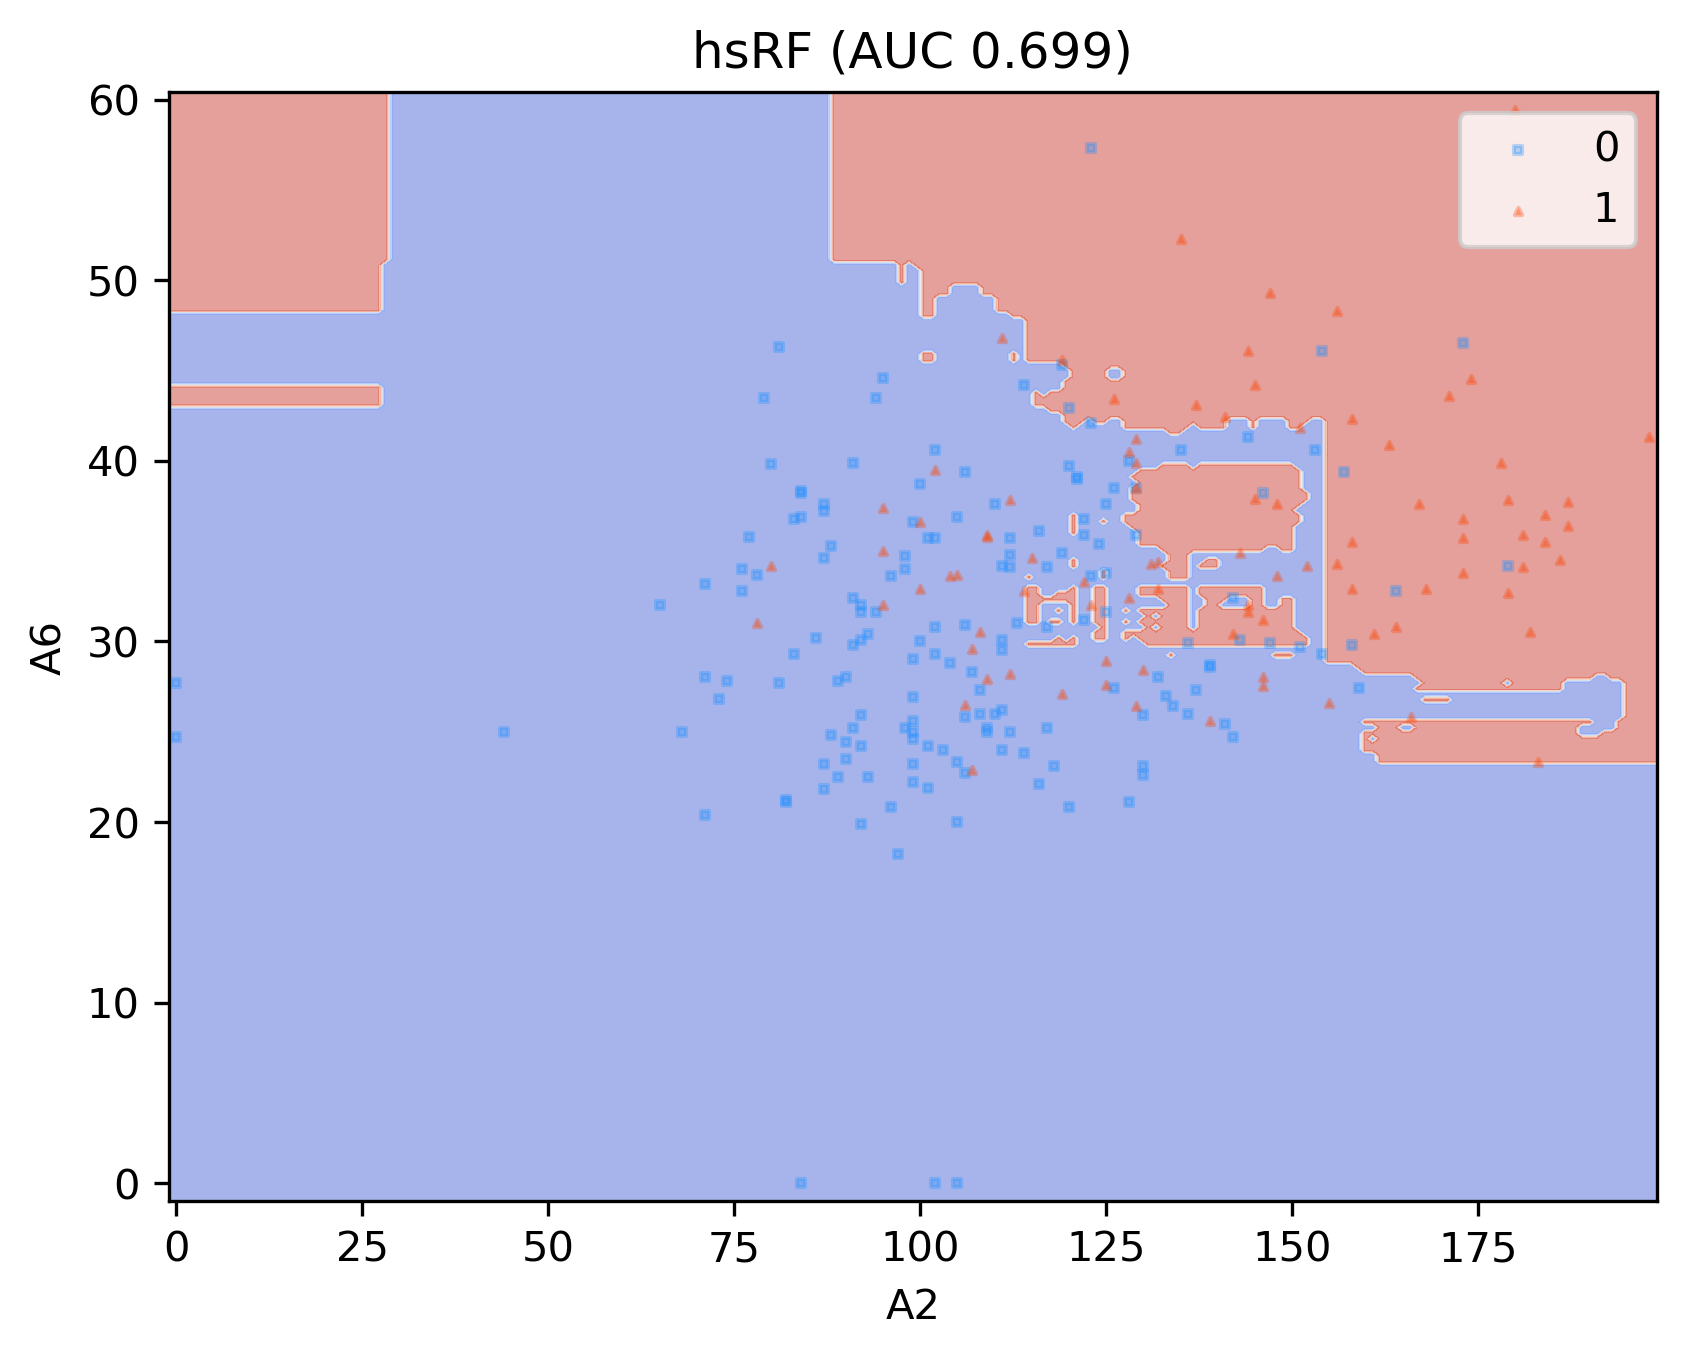

<Figure size 1920x1440 with 0 Axes>

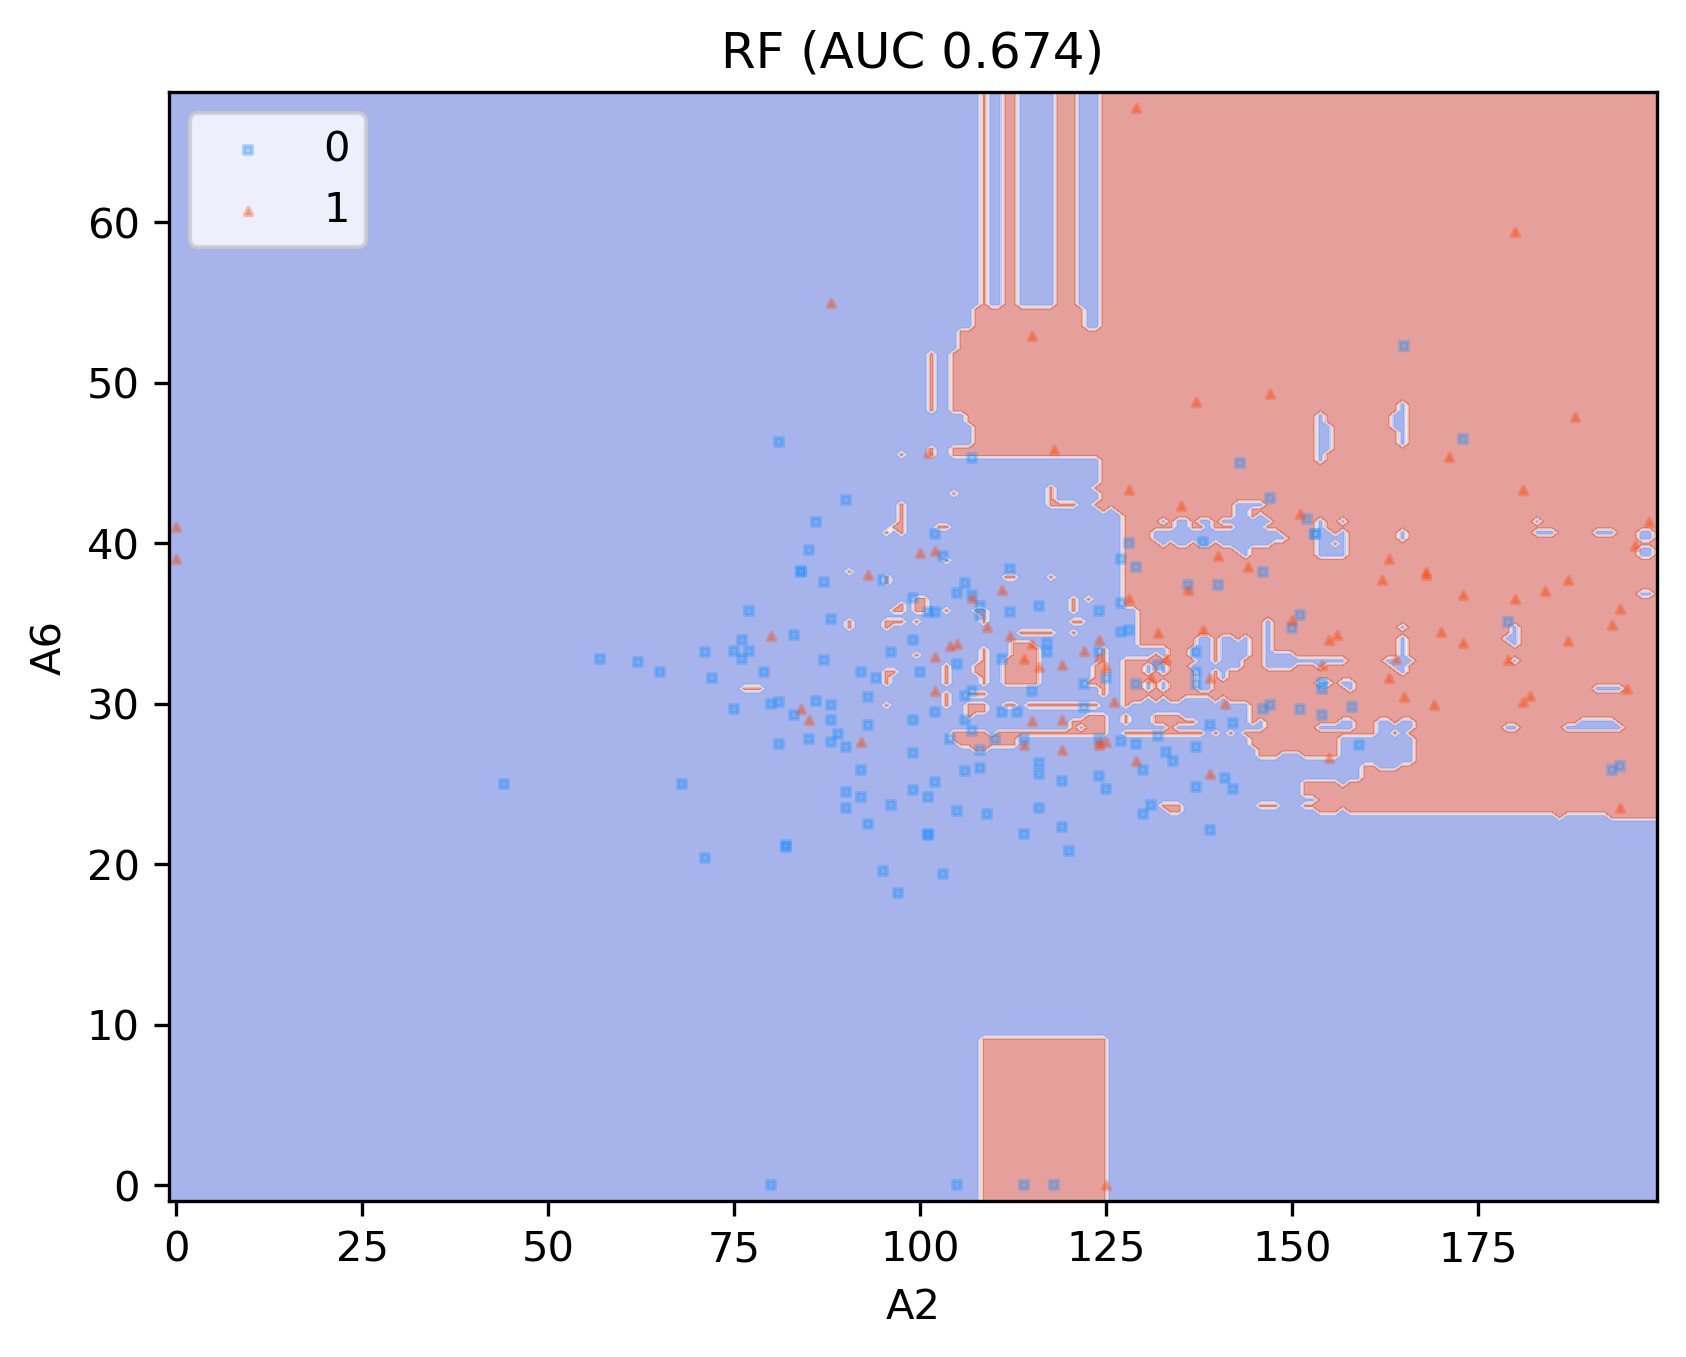

<Figure size 1920x1440 with 0 Axes>

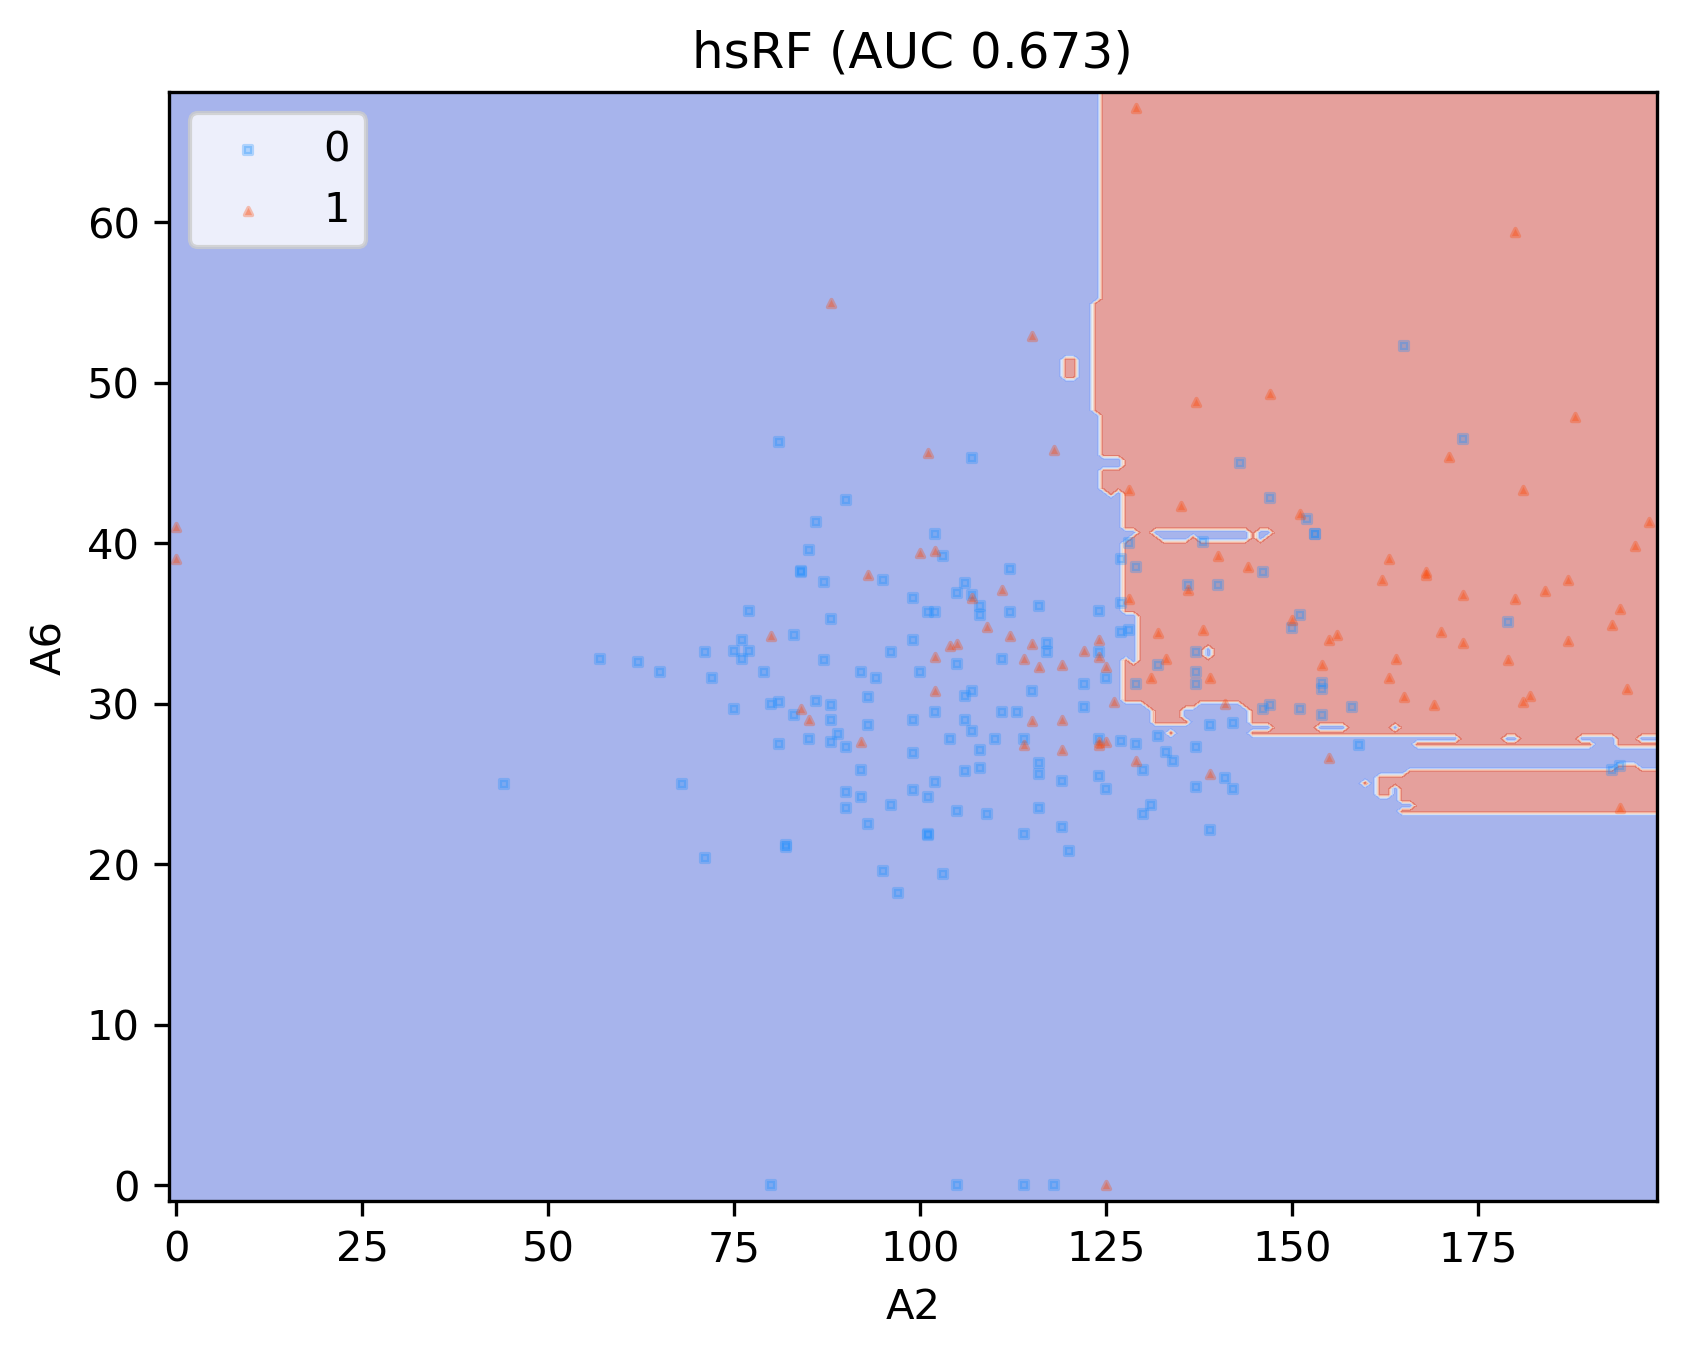

In [10]:
np.random.seed(42)
test_simpler_boundary("diabetes", "pmlb", ["A2", "A6"])
test_simpler_boundary("diabetes", "pmlb")

Optimal lambda: 100.0
     Feature importance
                   Credit | 0.162
                   Status | 0.140
                      Age | 0.113
                 Duration | 0.091
          Savings-account | 0.061
                  Purpose | 0.058
           Residence-time | 0.050
           Credit-history | 0.045
                 Property | 0.041
               Employment | 0.038
Optimal lambda: 100.0


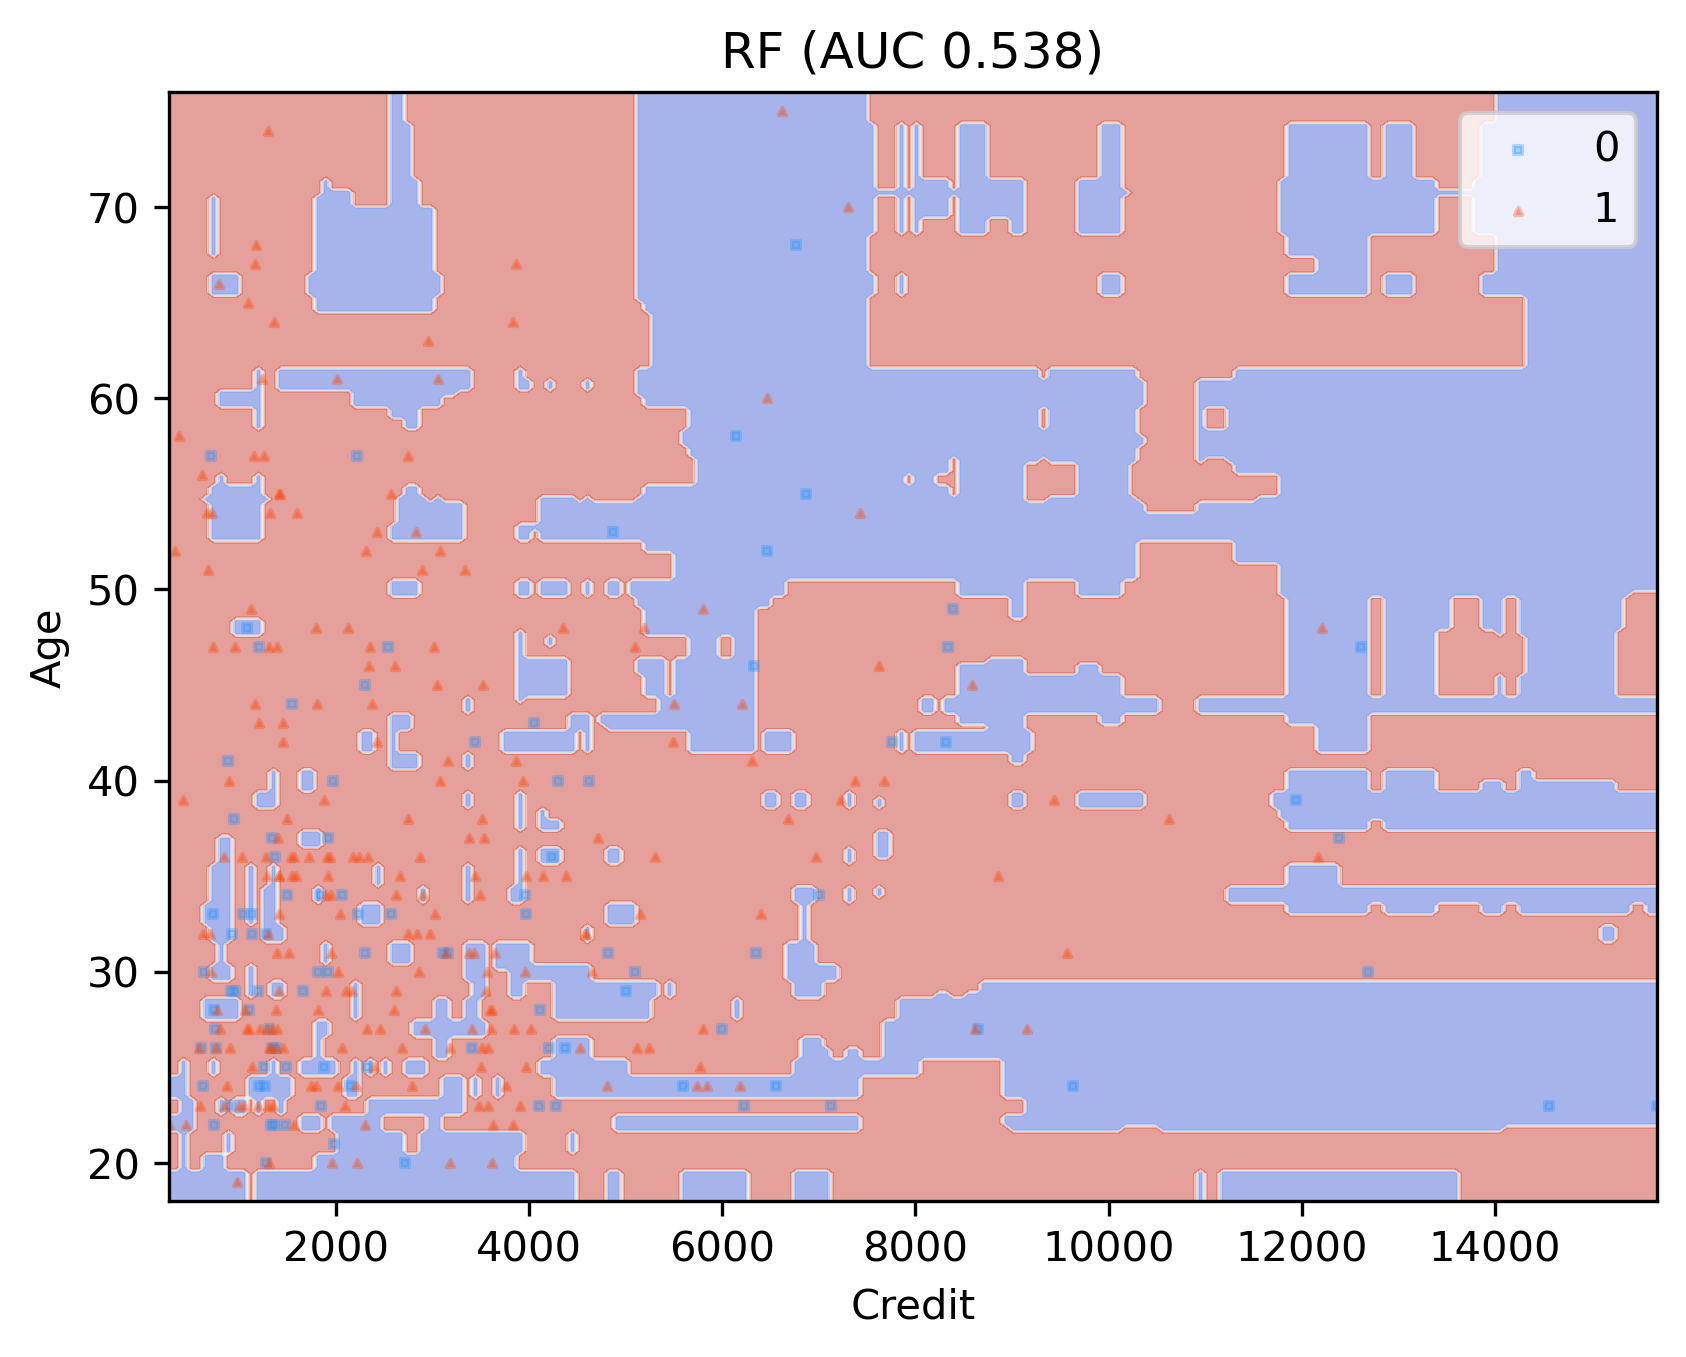

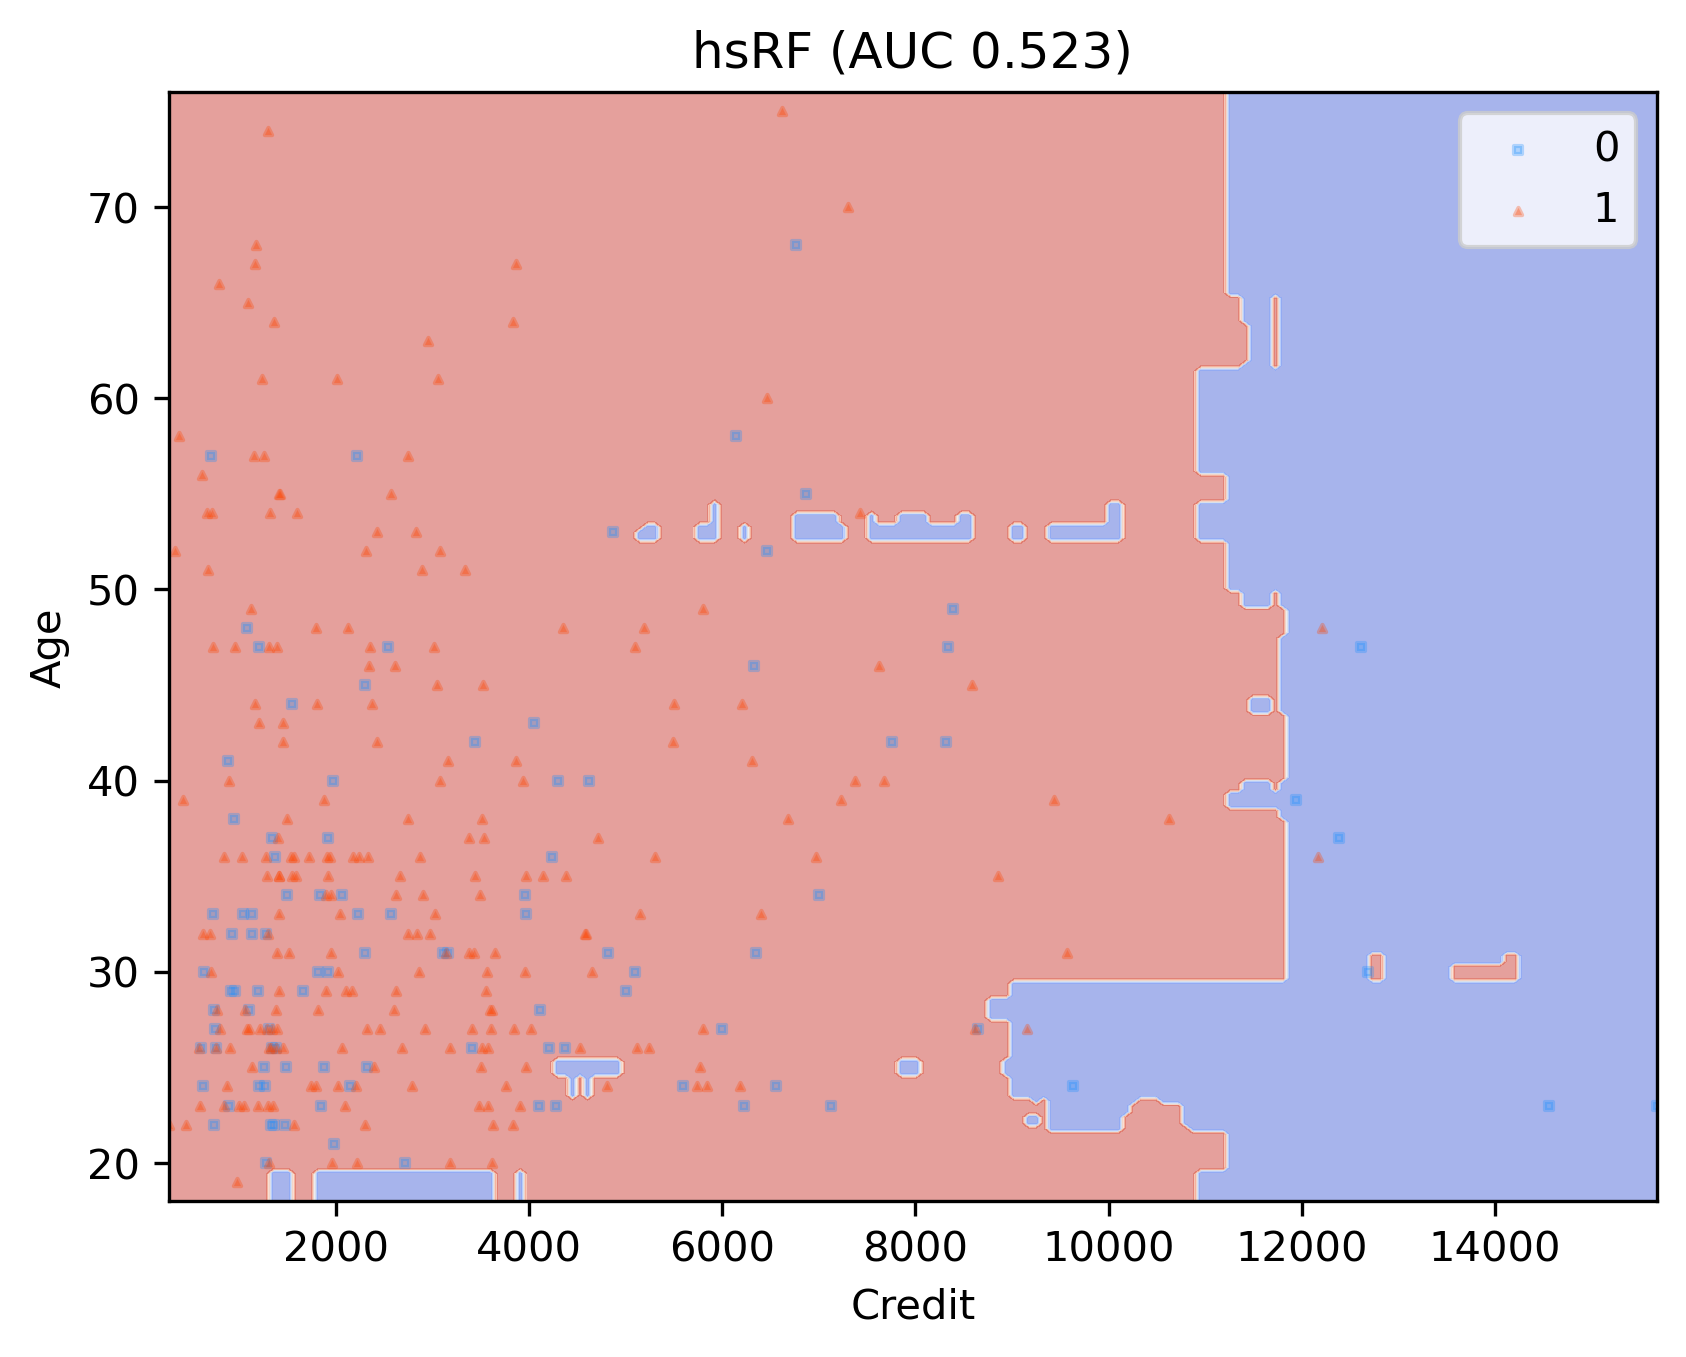

<Figure size 1920x1440 with 0 Axes>

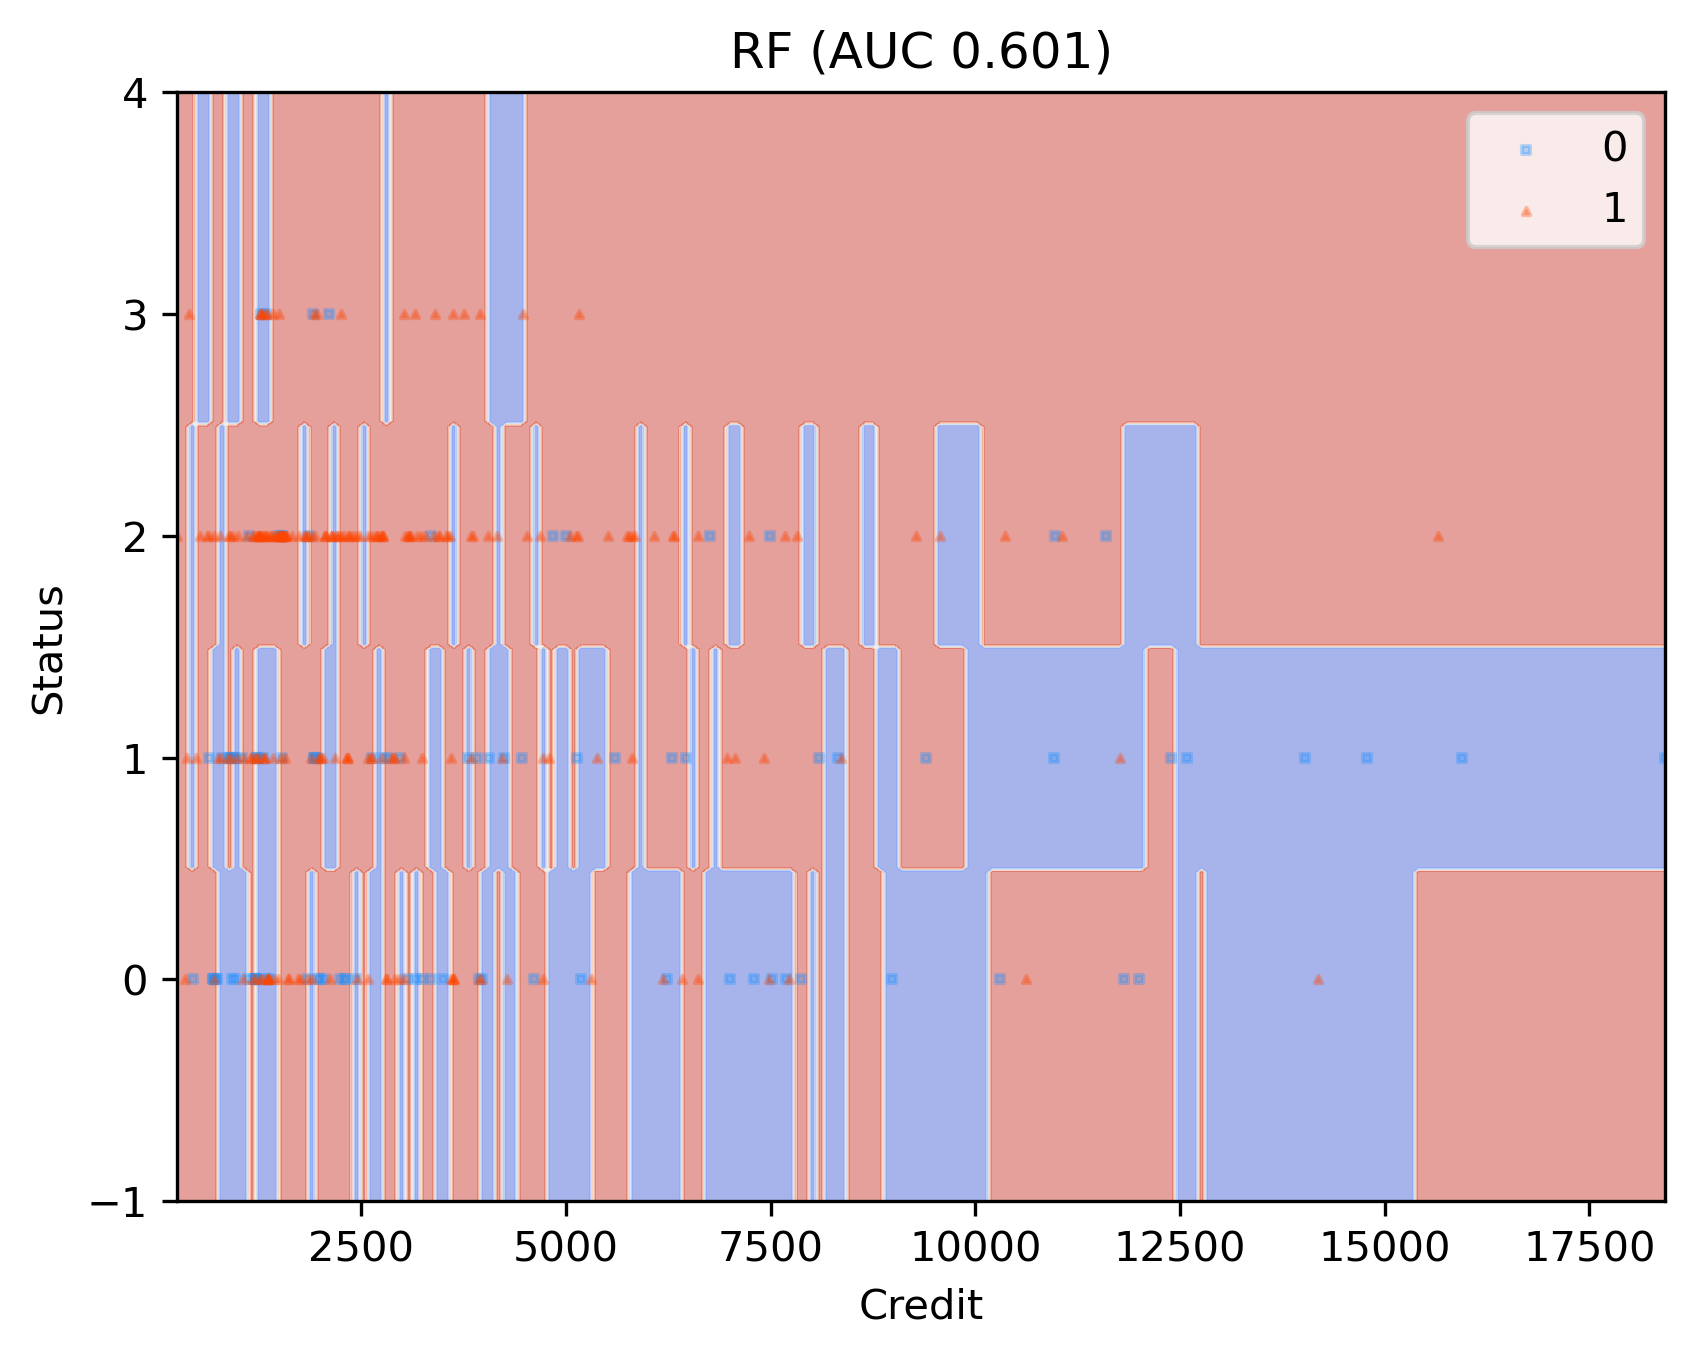

<Figure size 1920x1440 with 0 Axes>

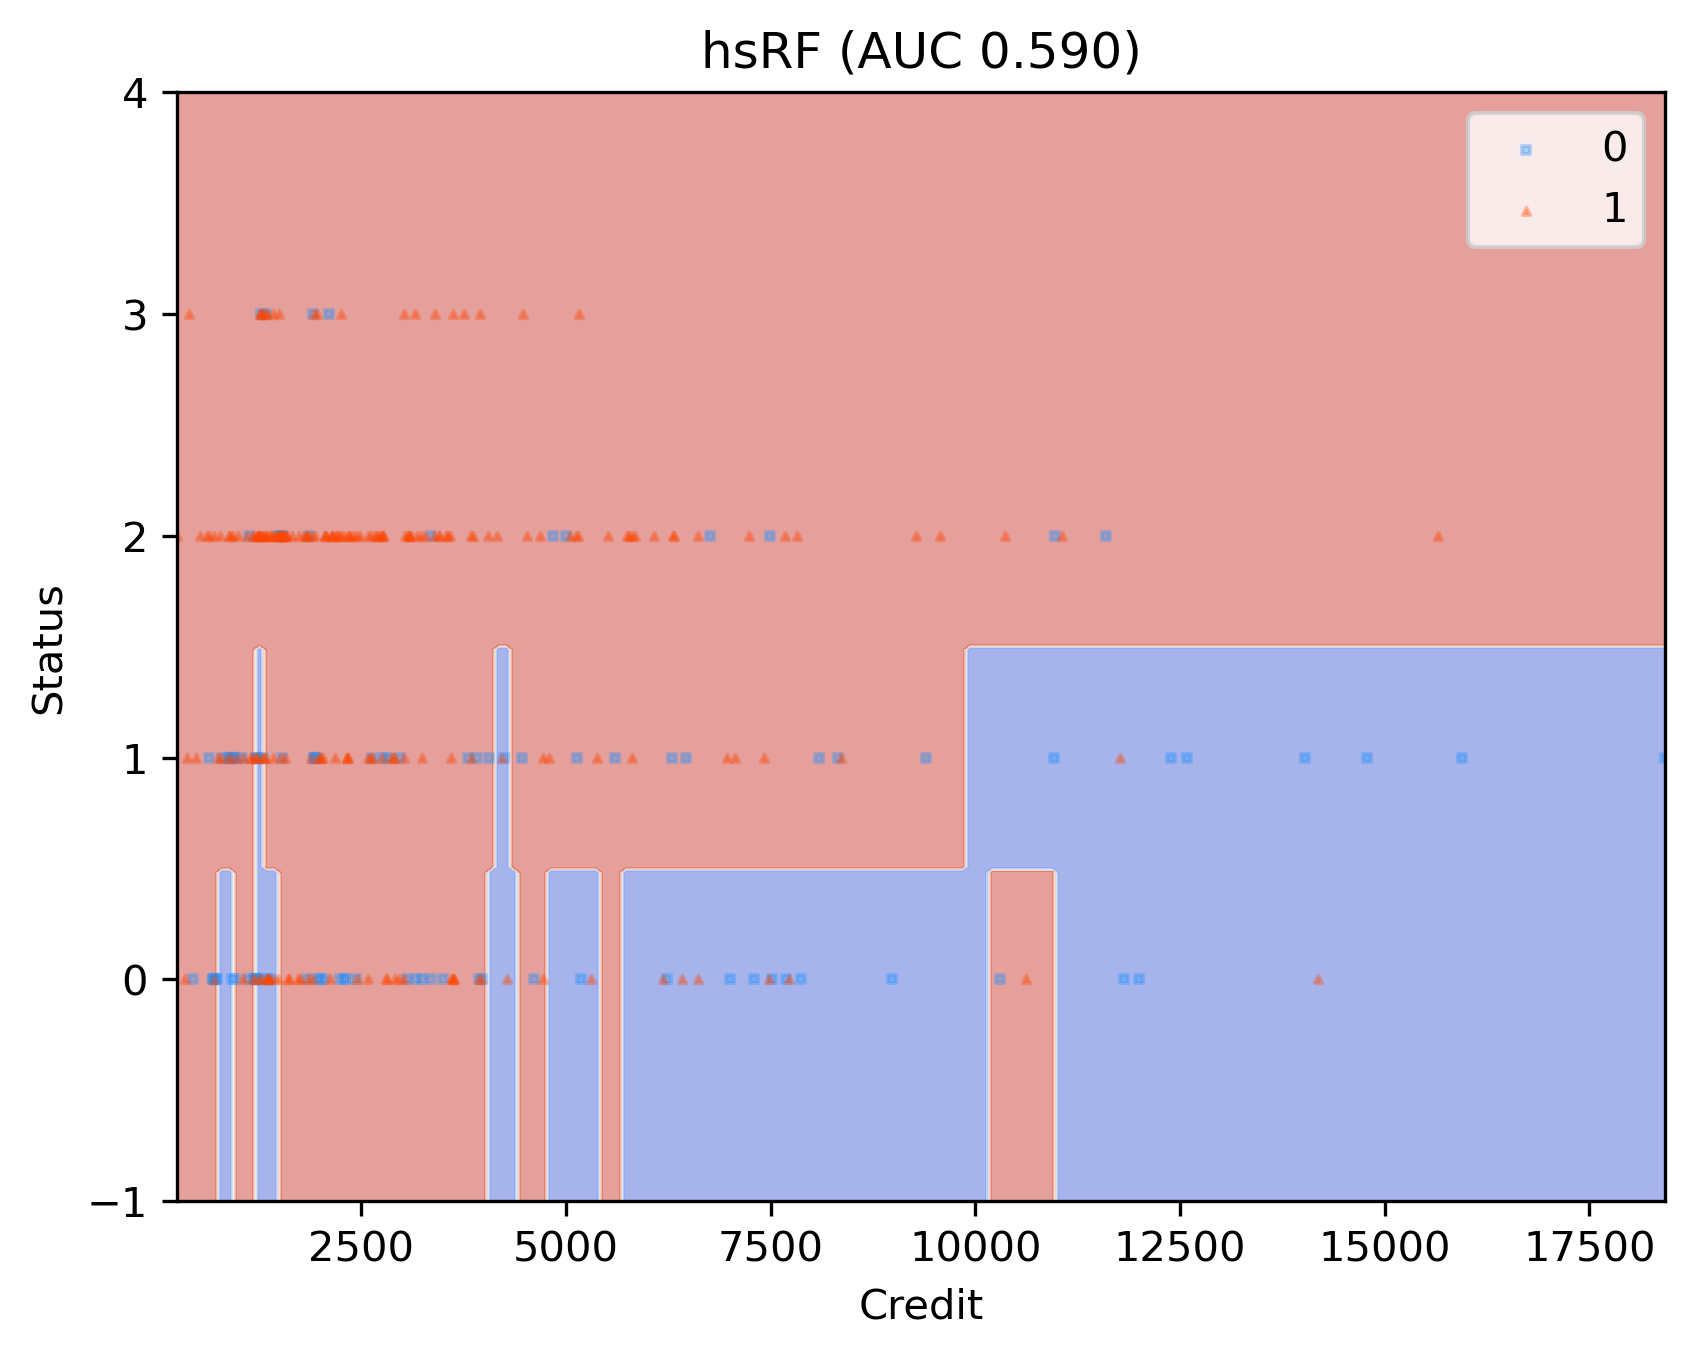

In [11]:
np.random.seed(42)
test_simpler_boundary("german", "pmlb", ["Credit", "Age"])
test_simpler_boundary("german", "pmlb")

Optimal lambda: 0.1
     Feature importance
friends_broken_in_steal:1 | 0.165
         physically_ass:1 | 0.050
             weighting_95 | 0.046
         physically_ass:0 | 0.038
   fr_suggest_agnts_law:2 | 0.028
nonexpermental_marijuana:0 | 0.019
                      age | 0.016
          drugs_in_comm:1 | 0.015
          drugs_in_comm:2 | 0.013
non-exp_past_year_marijuana:1 | 0.012
Optimal lambda: 0.1


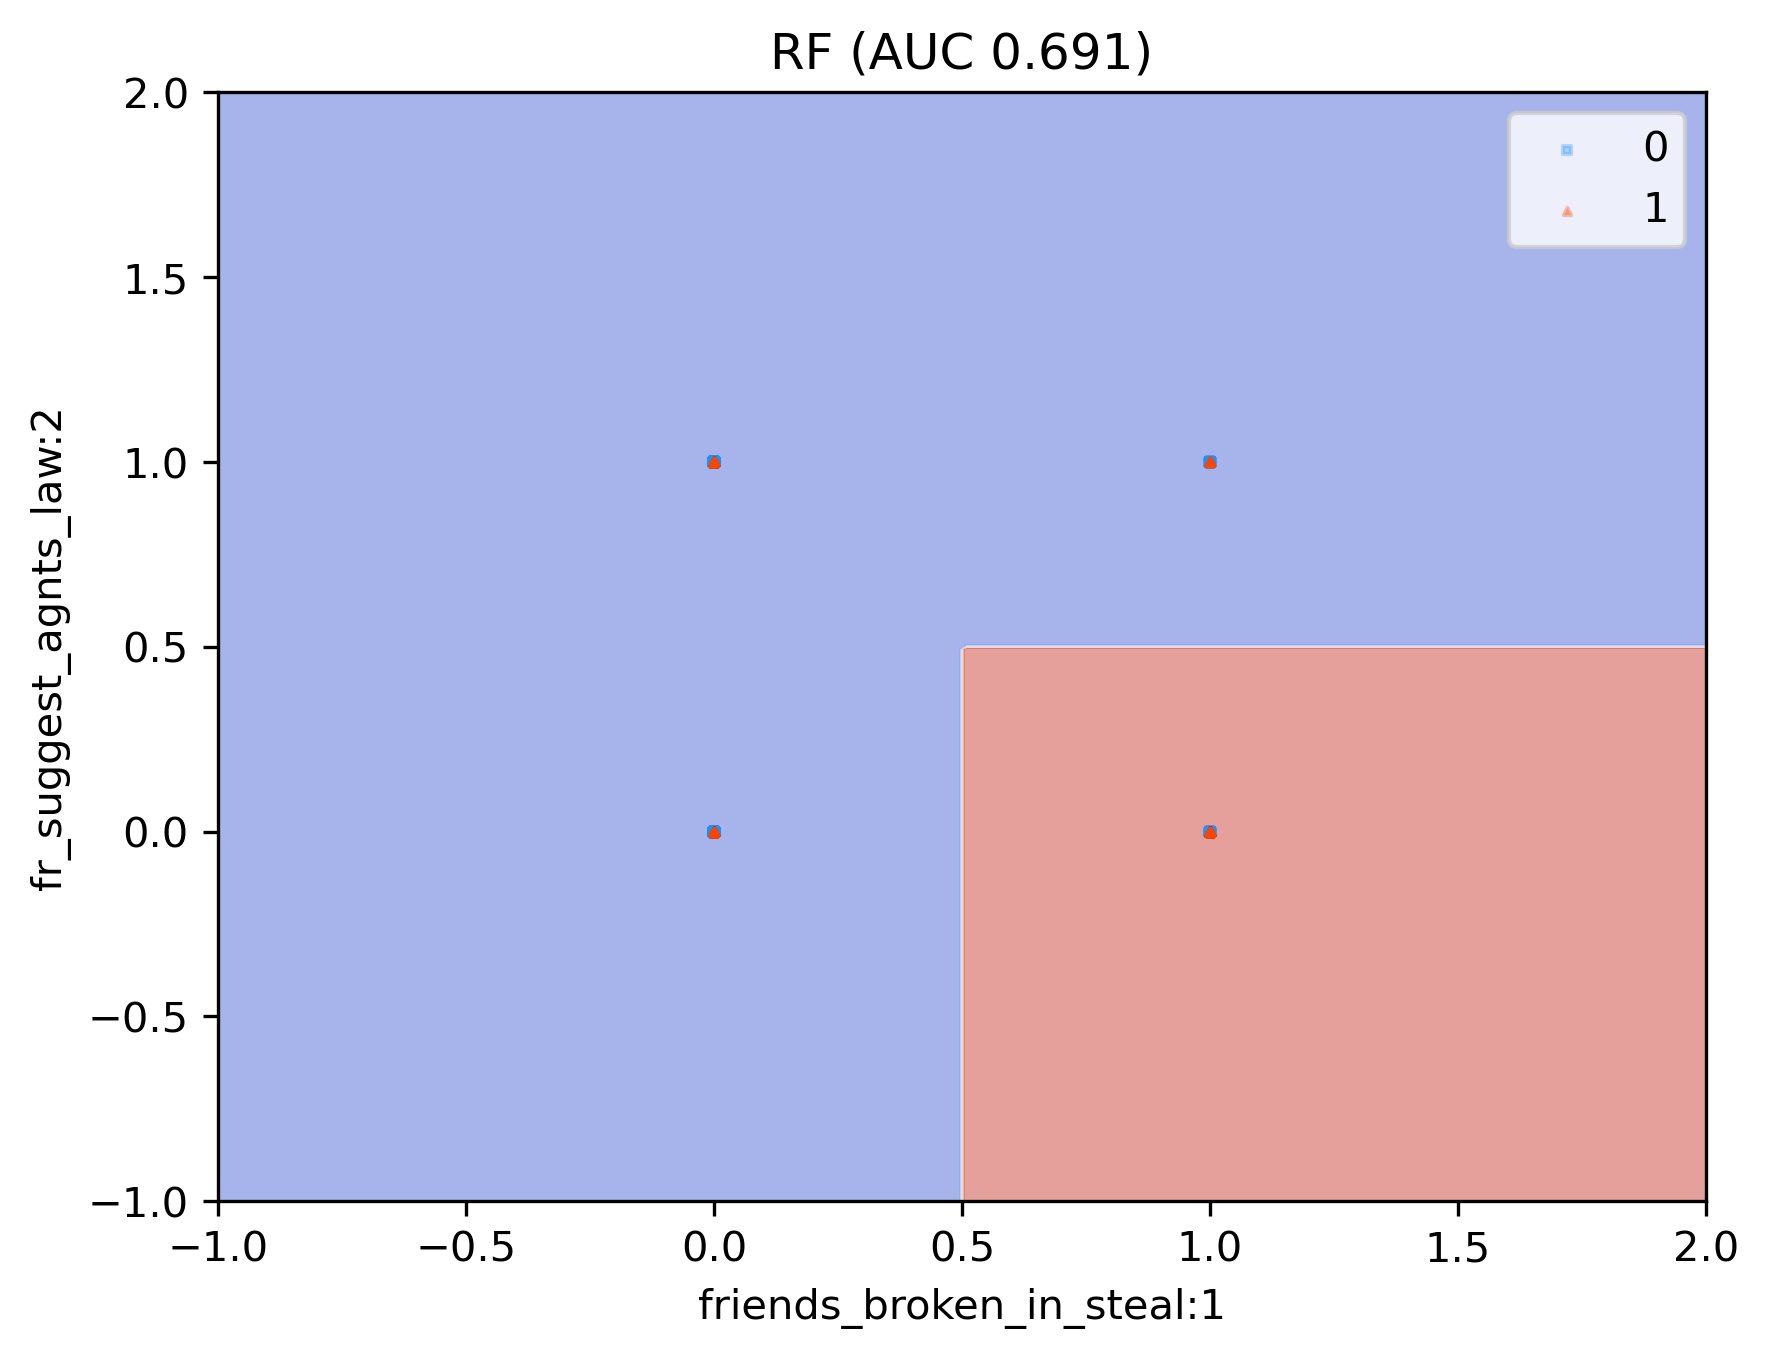

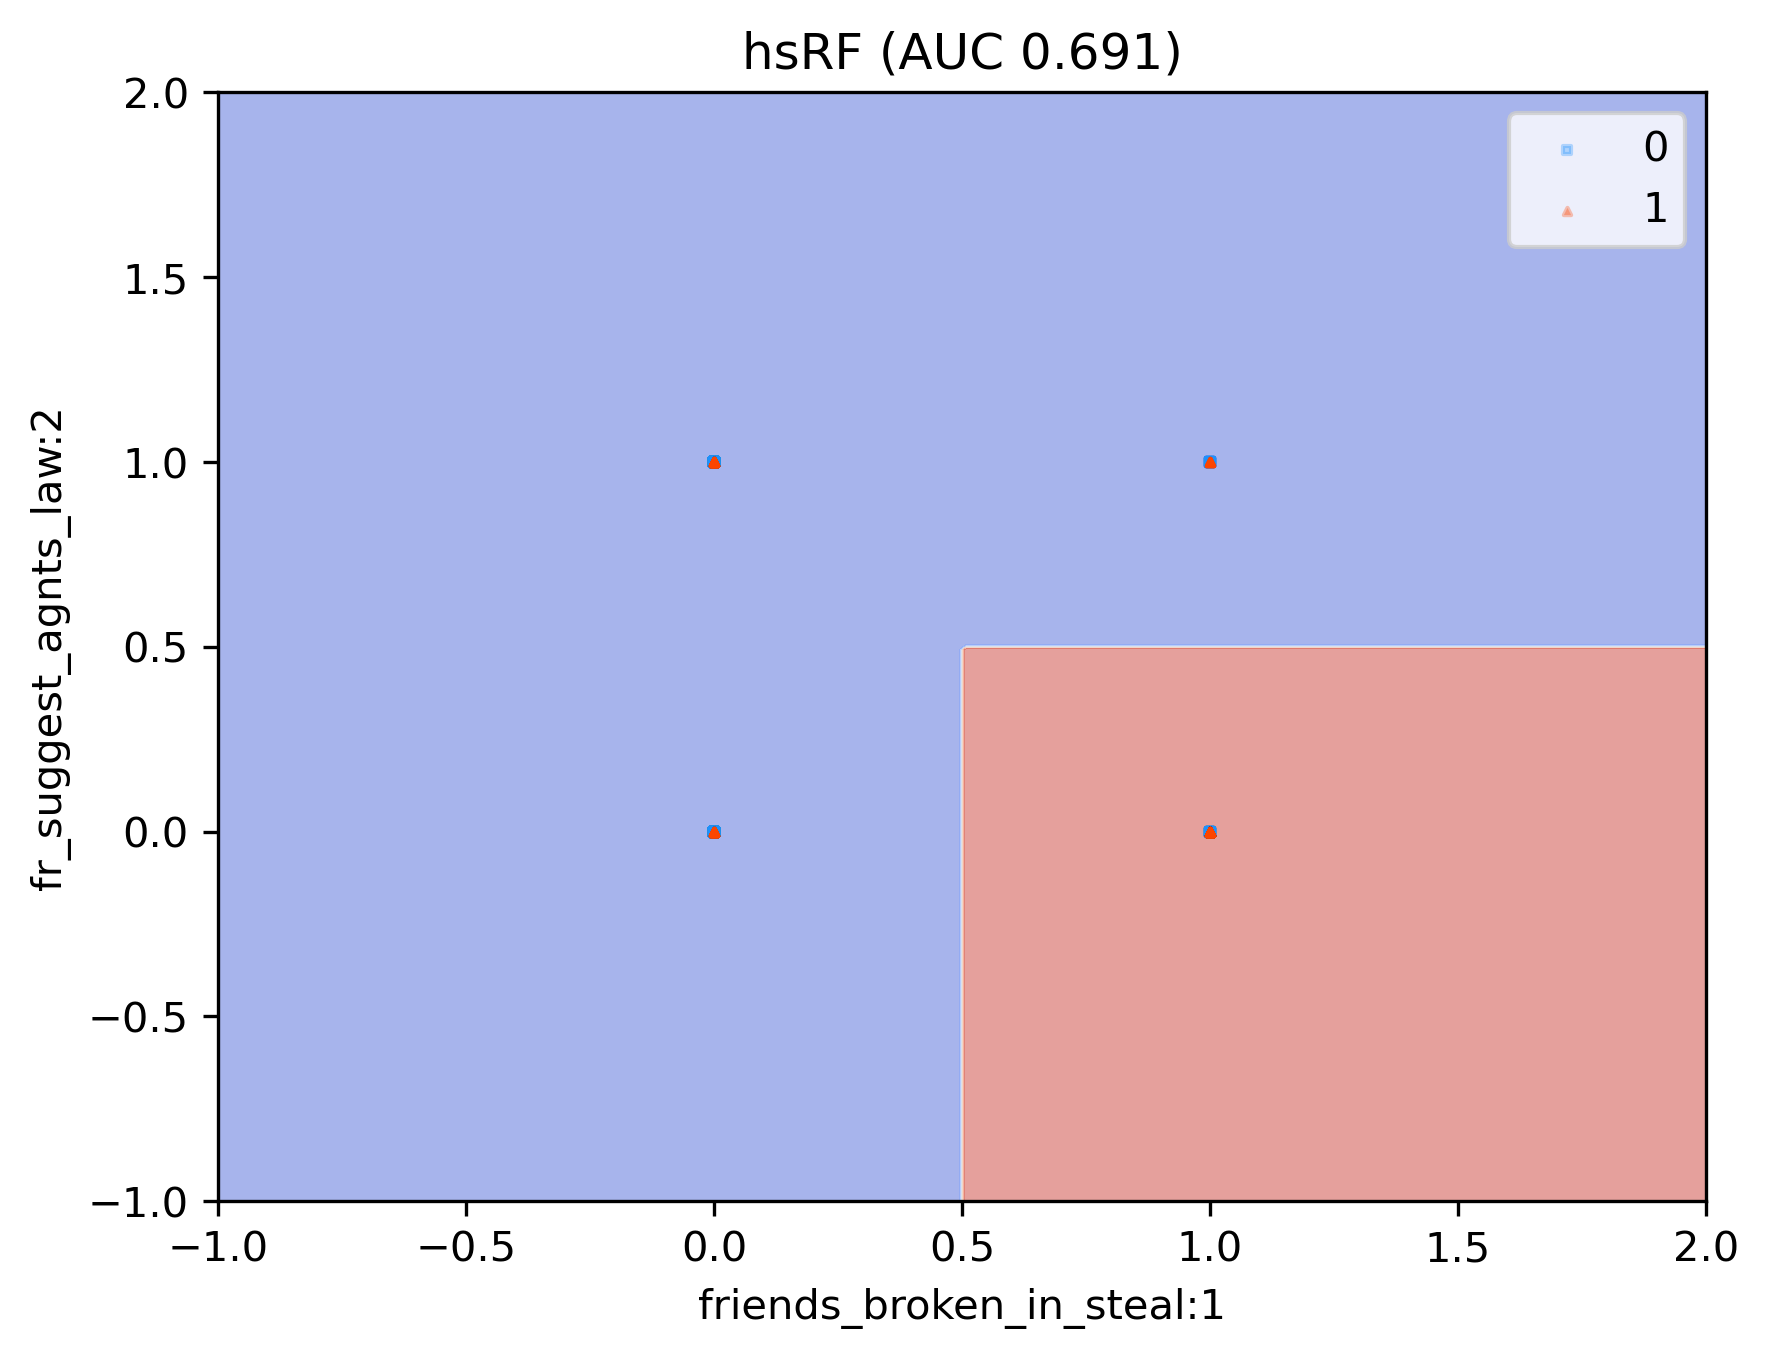

<Figure size 1920x1440 with 0 Axes>

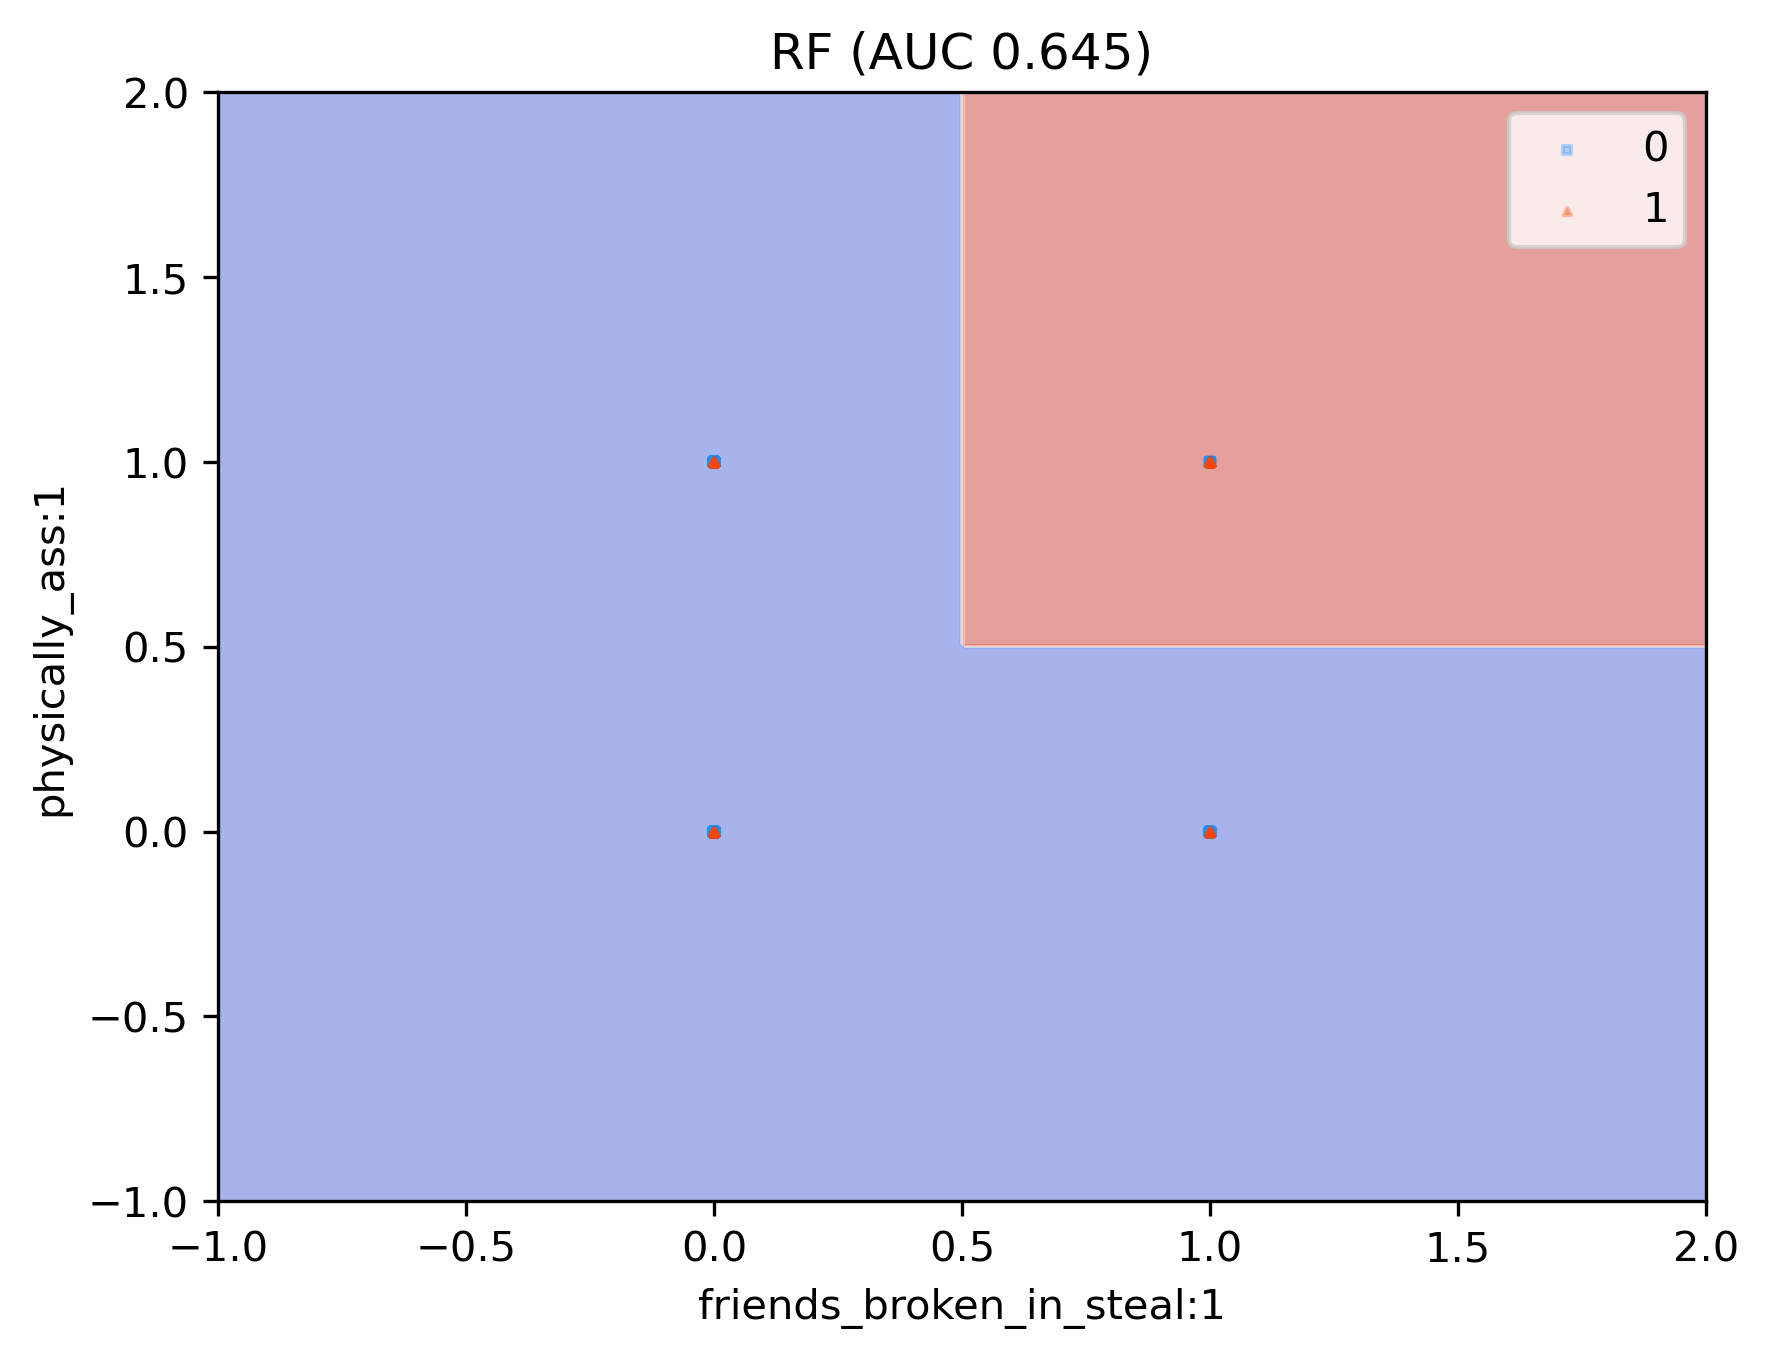

<Figure size 1920x1440 with 0 Axes>

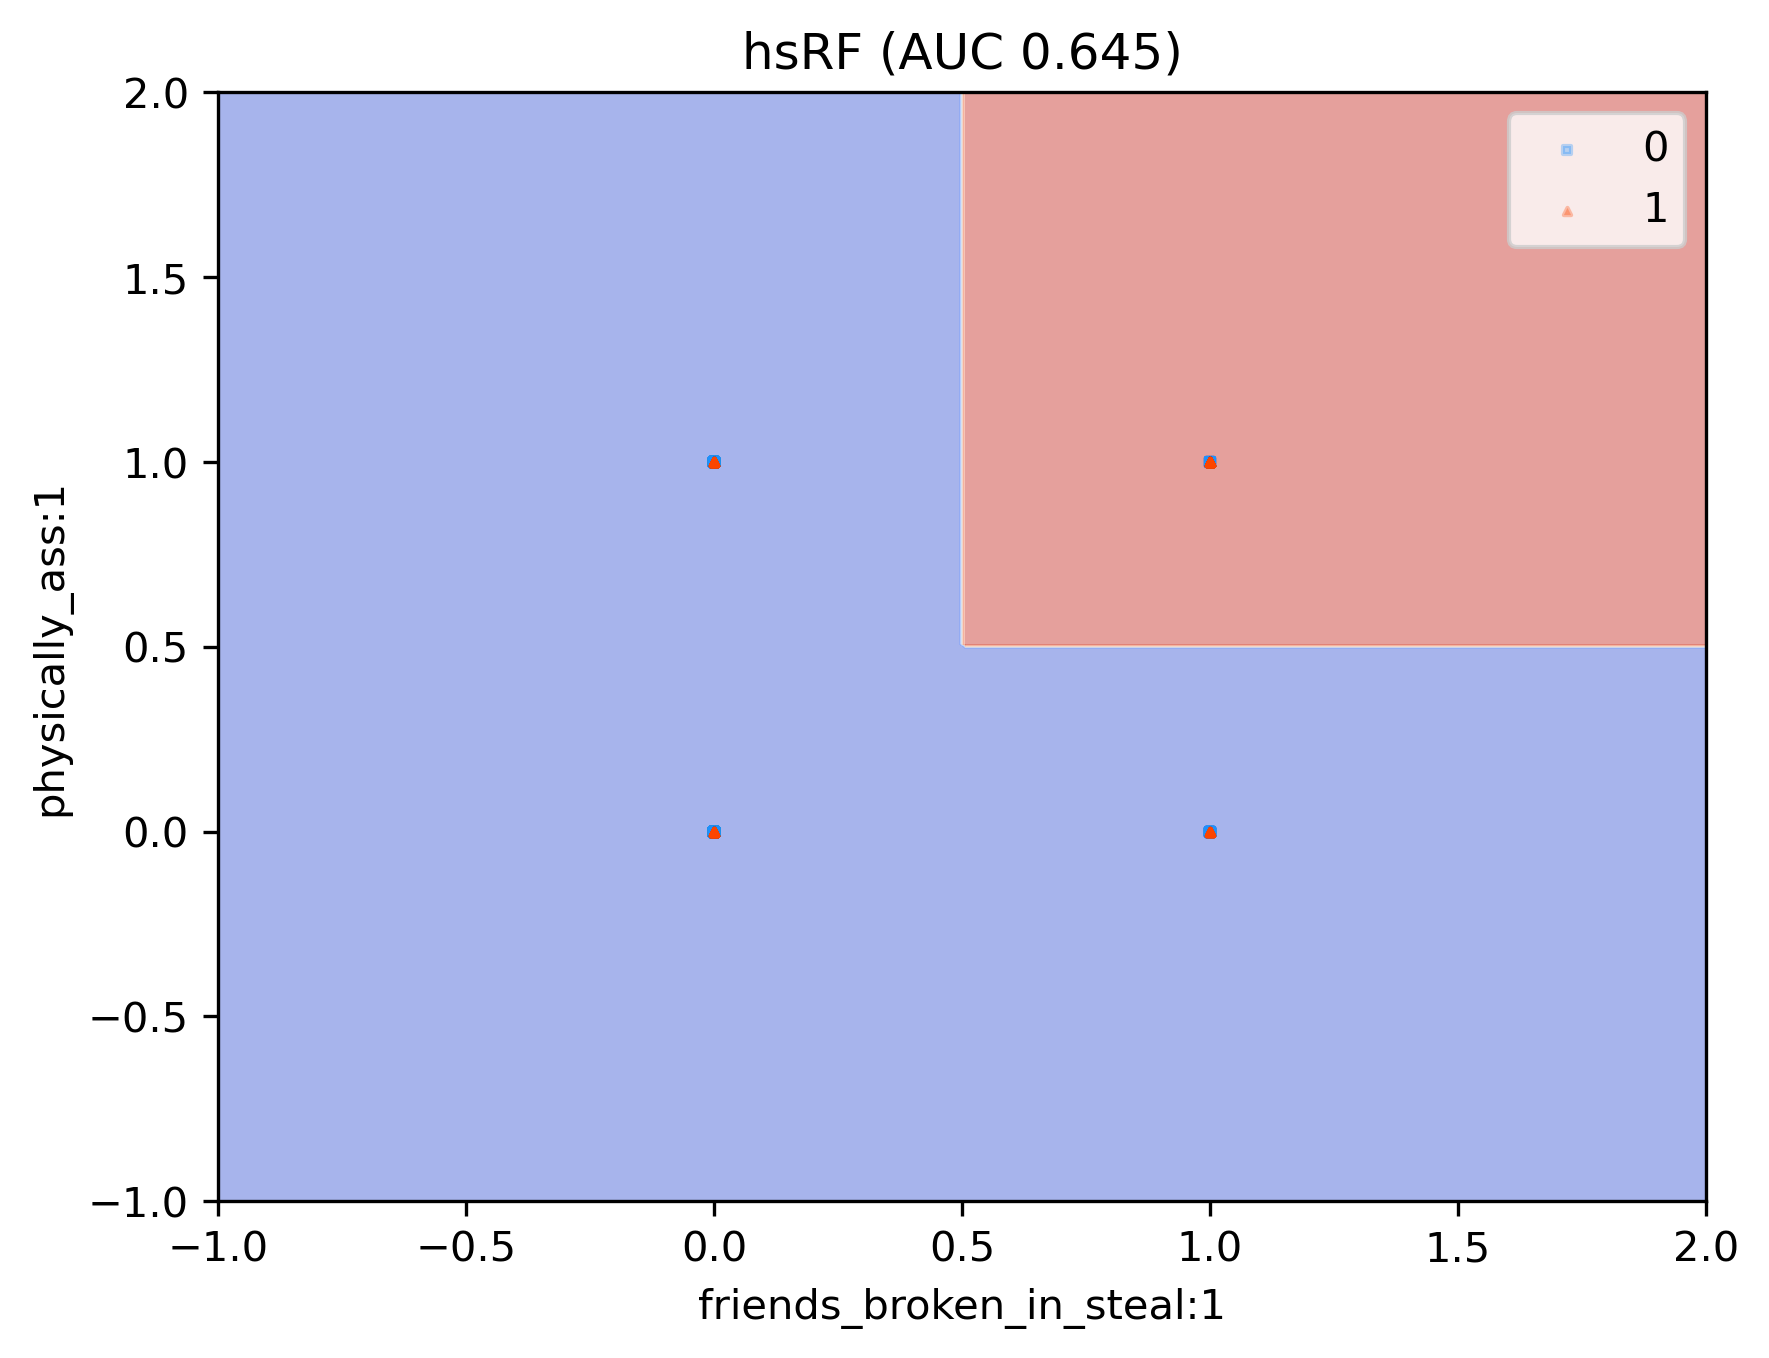

In [12]:
np.random.seed(42)
test_simpler_boundary("juvenile_clean", "imodels", ["friends_broken_in_steal:1", "fr_suggest_agnts_law:2"])
test_simpler_boundary("juvenile_clean", "imodels")

Optimal lambda: 500.0
     Feature importance
                      age | 0.255
              c_jail_time | 0.196
             priors_count | 0.189
  days_b_screening_arrest | 0.109
    race:African-American | 0.031
           race:Caucasian | 0.030
        c_charge_degree:M | 0.029
        c_charge_degree:F | 0.028
          juv_other_count | 0.022
                 sex:Male | 0.021
Optimal lambda: 100.0


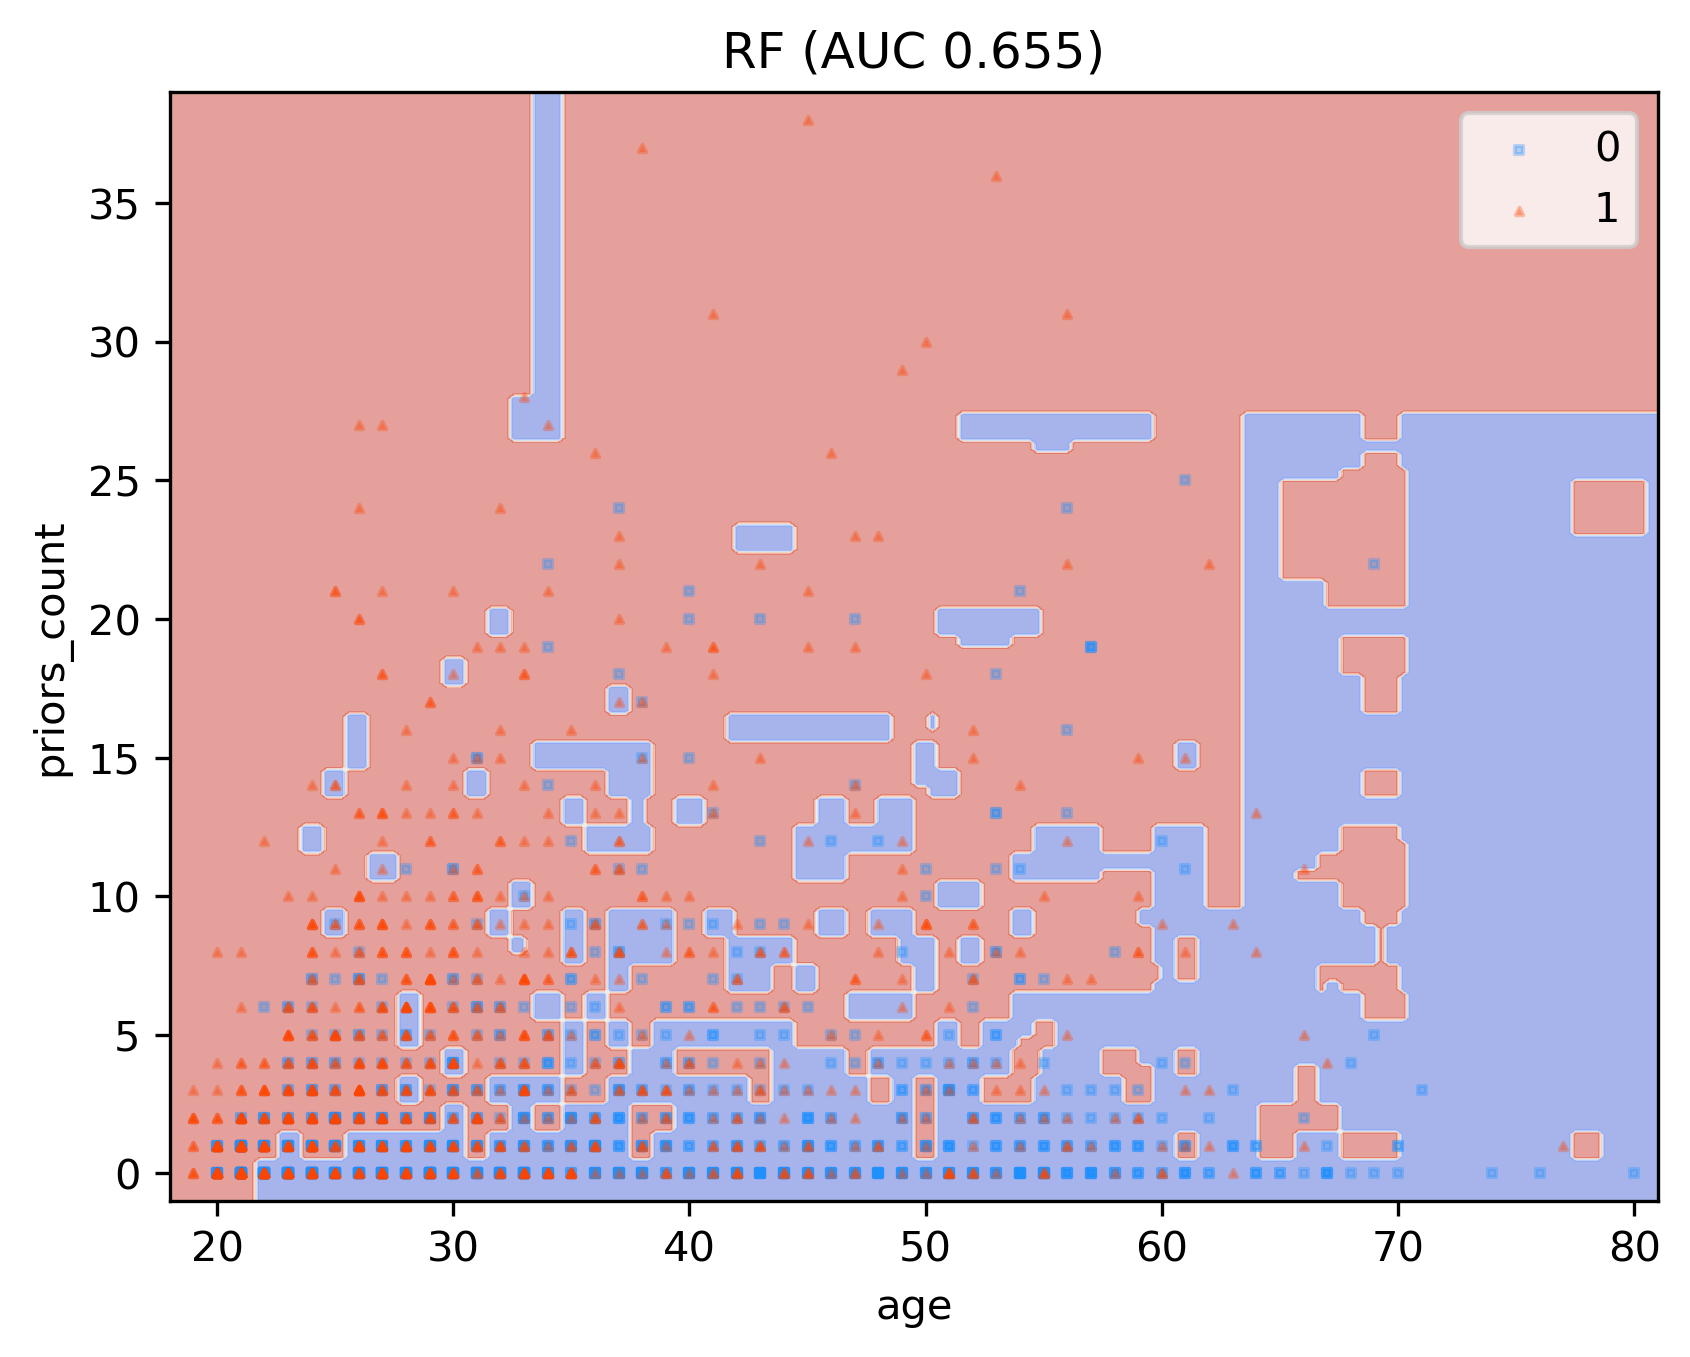

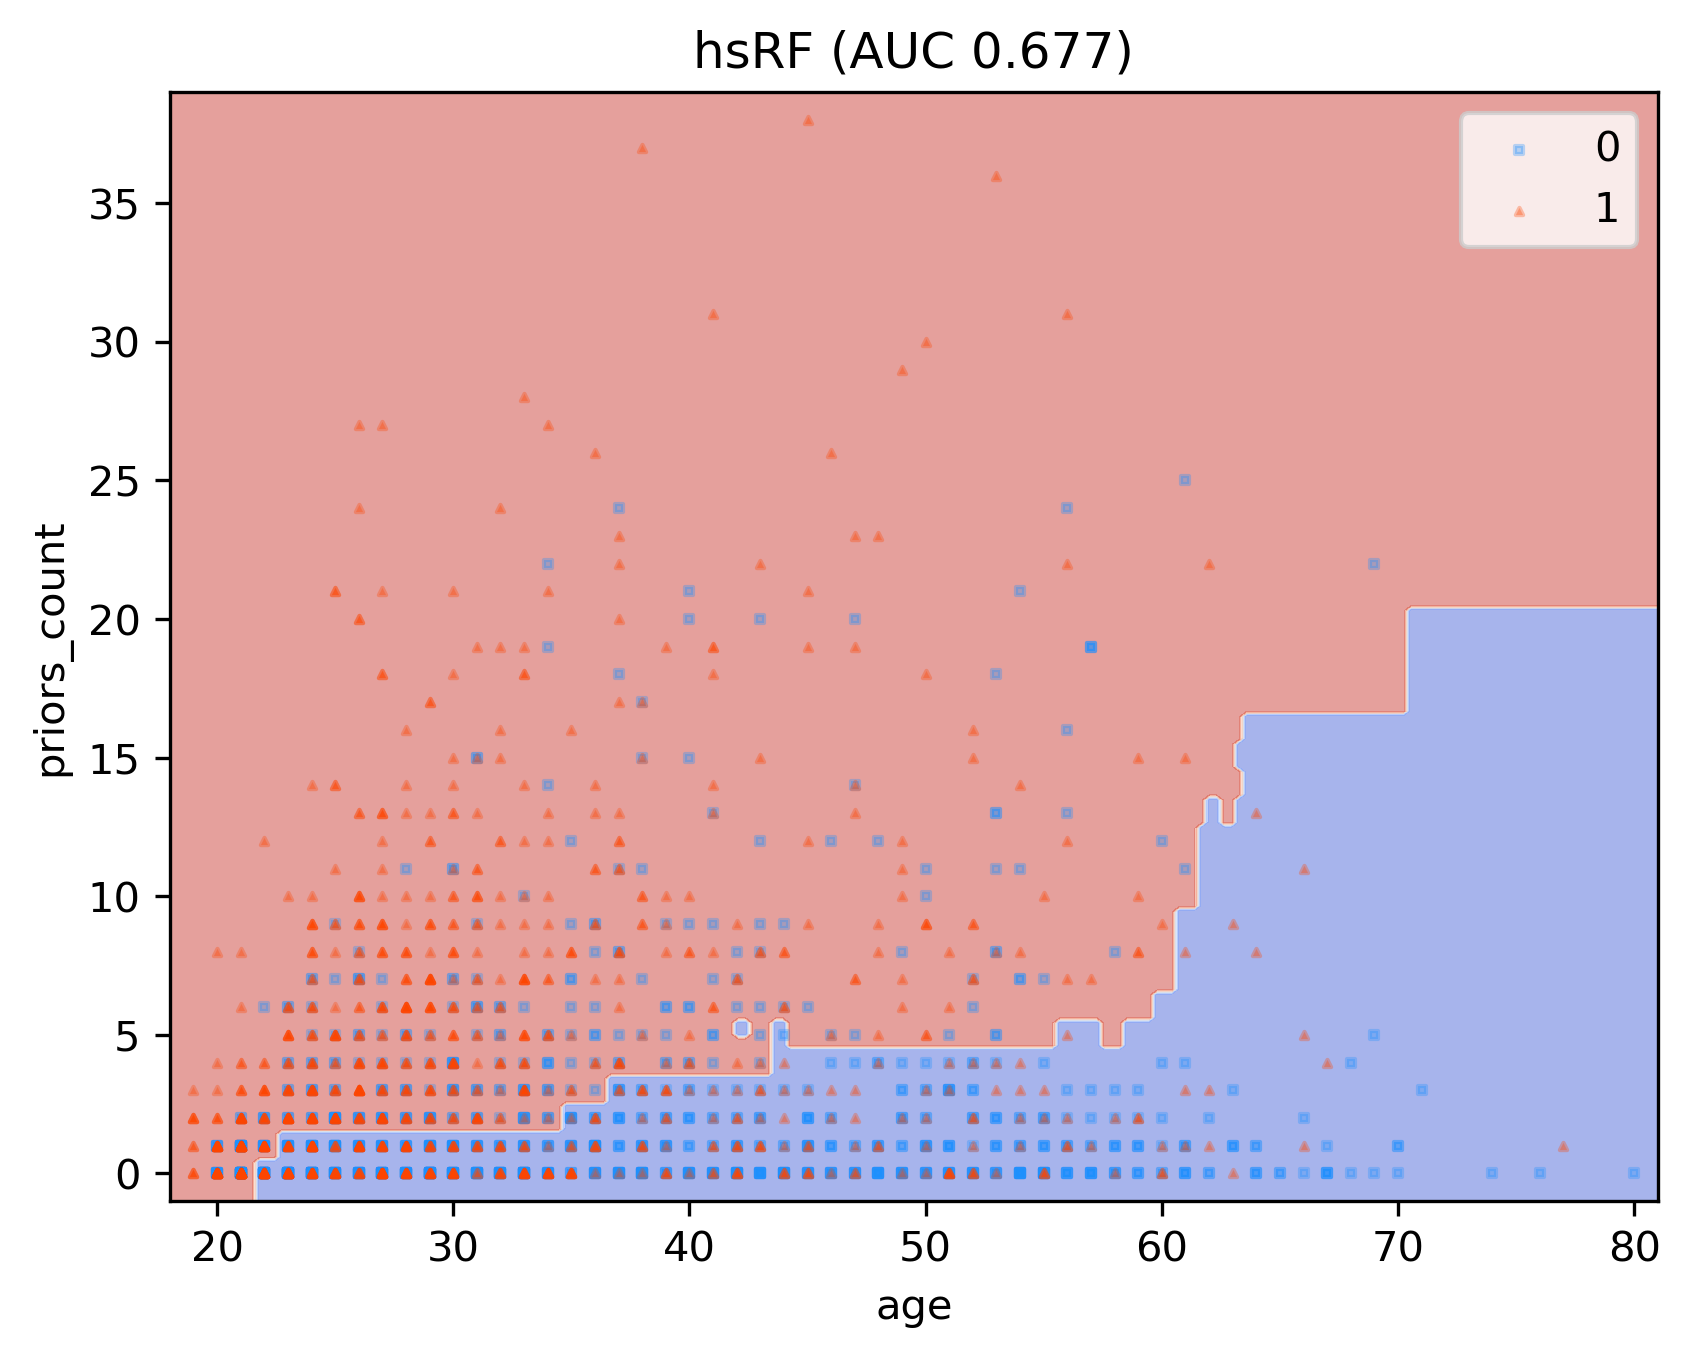

<Figure size 1920x1440 with 0 Axes>

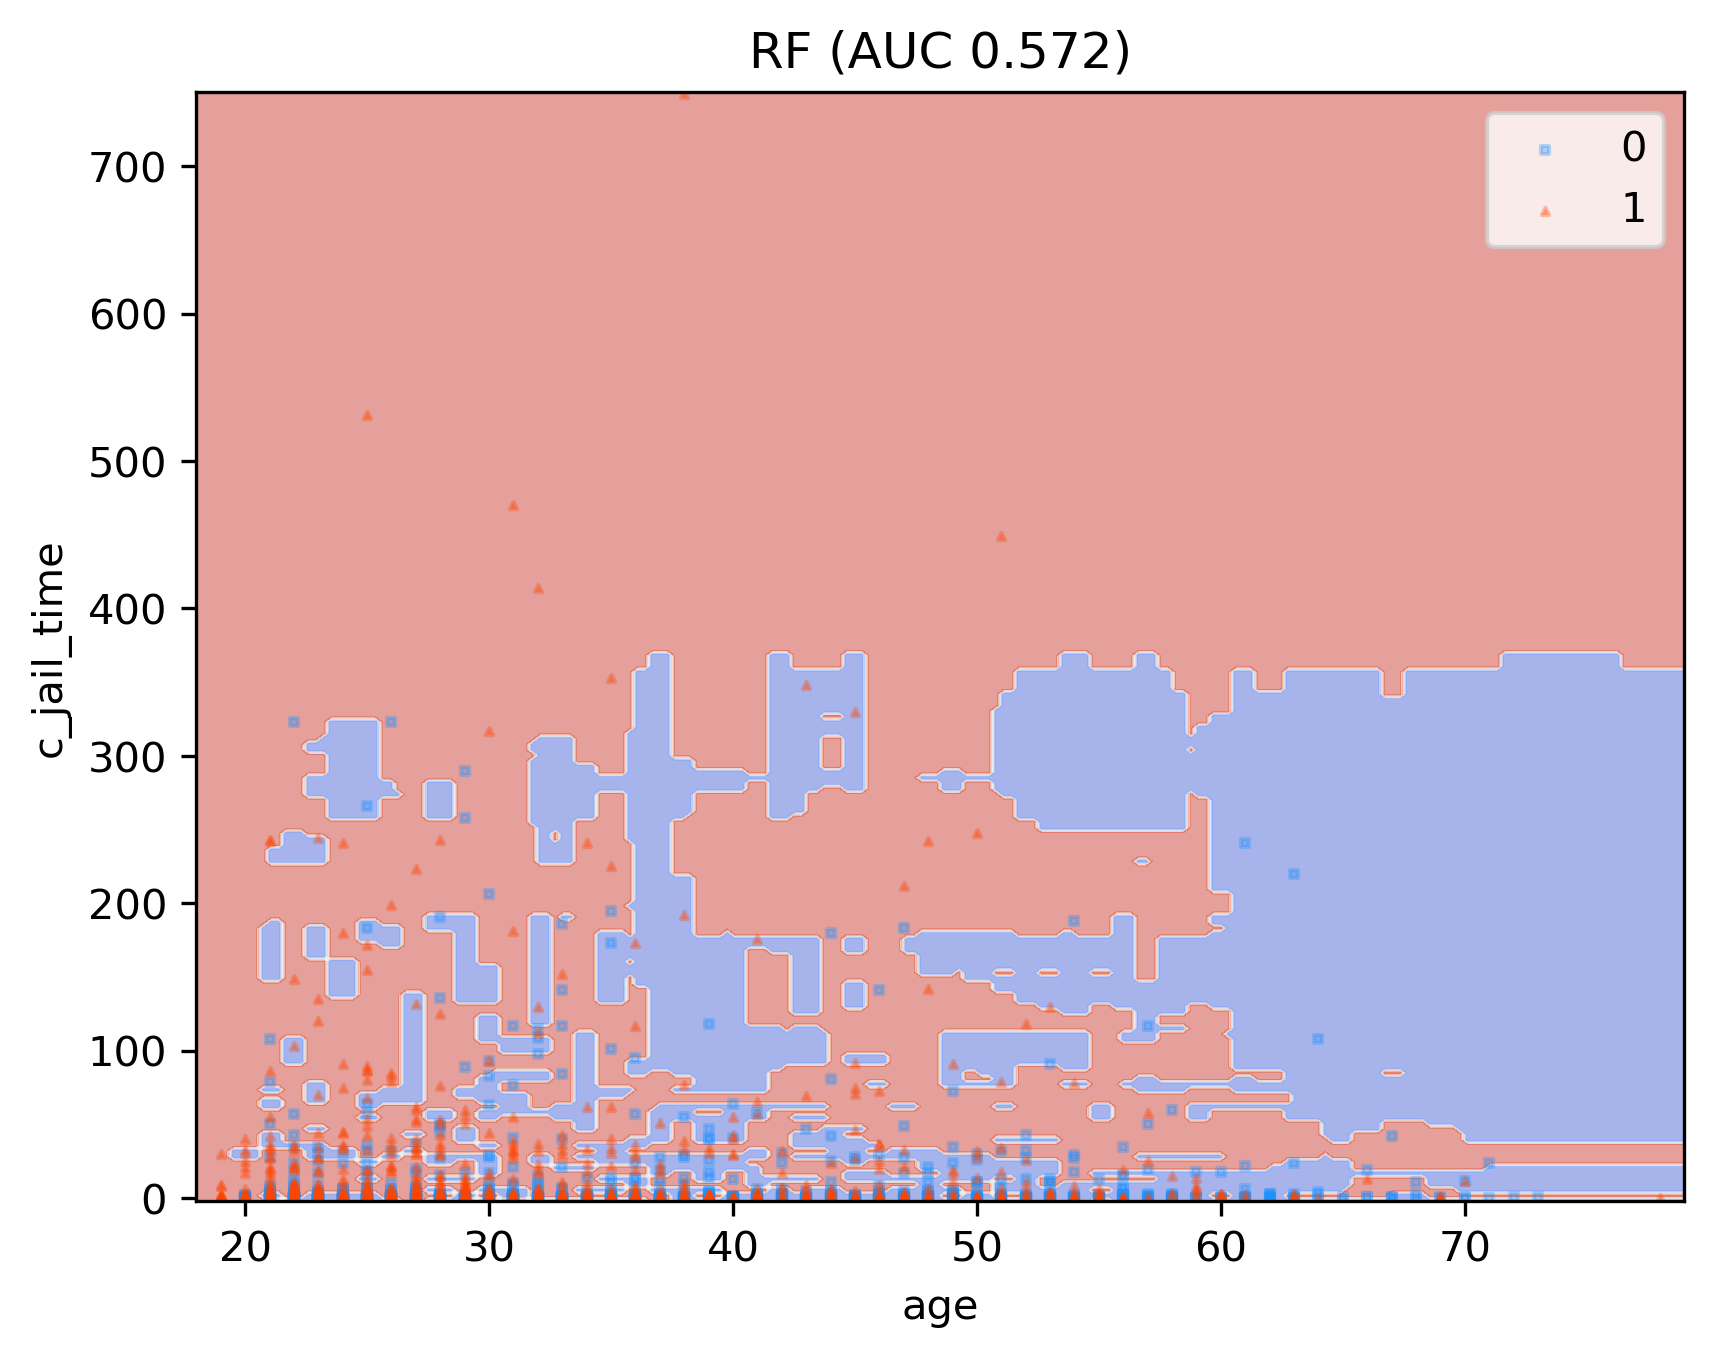

<Figure size 1920x1440 with 0 Axes>

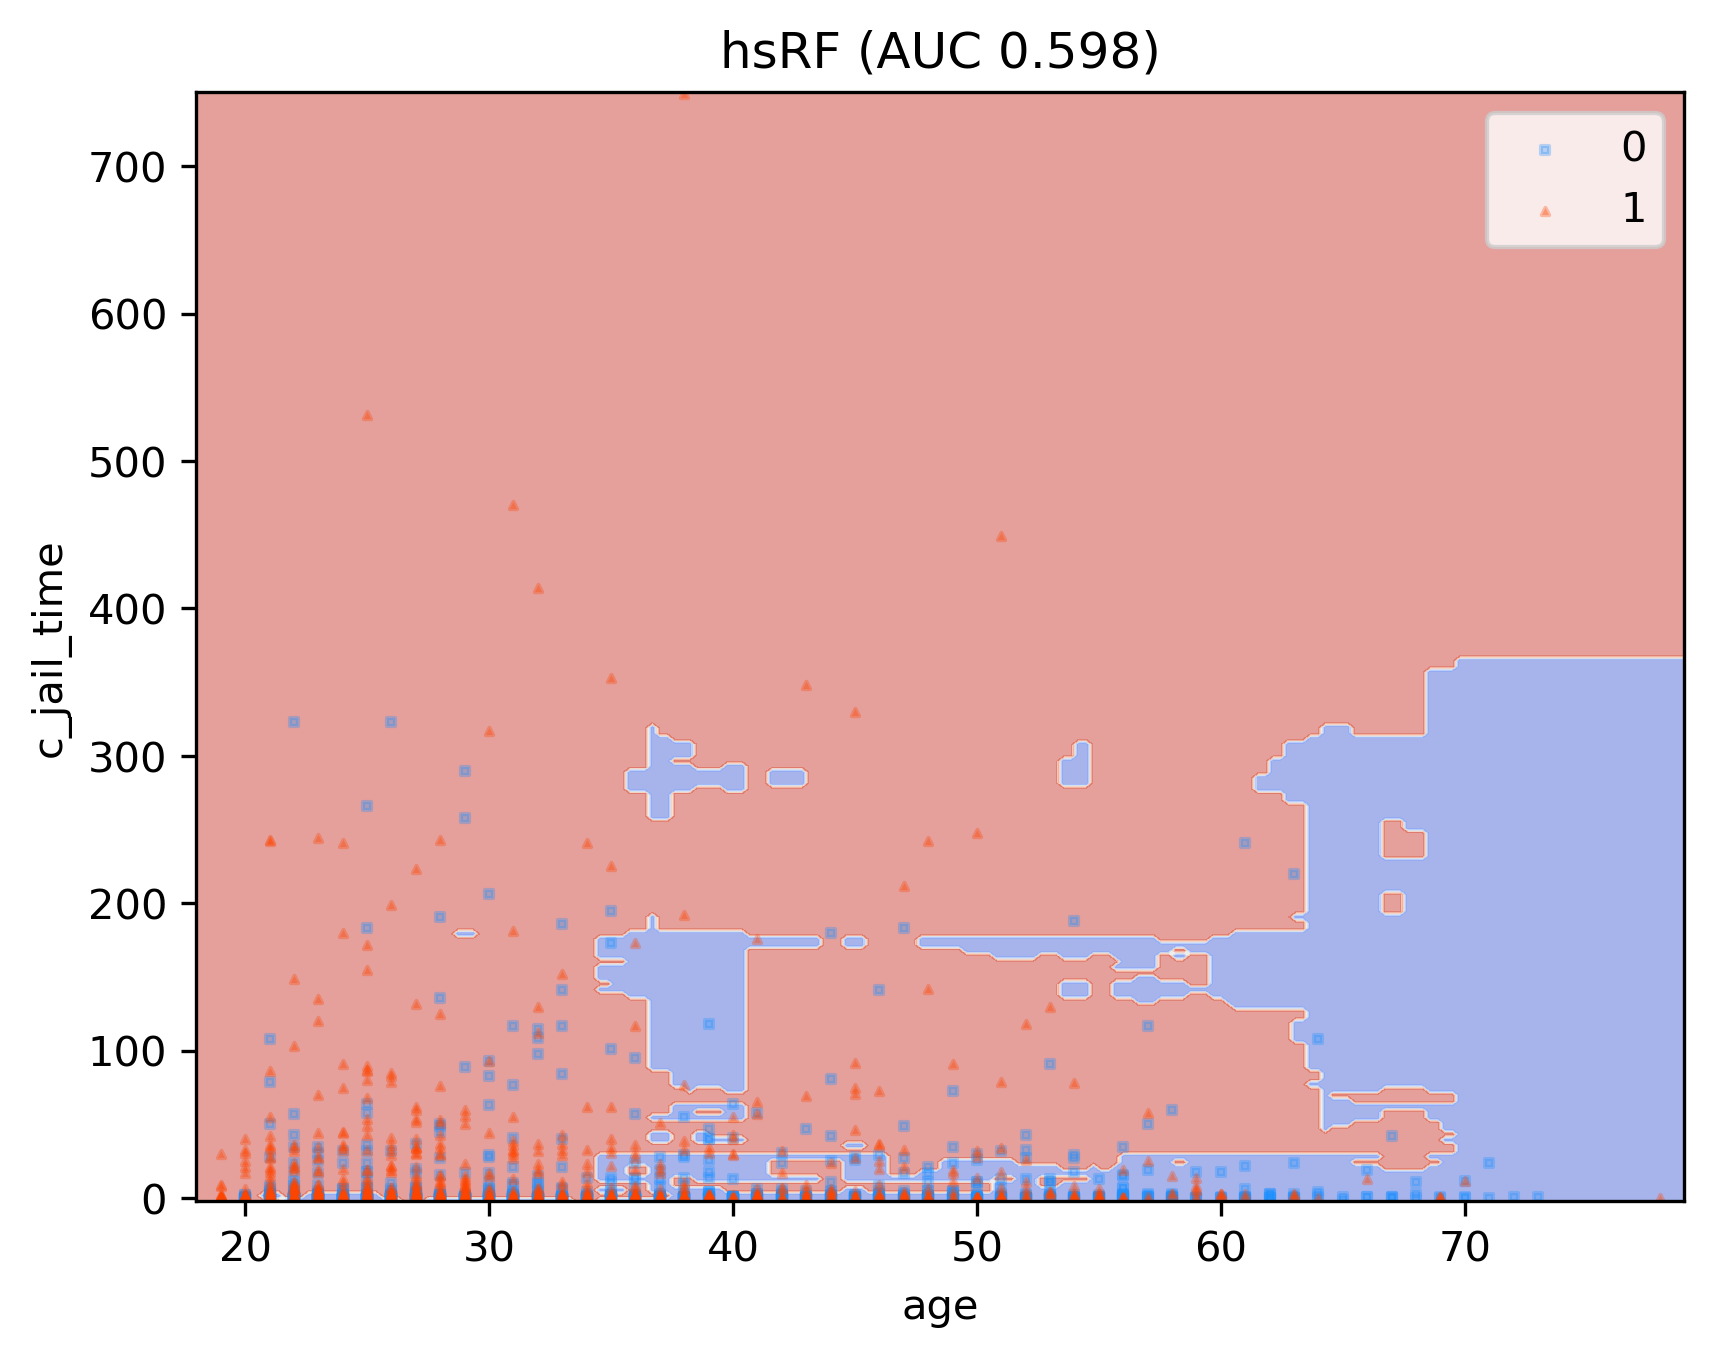

In [13]:
np.random.seed(42)
test_simpler_boundary("compas_two_year_clean", "imodels", ["age", "priors_count"])
test_simpler_boundary("compas_two_year_clean", "imodels")